In [189]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('BRA.csv')
df.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,...,PSCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,BFECH,BFECD,BFECA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,...,5.25,1.76,3.87,5.31,1.69,3.50,4.90,NaN,NaN,NaN
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,...,2.68,2.83,3.42,2.70,2.59,3.23,2.58,NaN,NaN,NaN
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,...,6.72,1.67,4.05,7.22,1.59,3.67,5.64,NaN,NaN,NaN
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,...,3.15,2.49,3.39,3.15,2.35,3.26,2.84,NaN,NaN,NaN
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,...,4.41,1.96,3.53,4.41,1.89,3.33,3.89,NaN,NaN,NaN


In [190]:
# prompt: drop BFECH	BFECD	BFECA

df = df.drop(['BFECH', 'BFECD', 'BFECA'], axis=1)
df.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PSCH,PSCD,PSCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89


In [191]:
res_map = {'H': 0, 'D': 1, 'A': 1}
df['Res_num'] = df['Res'].map(res_map)


In [192]:
df.dropna(inplace=True)
df.head()

,Country,League,Season,Date,Time,Home,Away,HG,AG,Res,PSCH,PSCD,PSCA,MaxCH,MaxCD,MaxCA,AvgCH,AvgCD,AvgCA,Res_num
0,Brazil,Serie A,2012,19/05/2012,22:30,Palmeiras,Portuguesa,1.0,1.0,D,1.75,3.86,5.25,1.76,3.87,5.31,1.69,3.50,4.90,1.0
1,Brazil,Serie A,2012,19/05/2012,22:30,Sport Recife,Flamengo RJ,1.0,1.0,D,2.83,3.39,2.68,2.83,3.42,2.70,2.59,3.23,2.58,1.0
2,Brazil,Serie A,2012,20/05/2012,01:00,Figueirense,Nautico,2.0,1.0,H,1.60,4.04,6.72,1.67,4.05,7.22,1.59,3.67,5.64,0.0
3,Brazil,Serie A,2012,20/05/2012,20:00,Botafogo RJ,Sao Paulo,4.0,2.0,H,2.49,3.35,3.15,2.49,3.39,3.15,2.35,3.26,2.84,0.0
4,Brazil,Serie A,2012,20/05/2012,20:00,Corinthians,Fluminense,0.0,1.0,A,1.96,3.53,4.41,1.96,3.53,4.41,1.89,3.33,3.89,1.0


In [193]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [194]:
X = df[['PSCH', 'PSCD', 'PSCA']]  # features
y = df['Res_num']  # variável alvo

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [195]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5) # Using 5-fold cross-validation

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())


Cross-validation scores: [0.54886476 0.53405726 0.56564659 0.55533597 0.56126482]
Mean cross-validation score: 0.5530338797217204


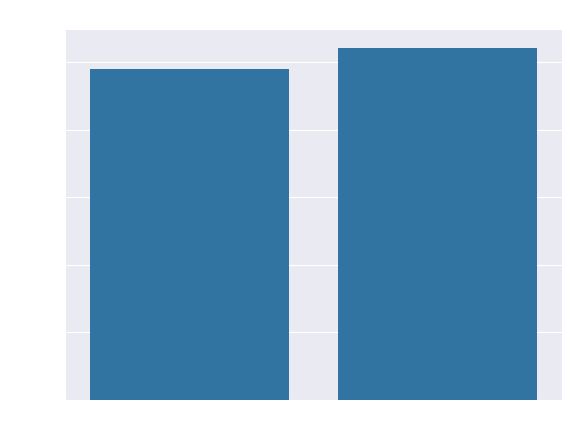

In [196]:
sns.countplot(x='Res_num', data=df)
plt.title('Distribution of Classes (Res_num)')
plt.show()

Res_num
1.0    2610
0.0    2453
Name: count, dtype: int64

Class distribution after downsampling:
Res_num
0.0    2453
1.0    2453
Name: count, dtype: int64

Cross-validation scores on balanced data: [0.56173594 0.54495413 0.57553517]
Mean cross-validation score on balanced data: 0.5607417459854597


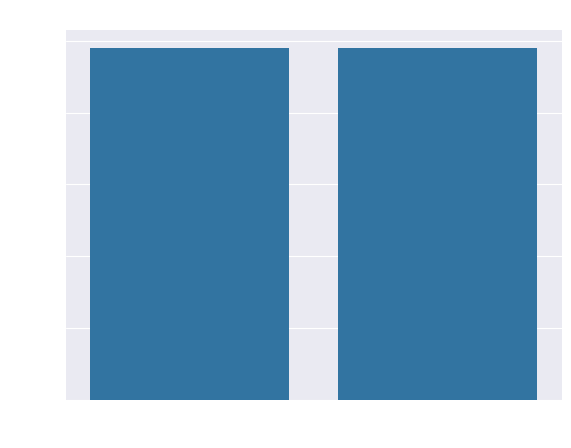

In [197]:
# Check class distribution in the target variable
print(df['Res_num'].value_counts())

# Identify the majority class
majority_class = df['Res_num'].value_counts().idxmax()
minority_classes = df['Res_num'].value_counts().index.tolist()
minority_classes.remove(majority_class)

# Calculate the target count for the majority class after downsampling
# Here, we aim to match the count of the largest minority class
target_count = df['Res_num'].value_counts().max()

# Separate majority and minority classes
df_majority = df[df['Res_num'] == majority_class]
df_minority = df[df['Res_num'].isin(minority_classes)]

# Randomly sample from the majority class
# Reduce the majority class to match the count of the next largest class (assuming you want to reduce the majority class)
# Let's find the second largest class count as the target for the majority class.
if len(df['Res_num'].value_counts()) > 1:
    target_count_for_majority = df['Res_num'].value_counts().iloc[1] # Count of the second most frequent class
else:
    target_count_for_majority = len(df_majority) # No other classes, no need to resample

df_majority_downsampled = df_majority.sample(n=target_count_for_majority, random_state=42)

# Concatenate the downsampled majority class dataframe with the minority class dataframes
df_balanced = pd.concat([df_majority_downsampled, df_minority])

# Shuffle the dataset to ensure the data is not ordered by class
df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print("\nClass distribution after downsampling:")
print(df_balanced['Res_num'].value_counts())

# Now use the balanced dataframe for your modeling
X_balanced = df_balanced[['PSCH', 'PSCD', 'PSCA']]  # features from balanced df
y_balanced = df_balanced['Res_num']  # target from balanced df

# Perform cross-validation on the balanced dataset
# Reduce the number of splits to be less than or equal to the smallest class size
knn_balanced = KNeighborsClassifier(n_neighbors=5) # Explicitly define knn for balanced data
cv_scores_balanced = cross_val_score(knn_balanced, X_balanced, y_balanced, cv=3) # Using 3-fold cross-validation, fix for ValueError

print("\nCross-validation scores on balanced data:", cv_scores_balanced)
print("Mean cross-validation score on balanced data:", cv_scores_balanced.mean())

# Visualize the distribution of classes after downsampling
sns.countplot(x='Res_num', data=df_balanced)
plt.title('Distribution of Classes (Res_num) after Downsampling')
plt.show()

In [198]:
# prompt: just catch since 2020

#df['Date'] = pd.to_datetime(df['Date'])
#df = df[df['Date'].dt.year >= 2022].copy()

In [199]:
X = df[['AvgCH', 'AvgCD', 'AvgCA', 'PSCH', 'PSCD', 'PSCA']]  # features
y = df['Res_num']  # variável alvo

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)



knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

# Previsões
y_pred = knn.predict(X_test)

In [200]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[529 481]
 [407 609]]
              precision    recall  f1-score   support

         0.0       0.57      0.52      0.54      1010
         1.0       0.56      0.60      0.58      1016

    accuracy                           0.56      2026
   macro avg       0.56      0.56      0.56      2026
weighted avg       0.56      0.56      0.56      2026



In [201]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(knn, X, y, cv=5) # Using 5-fold cross-validation

print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.55972359 0.54195459 0.55676209 0.5583004  0.55731225]
Mean cross-validation score: 0.5548105849256113


Melhor K encontrado: 12

Matriz de Confusão:
[[377 148]
 [225 212]]

Relatório de Classificação:
              precision    recall  f1-score   support

Não Mandante       0.63      0.72      0.67       525
    Mandante       0.59      0.49      0.53       437

    accuracy                           0.61       962
   macro avg       0.61      0.60      0.60       962
weighted avg       0.61      0.61      0.61       962



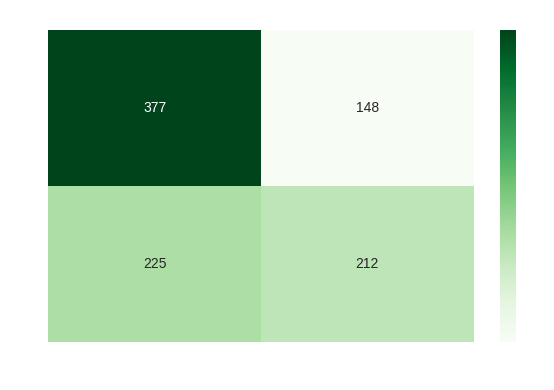

In [202]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

df['Date'] = pd.to_datetime(df['Date'])
df = df[df['Date'].dt.year >= 2019].copy()


# =======================
# REDUÇÃO DE CLASSES
# =======================
# 1 = vitória do mandante (H), 0 = empate ou vitória do visitante (D ou A)
df['Res_num'] = df['Res'].map({'H': 1, 'D': 0, 'A': 0})

# =======================
# FEATURES DERIVADAS
# =======================
df['H_delta_max_avg'] = df['MaxCH'] - df['AvgCH']
df['H_delta_psc_avg'] = df['PSCH'] - df['AvgCH']
df['H_spread'] = df[['PSCH', 'AvgCH', 'MaxCH']].std(axis=1)

df['D_delta_max_avg'] = df['MaxCD'] - df['AvgCD']
df['D_delta_psc_avg'] = df['PSCD'] - df['AvgCD']
df['D_spread'] = df[['PSCD', 'AvgCD', 'MaxCD']].std(axis=1)

df['A_delta_max_avg'] = df['MaxCA'] - df['AvgCA']
df['A_delta_psc_avg'] = df['PSCA'] - df['AvgCA']
df['A_spread'] = df[['PSCA', 'AvgCA', 'MaxCA']].std(axis=1)

features = [
    'PSCH', 'AvgCH', 'MaxCH', 'H_delta_max_avg', 'H_delta_psc_avg', 'H_spread',
    'PSCD', 'AvgCD', 'MaxCD', 'D_delta_max_avg', 'D_delta_psc_avg', 'D_spread',
    'PSCA', 'AvgCA', 'MaxCA', 'A_delta_max_avg', 'A_delta_psc_avg', 'A_spread'
]

X = df[features]
y = df['Res_num']

# =======================
# TREINO / TESTE
# =======================
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# =======================
# OTIMIZAÇÃO DO K
# =======================
# CÓDIGO CORRIGIDO PARA REPRODUTIBILIDADE
from sklearn.model_selection import StratifiedKFold

k_range = range(3, 21)
cv_scores = []

# 1. Crie um objeto de validação cruzada com estado aleatório fixo
cv_splitter = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    # 2. Passe o 'cv_splitter' para o parâmetro cv. Agora a divisão será sempre a mesma.
    scores = cross_val_score(knn, X_train_scaled, y_train, cv=cv_splitter, scoring='accuracy')
    cv_scores.append(scores.mean())

# Melhor k
best_k = k_range[np.argmax(cv_scores)]
print(f"Melhor K encontrado: {best_k}")

# =======================
# TREINAMENTO FINAL
# =======================
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train_scaled, y_train)
y_pred = knn.predict(X_test_scaled)

# =======================
# RELATÓRIO
# =======================
print("\nMatriz de Confusão:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

print("\nRelatório de Classificação:")
print(classification_report(y_test, y_pred, target_names=['Não Mandante', 'Mandante']))

# =======================
# PLOT MATRIZ DE CONFUSÃO
# =======================
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Não Mandante', 'Mandante'],
            yticklabels=['Não Mandante', 'Mandante'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - KNN com Classes Reduzidas')
plt.tight_layout()
plt.show()

In [203]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import warnings

# Ignora avisos para manter a saída mais limpa durante o loop
warnings.filterwarnings('ignore', category=UserWarning)

# =======================================================
# ETAPA DE OTIMIZAÇÃO: ENCONTRAR O MELHOR ANO DE CORTE
# =======================================================
print("🚀 Iniciando busca pelo melhor ano de corte (2012-2025)...")

# --- PRÉ-REQUISITO ---
# Supondo que 'df' seja seu DataFrame já carregado.
# A linha abaixo garante que a coluna de data esteja no formato correto.
# df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
# ---------------------

# Guarda o DataFrame original para usar no loop
df_original = df.dropna(subset=['Date']).copy()

# Define o intervalo de anos para testar
years_to_test = range(2012, 2026) # de 2012 a 2025
results = {}

for year in years_to_test:
    print(f"\n--- ⏳ Testando com dados a partir de {year} ---")

    # 1. Filtra o DataFrame para o ano de corte atual
    df_filtered = df_original[df_original['Date'].dt.year >= year].copy()

    # 2. Verifica se há dados suficientes para prosseguir
    if len(df_filtered) < 100 or df_filtered['Res'].nunique() < 3:
        print(f"Dados insuficientes ou classes ausentes para o ano {year}. Pulando.")
        continue

    # 3. Pipeline de Engenharia de Features e Treinamento
    df_filtered['Res_bin'] = df_filtered['Res'].map({'H': 1, 'D': 0, 'A': 0})

    # Features Derivadas
    df_filtered['H_delta_max_avg'] = df_filtered['MaxCH'] - df_filtered['AvgCH']
    df_filtered['H_delta_psc_avg'] = df_filtered['PSCH'] - df_filtered['AvgCH']
    df_filtered['H_spread'] = df_filtered[['PSCH', 'AvgCH', 'MaxCH']].std(axis=1)
    df_filtered['D_delta_max_avg'] = df_filtered['MaxCD'] - df_filtered['AvgCD']
    df_filtered['D_delta_psc_avg'] = df_filtered['PSCD'] - df_filtered['AvgCD']
    df_filtered['D_spread'] = df_filtered[['PSCD', 'AvgCD', 'MaxCD']].std(axis=1)
    df_filtered['A_delta_max_avg'] = df_filtered['MaxCA'] - df_filtered['AvgCA']
    df_filtered['A_delta_psc_avg'] = df_filtered['PSCA'] - df_filtered['AvgCA']
    df_filtered['A_spread'] = df_filtered[['PSCA', 'AvgCA', 'MaxCA']].std(axis=1)

    features = [
        'PSCH', 'AvgCH', 'MaxCH', 'H_delta_max_avg', 'H_delta_psc_avg', 'H_spread',
        'PSCD', 'AvgCD', 'MaxCD', 'D_delta_max_avg', 'D_delta_psc_avg', 'D_spread',
        'PSCA', 'AvgCA', 'MaxCA', 'A_delta_max_avg', 'A_delta_psc_avg', 'A_spread'
    ]

    df_filtered.dropna(subset=features + ['Res_bin'], inplace=True)
    X = df_filtered[features]
    y = df_filtered['Res_bin']

    # Validação adicional de dados
    if len(y.unique()) < 2:
        print(f"Apenas uma classe presente após limpeza para o ano {year}. Pulando.")
        continue

    # Divisão em Treino e Teste (com estratificação para garantir a proporção das classes)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Otimização do K para o conjunto de dados atual
    k_range = range(3, 21)
    cv_scores = []
    try:
        for k in k_range:
            knn = KNeighborsClassifier(n_neighbors=k)
            scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
            cv_scores.append(scores.mean())

        if not cv_scores: continue
        best_k = k_range[np.argmax(cv_scores)]

        # Treinamento e avaliação
        knn = KNeighborsClassifier(n_neighbors=best_k)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)

        accuracy = accuracy_score(y_test, y_pred)
        results[year] = (accuracy, best_k) # Armazena a acurácia e o melhor k
        print(f"✅ Resultado para {year}: Acurácia de {accuracy:.4f} (com melhor k={best_k})")

    except ValueError:
        print(f"Erro na validação cruzada para {year} (poucas amostras em alguma classe). Pulando.")
        continue

# =======================================================
# RESULTADO FINAL DA OTIMIZAÇÃO
# =======================================================
if not results:
    print("\nNenhum resultado válido foi gerado. Verifique os dados de entrada e o intervalo de anos.")
else:
    # Encontra o melhor ano buscando pela maior acurácia (o primeiro item da tupla)
    best_year = max(results, key=lambda year: results[year][0])
    best_accuracy, best_k_final = results[best_year]

    print("\n\n=======================================================")
    print("🏆 OTIMIZAÇÃO CONCLUÍDA 🏆")
    print(f"Melhor ano de corte encontrado: {best_year}")
    print(f"🎯 Maior acurácia alcançada: {best_accuracy:.4f}")
    print(f"📈 Melhor 'k' para este ano: {best_k_final}")
    print("=======================================================")

🚀 Iniciando busca pelo melhor ano de corte (2012-2025)...

--- ⏳ Testando com dados a partir de 2012 ---
✅ Resultado para 2012: Acurácia de 0.5832 (com melhor k=11)

--- ⏳ Testando com dados a partir de 2013 ---
✅ Resultado para 2013: Acurácia de 0.5832 (com melhor k=11)

--- ⏳ Testando com dados a partir de 2014 ---
✅ Resultado para 2014: Acurácia de 0.5832 (com melhor k=11)

--- ⏳ Testando com dados a partir de 2015 ---
✅ Resultado para 2015: Acurácia de 0.5832 (com melhor k=11)

--- ⏳ Testando com dados a partir de 2016 ---
✅ Resultado para 2016: Acurácia de 0.5832 (com melhor k=11)

--- ⏳ Testando com dados a partir de 2017 ---
✅ Resultado para 2017: Acurácia de 0.5832 (com melhor k=11)

--- ⏳ Testando com dados a partir de 2018 ---
✅ Resultado para 2018: Acurácia de 0.5832 (com melhor k=11)

--- ⏳ Testando com dados a partir de 2019 ---
✅ Resultado para 2019: Acurácia de 0.5832 (com melhor k=11)

--- ⏳ Testando com dados a partir de 2020 ---
✅ Resultado para 2020: Acurácia de 0.60


Matriz de Confusão (Dados a partir de 2022):
[[142  43]
 [ 83  86]]


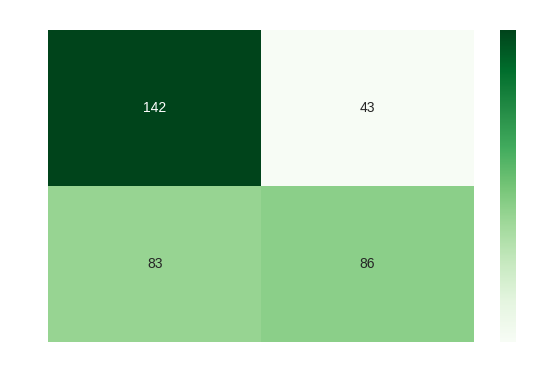


Relatório de Classificação (Dados a partir de 2022):
              precision    recall  f1-score   support

Não Mandante       0.63      0.77      0.69       185
    Mandante       0.67      0.51      0.58       169

    accuracy                           0.64       354
   macro avg       0.65      0.64      0.63       354
weighted avg       0.65      0.64      0.64       354



In [204]:
# prompt: do matrix confusion from 2022 to the last game

# Filter data for years from 2022 onwards
df_filtered_2022 = df_original[df_original['Date'].dt.year >= 2023].copy()

if len(df_filtered_2022) < 100 or df_filtered_2022['Res'].nunique() < 3:
    print("Dados insuficientes ou classes ausentes a partir de 2022. Não é possível gerar a matriz de confusão.")
else:
    # Apply the same feature engineering steps
    df_filtered_2022['Res_bin'] = df_filtered_2022['Res'].map({'H': 1, 'D': 0, 'A': 0})

    df_filtered_2022['H_delta_max_avg'] = df_filtered_2022['MaxCH'] - df_filtered_2022['AvgCH']
    df_filtered_2022['H_delta_psc_avg'] = df_filtered_2022['PSCH'] - df_filtered_2022['AvgCH']
    df_filtered_2022['H_spread'] = df_filtered_2022[['PSCH', 'AvgCH', 'MaxCH']].std(axis=1)
    df_filtered_2022['D_delta_max_avg'] = df_filtered_2022['MaxCD'] - df_filtered_2022['AvgCD']
    df_filtered_2022['D_delta_psc_avg'] = df_filtered_2022['PSCD'] - df_filtered_2022['AvgCD']
    df_filtered_2022['D_spread'] = df_filtered_2022[['PSCD', 'AvgCD', 'MaxCD']].std(axis=1)
    df_filtered_2022['A_delta_max_avg'] = df_filtered_2022['MaxCA'] - df_filtered_2022['AvgCA']
    df_filtered_2022['A_delta_psc_avg'] = df_filtered_2022['PSCA'] - df_filtered_2022['AvgCA']
    df_filtered_2022['A_spread'] = df_filtered_2022[['PSCA', 'AvgCA', 'MaxCA']].std(axis=1)

    features = [
        'PSCH', 'AvgCH', 'MaxCH', 'H_delta_max_avg', 'H_delta_psc_avg', 'H_spread',
        'PSCD', 'AvgCD', 'MaxCD', 'D_delta_max_avg', 'D_delta_psc_avg', 'D_spread',
        'PSCA', 'AvgCA', 'MaxCA', 'A_delta_max_avg', 'A_delta_psc_avg', 'A_spread'
    ]

    df_filtered_2022.dropna(subset=features + ['Res_bin'], inplace=True)
    X_2022 = df_filtered_2022[features]
    y_2022 = df_filtered_2022['Res_bin']

    if len(y_2022.unique()) < 2:
        print("Apenas uma classe presente após limpeza para dados a partir de 2022. Não é possível gerar a matriz de confusão.")
    else:
        # Split data (you can use the same split ratio, but on the filtered data)
        X_train_2022, X_test_2022, y_train_2022, y_test_2022 = train_test_split(
            X_2022, y_2022, test_size=0.4, random_state=42, stratify=y_2022
        )

        # Scale features
        scaler_2022 = StandardScaler()
        X_train_scaled_2022 = scaler_2022.fit_transform(X_train_2022)
        X_test_scaled_2022 = scaler_2022.transform(X_test_2022)

        # Use the best_k found during the optimization for this KNN model
        # (Assuming best_k_final from the previous optimization is the desired k)
        knn_2022 = KNeighborsClassifier(n_neighbors=best_k_final)
        knn_2022.fit(X_train_scaled_2022, y_train_2022)
        y_pred_2022 = knn_2022.predict(X_test_scaled_2022)

        # Generate Confusion Matrix
        cm_2022 = confusion_matrix(y_test_2022, y_pred_2022)

        print("\nMatriz de Confusão (Dados a partir de 2022):")
        print(cm_2022)

        # Plot Confusion Matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm_2022, annot=True, fmt='d', cmap='Greens',
                    xticklabels=['Não Mandante', 'Mandante'],
                    yticklabels=['Não Mandante', 'Mandante'])
        plt.xlabel('Predito')
        plt.ylabel('Real')
        plt.title('Matriz de Confusão - KNN (Dados a partir de 2022)')
        plt.tight_layout()
        plt.show()

        print("\nRelatório de Classificação (Dados a partir de 2022):")
        print(classification_report(y_test_2022, y_pred_2022, target_names=['Não Mandante', 'Mandante']))

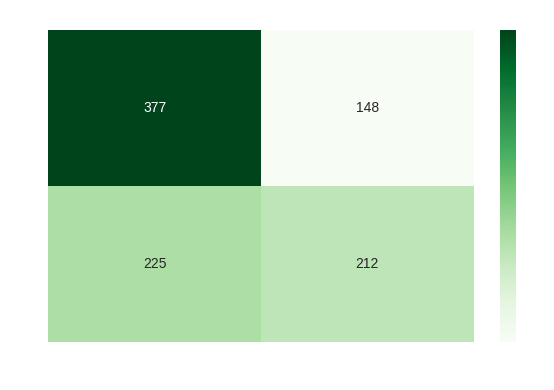

🚀 Iniciando busca pelo melhor ano de corte (2012-2025)...

--- ⏳ Testando com dados a partir de 2012 ---
✅ Resultado para 2012: Acurácia de 0.5832 (com melhor k=11)

--- ⏳ Testando com dados a partir de 2013 ---
✅ Resultado para 2013: Acurácia de 0.5832 (com melhor k=11)

--- ⏳ Testando com dados a partir de 2014 ---
✅ Resultado para 2014: Acurácia de 0.5832 (com melhor k=11)

--- ⏳ Testando com dados a partir de 2015 ---
✅ Resultado para 2015: Acurácia de 0.5832 (com melhor k=11)

--- ⏳ Testando com dados a partir de 2016 ---
✅ Resultado para 2016: Acurácia de 0.5832 (com melhor k=11)

--- ⏳ Testando com dados a partir de 2017 ---
✅ Resultado para 2017: Acurácia de 0.5832 (com melhor k=11)

--- ⏳ Testando com dados a partir de 2018 ---
✅ Resultado para 2018: Acurácia de 0.5832 (com melhor k=11)

--- ⏳ Testando com dados a partir de 2019 ---
✅ Resultado para 2019: Acurácia de 0.5832 (com melhor k=11)

--- ⏳ Testando com dados a partir de 2020 ---
✅ Resultado para 2020: Acurácia de 0.60

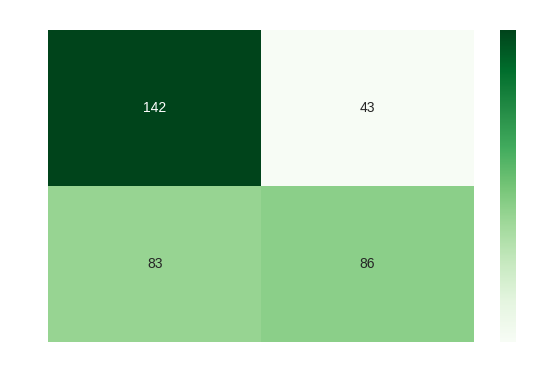


Relatório de Classificação (Dados a partir de 2022):
              precision    recall  f1-score   support

Não Mandante       0.63      0.77      0.69       185
    Mandante       0.67      0.51      0.58       169

    accuracy                           0.64       354
   macro avg       0.65      0.64      0.63       354
weighted avg       0.65      0.64      0.64       354



In [205]:
# prompt: do the background transparent and the text white

# Plot Confusion Matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Não Mandante', 'Mandante'],
            yticklabels=['Não Mandante', 'Mandante'])
plt.xlabel('Predito')
plt.ylabel('Real')
plt.title('Matriz de Confusão - KNN com Classes Reduzidas')
# Make text white
plt.rcParams['text.color'] = 'white'
# Make the background transparent
plt.gca().patch.set_alpha(0)
plt.tight_layout()
plt.show()

# Ignora avisos para manter a saída mais limpa durante o loop
warnings.filterwarnings('ignore', category=UserWarning)

# =======================================================
# ETAPA DE OTIMIZAÇÃO: ENCONTRAR O MELHOR ANO DE CORTE
# =======================================================
print("🚀 Iniciando busca pelo melhor ano de corte (2012-2025)...")

# --- PRÉ-REQUISITO ---
# Supondo que 'df' seja seu DataFrame já carregado.
# A linha abaixo garante que a coluna de data esteja no formato correto.
# df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
# ---------------------

# Guarda o DataFrame original para usar no loop
df_original = df.dropna(subset=['Date']).copy()

# Define o intervalo de anos para testar
years_to_test = range(2012, 2026) # de 2012 a 2025
results = {}

for year in years_to_test:
    print(f"\n--- ⏳ Testando com dados a partir de {year} ---")

    # 1. Filtra o DataFrame para o ano de corte atual
    df_filtered = df_original[df_original['Date'].dt.year >= year].copy()

    # 2. Verifica se há dados suficientes para prosseguir
    if len(df_filtered) < 100 or df_filtered['Res'].nunique() < 3:
        print(f"Dados insuficientes ou classes ausentes para o ano {year}. Pulando.")
        continue

    # 3. Pipeline de Engenharia de Features e Treinamento
    df_filtered['Res_bin'] = df_filtered['Res'].map({'H': 1, 'D': 0, 'A': 0})

    # Features Derivadas
    df_filtered['H_delta_max_avg'] = df_filtered['MaxCH'] - df_filtered['AvgCH']
    df_filtered['H_delta_psc_avg'] = df_filtered['PSCH'] - df_filtered['AvgCH']
    df_filtered['H_spread'] = df_filtered[['PSCH', 'AvgCH', 'MaxCH']].std(axis=1)
    df_filtered['D_delta_max_avg'] = df_filtered['MaxCD'] - df_filtered['AvgCD']
    df_filtered['D_delta_psc_avg'] = df_filtered['PSCD'] - df_filtered['AvgCD']
    df_filtered['D_spread'] = df_filtered[['PSCD', 'AvgCD', 'MaxCD']].std(axis=1)
    df_filtered['A_delta_max_avg'] = df_filtered['MaxCA'] - df_filtered['AvgCA']
    df_filtered['A_delta_psc_avg'] = df_filtered['PSCA'] - df_filtered['AvgCA']
    df_filtered['A_spread'] = df_filtered[['PSCA', 'AvgCA', 'MaxCA']].std(axis=1)

    features = [
        'PSCH', 'AvgCH', 'MaxCH', 'H_delta_max_avg', 'H_delta_psc_avg', 'H_spread',
        'PSCD', 'AvgCD', 'MaxCD', 'D_delta_max_avg', 'D_delta_psc_avg', 'D_spread',
        'PSCA', 'AvgCA', 'MaxCA', 'A_delta_max_avg', 'A_delta_psc_avg', 'A_spread'
    ]

    df_filtered.dropna(subset=features + ['Res_bin'], inplace=True)
    X = df_filtered[features]
    y = df_filtered['Res_bin']

    # Validação adicional de dados
    if len(y.unique()) < 2:
        print(f"Apenas uma classe presente após limpeza para o ano {year}. Pulando.")
        continue

    # Divisão em Treino e Teste (com estratificação para garantir a proporção das classes)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Otimização do K para o conjunto de dados atual
    k_range = range(3, 21)
    cv_scores = []
    try:
        for k in k_range:
            knn = KNeighborsClassifier(n_neighbors=k)
            scores = cross_val_score(knn, X_train_scaled, y_train, cv=5, scoring='accuracy')
            cv_scores.append(scores.mean())

        if not cv_scores: continue
        best_k = k_range[np.argmax(cv_scores)]

        # Treinamento e avaliação
        knn = KNeighborsClassifier(n_neighbors=best_k)
        knn.fit(X_train_scaled, y_train)
        y_pred = knn.predict(X_test_scaled)

        accuracy = accuracy_score(y_test, y_pred)
        results[year] = (accuracy, best_k) # Armazena a acurácia e o melhor k
        print(f"✅ Resultado para {year}: Acurácia de {accuracy:.4f} (com melhor k={best_k})")

    except ValueError:
        print(f"Erro na validação cruzada para {year} (poucas amostras em alguma classe). Pulando.")
        continue

# =======================================================
# RESULTADO FINAL DA OTIMIZAÇÃO
# =======================================================
if not results:
    print("\nNenhum resultado válido foi gerado. Verifique os dados de entrada e o intervalo de anos.")
else:
    # Encontra o melhor ano buscando pela maior acurácia (o primeiro item da tupla)
    best_year = max(results, key=lambda year: results[year][0])
    best_accuracy, best_k_final = results[best_year]

    print("\n\n=======================================================")
    print("🏆 OTIMIZAÇÃO CONCLUÍDA 🏆")
    print(f"Melhor ano de corte encontrado: {best_year}")
    print(f"🎯 Maior acurácia alcançada: {best_accuracy:.4f}")
    print(f"📈 Melhor 'k' para este ano: {best_k_final}")
    print("=======================================================")

# Filter data for years from 2022 onwards
df_filtered_2022 = df_original[df_original['Date'].dt.year >= 2023].copy()

if len(df_filtered_2022) < 100 or df_filtered_2022['Res'].nunique() < 3:
    print("Dados insuficientes ou classes ausentes a partir de 2022. Não é possível gerar a matriz de confusão.")
else:
    # Apply the same feature engineering steps
    df_filtered_2022['Res_bin'] = df_filtered_2022['Res'].map({'H': 1, 'D': 0, 'A': 0})

    df_filtered_2022['H_delta_max_avg'] = df_filtered_2022['MaxCH'] - df_filtered_2022['AvgCH']
    df_filtered_2022['H_delta_psc_avg'] = df_filtered_2022['PSCH'] - df_filtered_2022['AvgCH']
    df_filtered_2022['H_spread'] = df_filtered_2022[['PSCH', 'AvgCH', 'MaxCH']].std(axis=1)
    df_filtered_2022['D_delta_max_avg'] = df_filtered_2022['MaxCD'] - df_filtered_2022['AvgCD']
    df_filtered_2022['D_delta_psc_avg'] = df_filtered_2022['PSCD'] - df_filtered_2022['AvgCD']
    df_filtered_2022['D_spread'] = df_filtered_2022[['PSCD', 'AvgCD', 'MaxCD']].std(axis=1)
    df_filtered_2022['A_delta_max_avg'] = df_filtered_2022['MaxCA'] - df_filtered_2022['AvgCA']
    df_filtered_2022['A_delta_psc_avg'] = df_filtered_2022['PSCA'] - df_filtered_2022['AvgCA']
    df_filtered_2022['A_spread'] = df_filtered_2022[['PSCA', 'AvgCA', 'MaxCA']].std(axis=1)

    features = [
        'PSCH', 'AvgCH', 'MaxCH', 'H_delta_max_avg', 'H_delta_psc_avg', 'H_spread',
        'PSCD', 'AvgCD', 'MaxCD', 'D_delta_max_avg', 'D_delta_psc_avg', 'D_spread',
        'PSCA', 'AvgCA', 'MaxCA', 'A_delta_max_avg', 'A_delta_psc_avg', 'A_spread'
    ]

    df_filtered_2022.dropna(subset=features + ['Res_bin'], inplace=True)
    X_2022 = df_filtered_2022[features]
    y_2022 = df_filtered_2022['Res_bin']

    if len(y_2022.unique()) < 2:
        print("Apenas uma classe presente após limpeza para dados a partir de 2022. Não é possível gerar a matriz de confusão.")
    else:
        # Split data (you can use the same split ratio, but on the filtered data)
        X_train_2022, X_test_2022, y_train_2022, y_test_2022 = train_test_split(
            X_2022, y_2022, test_size=0.4, random_state=42, stratify=y_2022
        )

        # Scale features
        scaler_2022 = StandardScaler()
        X_train_scaled_2022 = scaler_2022.fit_transform(X_train_2022)
        X_test_scaled_2022 = scaler_2022.transform(X_test_2022)

        # Use the best_k found during the optimization for this KNN model
        # (Assuming best_k_final from the previous optimization is the desired k)
        knn_2022 = KNeighborsClassifier(n_neighbors=best_k_final)
        knn_2022.fit(X_train_scaled_2022, y_train_2022)
        y_pred_2022 = knn_2022.predict(X_test_scaled_2022)

        # Generate Confusion Matrix
        cm_2022 = confusion_matrix(y_test_2022, y_pred_2022)

        print("\nMatriz de Confusão (Dados a partir de 2022):")
        print(cm_2022)

        # Plot Confusion Matrix
        plt.figure(figsize=(6, 4))
        sns.heatmap(cm_2022, annot=True, fmt='d', cmap='Greens',
                    xticklabels=['Não Mandante', 'Mandante'],
                    yticklabels=['Não Mandante', 'Mandante'])
        plt.xlabel('Predito')
        plt.ylabel('Real')
        plt.title('Matriz de Confusão - KNN (Dados a partir de 2022)')
        # Make text white
        plt.rcParams['text.color'] = 'white'
        # Make the background transparent
        plt.gca().patch.set_alpha(0)
        plt.tight_layout()
        plt.show()

        print("\nRelatório de Classificação (Dados a partir de 2022):")
        print(classification_report(y_test_2022, y_pred_2022, target_names=['Não Mandante', 'Mandante']))


Iniciando a análise de Feature Importance para o modelo com dados a partir de 2018 e k=19

Modelo final treinado com sucesso.
Calculando a importância das features por permutação...

--- Resultado da Análise de Importância ---

            feature  importance_mean
0              PSCH     8.108108e-03
11         D_spread     7.172557e-03
9   D_delta_max_avg     7.068607e-03
17         A_spread     6.652807e-03
1             AvgCH     6.548857e-03
2             MaxCH     5.613306e-03
8             MaxCD     4.781705e-03
15  A_delta_max_avg     4.677755e-03
16  A_delta_psc_avg     3.950104e-03
6              PSCD     3.846154e-03
12             PSCA     3.430353e-03
7             AvgCD     1.871102e-03
14            MaxCA     1.767152e-03
13            AvgCA    -1.110223e-17
4   H_delta_psc_avg    -3.222453e-03
5          H_spread    -3.742204e-03
3   H_delta_max_avg    -4.781705e-03
10  D_delta_psc_avg    -6.548857e-03


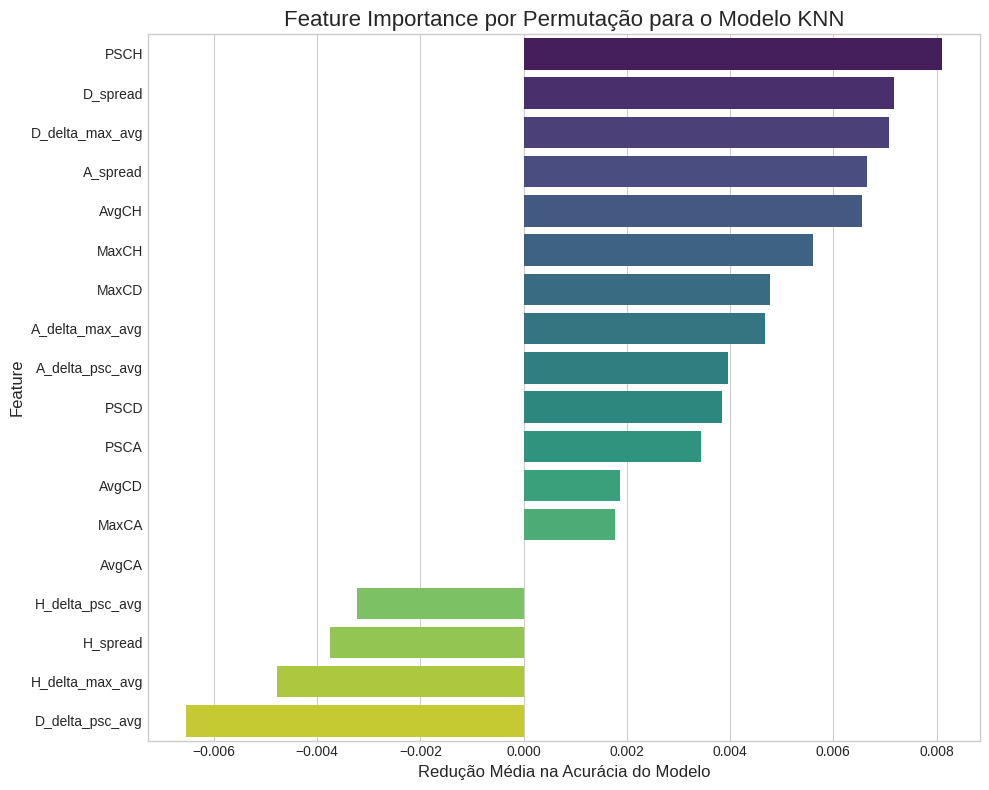

In [206]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns

# --- PRÉ-REQUISITOS ---
# 1. O DataFrame 'df' está carregado.
# 2. A coluna 'Res_num' já existe no 'df'.
# 3. As variáveis 'best_year' e 'best_k_final' foram definidas na etapa de otimização.
#
# Se precisar rodar de forma isolada, defina os valores manualmente:
best_year = 2018      # Exemplo: substitua pelo seu melhor ano
best_k_final = 19     # Exemplo: substitua pelo seu melhor k
# ------------------------

print(f"Iniciando a análise de Feature Importance para o modelo com dados a partir de {best_year} e k={best_k_final}")

# ==============================================================
# ETAPA 1: PREPARAR OS DADOS (USANDO OS MELHORES PARÂMETROS)
# ==============================================================

df['Date'] = pd.to_datetime(df['Date'], errors='coerce', dayfirst=True)
df_final = df[df['Date'].dt.year >= best_year].copy()

# **NÃO** criamos mais a coluna 'Res_bin'. Usaremos 'Res_num' diretamente.

# Features Derivadas
df_final['H_delta_max_avg'] = df_final['MaxCH'] - df_final['AvgCH']
df_final['H_delta_psc_avg'] = df_final['PSCH'] - df_final['AvgCH']
df_final['H_spread'] = df_final[['PSCH', 'AvgCH', 'MaxCH']].std(axis=1)
df_final['D_delta_max_avg'] = df_final['MaxCD'] - df_final['AvgCD']
df_final['D_delta_psc_avg'] = df_final['PSCD'] - df_final['AvgCD']
df_final['D_spread'] = df_final[['PSCD', 'AvgCD', 'MaxCD']].std(axis=1)
df_final['A_delta_max_avg'] = df_final['MaxCA'] - df_final['AvgCA']
df_final['A_delta_psc_avg'] = df_final['PSCA'] - df_final['AvgCA']
df_final['A_spread'] = df_final[['PSCA', 'AvgCA', 'MaxCA']].std(axis=1)

features = [
    'PSCH', 'AvgCH', 'MaxCH', 'H_delta_max_avg', 'H_delta_psc_avg', 'H_spread',
    'PSCD', 'AvgCD', 'MaxCD', 'D_delta_max_avg', 'D_delta_psc_avg', 'D_spread',
    'PSCA', 'AvgCA', 'MaxCA', 'A_delta_max_avg', 'A_delta_psc_avg', 'A_spread'
]

# MODIFICADO: Usando 'Res_num' para limpar dados nulos e definir X e y
df_final.dropna(subset=features + ['Res_num'], inplace=True)
X = df_final[features]
y = df_final['Res_num']

# Treino / Teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42, stratify=y)

# Escalonamento
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ==============================================================
# ETAPA 2: TREINAR O MODELO FINAL
# ==============================================================
knn = KNeighborsClassifier(n_neighbors=best_k_final)
knn.fit(X_train_scaled, y_train)
print("\nModelo final treinado com sucesso.")

# ==============================================================
# ETAPA 3: CALCULAR E PLOTAR A FEATURE IMPORTANCE
# ==============================================================
print("Calculando a importância das features por permutação...")

# Calcula a importância no conjunto de TESTE para evitar viés
result = permutation_importance(
    knn, X_test_scaled, y_test, n_repeats=10, random_state=42, n_jobs=-1
)

# Organiza os resultados em um DataFrame do Pandas
perm_importance = pd.DataFrame(
    {'feature': features, 'importance_mean': result.importances_mean}
)
perm_importance = perm_importance.sort_values('importance_mean', ascending=False)

print("\n--- Resultado da Análise de Importância ---\n")
print(perm_importance)

# Plotar o gráfico
plt.style.use('seaborn-v0_8-whitegrid')
fig, ax = plt.subplots(figsize=(10, 8))

sns.barplot(
    x='importance_mean',
    y='feature',
    data=perm_importance,
    palette='viridis',
    ax=ax
)

ax.set_title('Feature Importance por Permutação para o Modelo KNN', fontsize=16)
ax.set_xlabel('Redução Média na Acurácia do Modelo', fontsize=12)
ax.set_ylabel('Feature', fontsize=12)
plt.tight_layout()
plt.show()

In [207]:
import pandas as pd
import numpy as np

# ===================================================================
# 1. CARREGAMENTO E PREPARAÇÃO INICIAL DO DATASET
# ===================================================================
try:
    df = pd.read_csv('BRA.csv')
    print("✅ Dataset 'BRA.csv' carregado com sucesso.")
except FileNotFoundError:
    print("❌ Erro: Arquivo 'BRA.csv' não encontrado. Certifique-se de que ele está na mesma pasta que o seu script.")
    exit()

# --- REVISÃO E MELHORIA DAS COLUNAS ---
# Garante que os nomes dos times não tenham espaços extras
df['Home'] = df['Home'].str.strip()
df['Away'] = df['Away'].str.strip()
# Garante que as colunas de gols sejam numéricas, tratando erros
df['HG'] = pd.to_numeric(df['HG'], errors='coerce')
df['AG'] = pd.to_numeric(df['AG'], errors='coerce')
# ----------------------------------------

# Calcula as odds médias a partir das colunas de cada casa de aposta
odds_h = [col for col in df.columns if col.endswith('H')]
odds_d = [col for col in df.columns if col.endswith('D')]
odds_a = [col for col in df.columns if col.endswith('A')]
df['AvgCH'] = df[odds_h].mean(axis=1, skipna=True)
df['AvgCD'] = df[odds_d].mean(axis=1, skipna=True)
df['AvgCA'] = df[odds_a].mean(axis=1, skipna=True)

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')

# A coluna 'FTR' (Full Time Result) é usada para criar o alvo numérico
df['Res_num'] = df['Res'].map({'H': 1, 'D': 0, 'A': 0})
print("✅ Colunas de odds médias e alvo numérico criadas.")


# ===================================================================
# 2. ENGENHARIA DE FEATURES
# ===================================================================
print("\n🚀 Iniciando a engenharia de features avançadas...")

# FEATURE SET 1: PROBABILIDADES IMPLÍCITAS
df['Prob_H'] = 1 / df['AvgCH']
df['Prob_D'] = 1 / df['AvgCD']
df['Prob_A'] = 1 / df['AvgCA']
df['Prob_H_minus_A'] = df['Prob_H'] - df['Prob_A']
print("✅ Features de probabilidade criadas.")

# FEATURE SET 2: FORMA / MOMENTUM (ÚLTIMOS 5 JOGOS)
df['H_points'] = df['Res'].apply(lambda res: 3 if res == 'H' else 1 if res == 'D' else 0)
df['A_points'] = df['Res'].apply(lambda res: 3 if res == 'A' else 1 if res == 'D' else 0)

form_features = [
    'H_form_points_L5', 'A_form_points_L5', 'H_form_goals_scored_L5', 'A_form_goals_scored_L5',
    'H_form_goals_conceded_L5', 'A_form_goals_conceded_L5'
]
for feature in form_features:
    df[feature] = np.nan

# Uso de 'HomeTeam' e 'AwayTeam' para identificar os times
all_teams = pd.concat([df['Home'], df['Away']]).unique()
print(f"Calculando a forma (últimos 5 jogos) para {len(all_teams)} times...")

for team in all_teams:
    team_matches = df[(df['Home'] == team) | (df['Away'] == team)].copy()

    team_points = np.where(team_matches['Home'] == team, team_matches['H_points'], team_matches['A_points'])
    # Uso de 'FTHG' e 'FTAG' para calcular gols marcados/sofridos
    team_goals_scored = np.where(team_matches['Home'] == team, team_matches['HG'], team_matches['AG'])
    team_goals_conceded = np.where(team_matches['Home'] == team, team_matches['AG'], team_matches['HG'])

    form_points_sum = pd.Series(team_points).rolling(window=6, closed='left').sum()
    form_goals_scored_mean = pd.Series(team_goals_scored).rolling(window=6, closed='left').mean()
    form_goals_conceded_mean = pd.Series(team_goals_conceded).rolling(window=6, closed='left').mean()

    team_matches['form_points'] = form_points_sum.values
    team_matches['form_goals_scored'] = form_goals_scored_mean.values
    team_matches['form_goals_conceded'] = form_goals_conceded_mean.values

    home_indices = df[df['Home'] == team].index
    away_indices = df[df['Away'] == team].index

    df.loc[home_indices, 'H_form_points_L5'] = team_matches.loc[home_indices, 'form_points']
    df.loc[home_indices, 'H_form_goals_scored_L5'] = team_matches.loc[home_indices, 'form_goals_scored']
    df.loc[home_indices, 'H_form_goals_conceded_L5'] = team_matches.loc[home_indices, 'form_goals_conceded']

    df.loc[away_indices, 'A_form_points_L5'] = team_matches.loc[away_indices, 'form_points']
    df.loc[away_indices, 'A_form_goals_scored_L5'] = team_matches.loc[away_indices, 'form_goals_scored']
    df.loc[away_indices, 'A_form_goals_conceded_L5'] = team_matches.loc[away_indices, 'form_goals_conceded']

df['form_diff_points'] = df['H_form_points_L5'] - df['A_form_points_L5']
df['form_diff_goals_scored'] = df['H_form_goals_scored_L5'] - df['A_form_goals_scored_L5']
df['form_diff_goals_conceded'] = df['H_form_goals_conceded_L5'] - df['A_form_goals_conceded_L5']
print("✅ Features de forma e diferença de forma criadas.")

# FEATURE SET 3: MÉDIAS DA TEMPORADA
# --- Uso da coluna 'Season' ---
# Criamos 'Season' a partir do ano para agrupar corretamente as estatísticas anuais.
df['Season'] = df['Date'].dt.year
df['season_avg_H_goals_scored'] = df.groupby(['Season', 'Home'])['HG'].transform(lambda x: x.expanding().mean())
df['season_avg_A_goals_scored'] = df.groupby(['Season', 'Away'])['AG'].transform(lambda x: x.expanding().mean())
df['season_avg_H_goals_conceded'] = df.groupby(['Season', 'Home'])['AG'].transform(lambda x: x.expanding().mean())
df['season_avg_A_goals_conceded'] = df.groupby(['Season', 'Away'])['HG'].transform(lambda x: x.expanding().mean())
print("✅ Features de médias da temporada criadas.")


# ===================================================================
# 3. MONTAGEM FINAL DO CONJUNTO DE DADOS PARA O MODELO
# ===================================================================
print("\nMontando o DataFrame final para o treinamento...")

final_features = [
    'AvgCH', 'AvgCD', 'AvgCA',
    'Prob_H', 'Prob_D', 'Prob_A', 'Prob_H_minus_A',
    'H_form_points_L5', 'A_form_points_L5', 'form_diff_points',
    'H_form_goals_scored_L5', 'A_form_goals_scored_L5', 'form_diff_goals_scored',
    'H_form_goals_conceded_L5', 'A_form_goals_conceded_L5', 'form_diff_goals_conceded',
    'season_avg_H_goals_scored', 'season_avg_A_goals_scored',
    'season_avg_H_goals_conceded', 'season_avg_A_goals_conceded'
]

df_model = df.dropna(subset=final_features + ['Res_num'])
X = df_model[final_features]
y = df_model['Res_num']

print("\n🎉 Processo concluído!")
print(f"Seu conjunto de dados de treino está pronto com {X.shape[0]} amostras e {X.shape[1]} features.")
print("\nPrimeiras 5 linhas de X (features):")
print(X.head())

✅ Dataset 'BRA.csv' carregado com sucesso.
✅ Colunas de odds médias e alvo numérico criadas.

🚀 Iniciando a engenharia de features avançadas...
✅ Features de probabilidade criadas.
Calculando a forma (últimos 5 jogos) para 37 times...
✅ Features de forma e diferença de forma criadas.
✅ Features de médias da temporada criadas.

Montando o DataFrame final para o treinamento...

🎉 Processo concluído!
Seu conjunto de dados de treino está pronto com 4892 amostras e 20 features.

Primeiras 5 linhas de X (features):
       AvgCH     AvgCD     AvgCA    Prob_H    Prob_D    Prob_A  \
60  2.110000  3.460000  3.770000  0.473934  0.289017  0.265252   
61  3.046667  3.366667  2.516667  0.328228  0.297030  0.397351   
62  1.540000  4.353333  7.093333  0.649351  0.229709  0.140977   
63  2.993333  3.356667  2.493333  0.334076  0.297915  0.401070   
64  1.690000  3.910000  5.386667  0.591716  0.255754  0.185644   

    Prob_H_minus_A  H_form_points_L5  A_form_points_L5  form_diff_points  \
60        0.

✅ Dataset 'BRA.csv' carregado com sucesso.
✅ Engenharia de features concluída.

 treinando o modelo RandomForest para obter a importância das features...
✅ Modelo treinado.

--- Importância de Cada Feature (do maior para o menor) ---
                        Feature  Importance
16    season_avg_H_goals_scored    0.115264
19  season_avg_A_goals_conceded    0.091896
18  season_avg_H_goals_conceded    0.081951
17    season_avg_A_goals_scored    0.076209
6                Prob_H_minus_A    0.055269
5                        Prob_A    0.051744
3                        Prob_H    0.050710
0                         AvgCH    0.050019
1                         AvgCD    0.048189
2                         AvgCA    0.047114
4                        Prob_D    0.045449
9              form_diff_points    0.034305
15     form_diff_goals_conceded    0.034092
7              H_form_points_L5    0.032757
14     A_form_goals_conceded_L5    0.031357
13     H_form_goals_conceded_L5    0.031221
12       form_diff

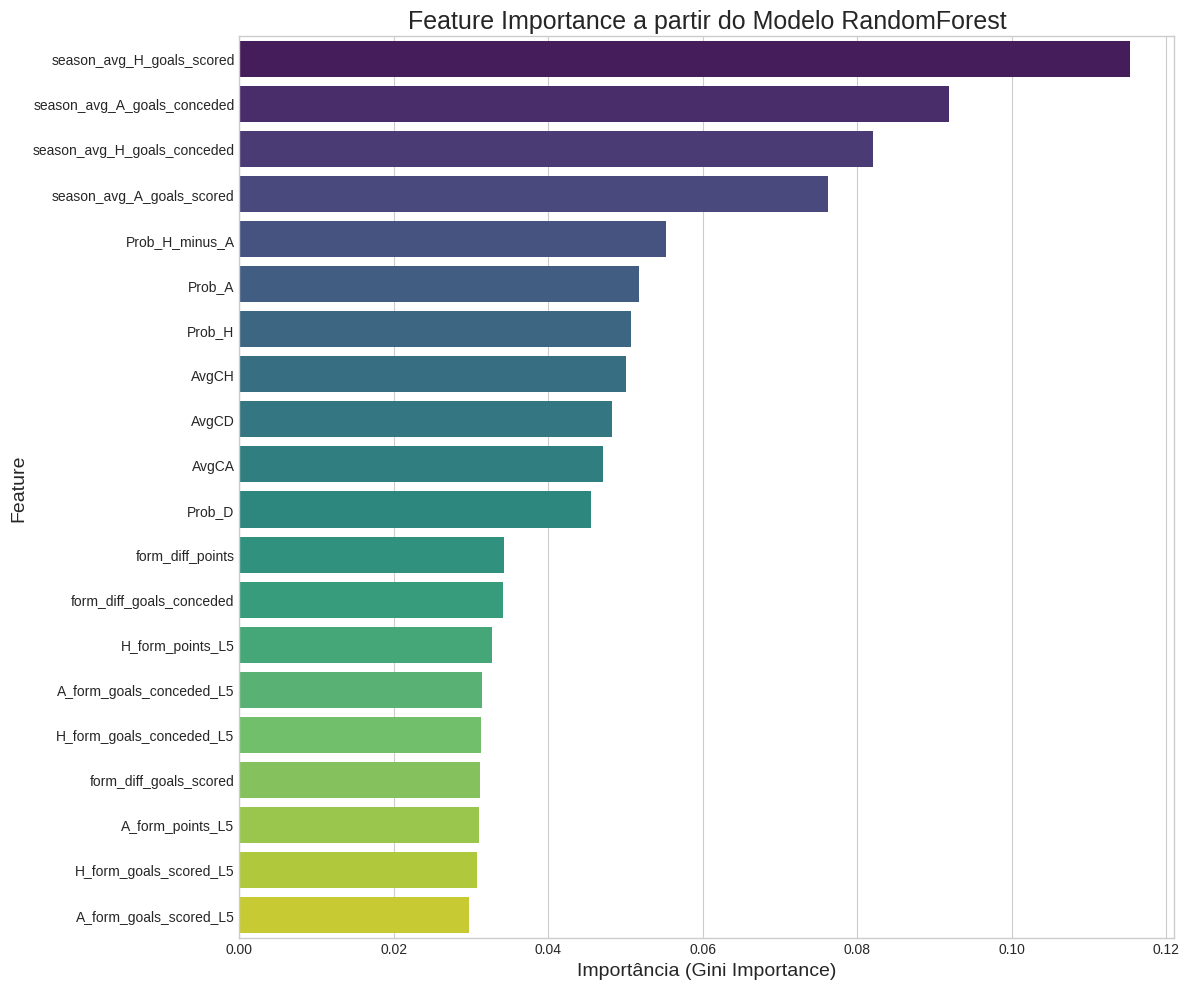

In [208]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# ===================================================================
# 1. CARREGAMENTO E ENGENHARIA DE FEATURES (CÓDIGO ANTERIOR)
# ===================================================================
try:
    df = pd.read_csv('BRA.csv')
    print("✅ Dataset 'BRA.csv' carregado com sucesso.")
except FileNotFoundError:
    print("❌ Erro: Arquivo 'BRA.csv' não encontrado.")
    exit()

# Preparações iniciais
df['Home'] = df['Home'].str.strip()
df['Away'] = df['Away'].str.strip()
df['HG'] = pd.to_numeric(df['HG'], errors='coerce')
df['AG'] = pd.to_numeric(df['AG'], errors='coerce')

odds_h = [col for col in df.columns if col.endswith('H')]
odds_d = [col for col in df.columns if col.endswith('D')]
odds_a = [col for col in df.columns if col.endswith('A')]
df['AvgCH'] = df[odds_h].mean(axis=1, skipna=True)
df['AvgCD'] = df[odds_d].mean(axis=1, skipna=True)
df['AvgCA'] = df[odds_a].mean(axis=1, skipna=True)

df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)
df = df.sort_values('Date')
df['Res_num'] = df['Res'].map({'H': 1, 'D': 0, 'A': 0})

# Feature Engineering...
df['Prob_H'] = 1 / df['AvgCH']
df['Prob_D'] = 1 / df['AvgCD']
df['Prob_A'] = 1 / df['AvgCA']
df['Prob_H_minus_A'] = df['Prob_H'] - df['Prob_A']

df['H_points'] = df['Res'].apply(lambda res: 3 if res == 'H' else 1 if res == 'D' else 0)
df['A_points'] = df['Res'].apply(lambda res: 3 if res == 'A' else 1 if res == 'D' else 0)
form_features = ['H_form_points_L5', 'A_form_points_L5', 'H_form_goals_scored_L5', 'A_form_goals_scored_L5', 'H_form_goals_conceded_L5', 'A_form_goals_conceded_L5']
for feature in form_features:
    df[feature] = np.nan
all_teams = pd.concat([df['Home'], df['Away']]).unique()

for team in all_teams:
    team_matches = df[(df['Home'] == team) | (df['Away'] == team)].copy()
    team_points = np.where(team_matches['Home'] == team, team_matches['H_points'], team_matches['A_points'])
    team_goals_scored = np.where(team_matches['Home'] == team, team_matches['HG'], team_matches['AG'])
    team_goals_conceded = np.where(team_matches['Home'] == team, team_matches['AG'], team_matches['HG'])
    form_points_sum = pd.Series(team_points).rolling(window=6, closed='left').sum()
    form_goals_scored_mean = pd.Series(team_goals_scored).rolling(window=6, closed='left').mean()
    form_goals_conceded_mean = pd.Series(team_goals_conceded).rolling(window=6, closed='left').mean()
    team_matches.loc[:, 'form_points'] = form_points_sum.values
    team_matches.loc[:, 'form_goals_scored'] = form_goals_scored_mean.values
    team_matches.loc[:, 'form_goals_conceded'] = form_goals_conceded_mean.values
    home_indices = df[df['Home'] == team].index
    away_indices = df[df['Away'] == team].index
    df.loc[home_indices, 'H_form_points_L5'] = team_matches.loc[home_indices, 'form_points']
    df.loc[home_indices, 'H_form_goals_scored_L5'] = team_matches.loc[home_indices, 'form_goals_scored']
    df.loc[home_indices, 'H_form_goals_conceded_L5'] = team_matches.loc[home_indices, 'form_goals_conceded']
    df.loc[away_indices, 'A_form_points_L5'] = team_matches.loc[away_indices, 'form_points']
    df.loc[away_indices, 'A_form_goals_scored_L5'] = team_matches.loc[away_indices, 'form_goals_scored']
    df.loc[away_indices, 'A_form_goals_conceded_L5'] = team_matches.loc[away_indices, 'form_goals_conceded']

df['form_diff_points'] = df['H_form_points_L5'] - df['A_form_points_L5']
df['form_diff_goals_scored'] = df['H_form_goals_scored_L5'] - df['A_form_goals_scored_L5']
df['form_diff_goals_conceded'] = df['H_form_goals_conceded_L5'] - df['A_form_goals_conceded_L5']

df['Season'] = df['Date'].dt.year
df['season_avg_H_goals_scored'] = df.groupby(['Season', 'Home'])['HG'].transform(lambda x: x.expanding().mean())
df['season_avg_A_goals_scored'] = df.groupby(['Season', 'Away'])['AG'].transform(lambda x: x.expanding().mean())
df['season_avg_H_goals_conceded'] = df.groupby(['Season', 'Home'])['AG'].transform(lambda x: x.expanding().mean())
df['season_avg_A_goals_conceded'] = df.groupby(['Season', 'Away'])['HG'].transform(lambda x: x.expanding().mean())
print("✅ Engenharia de features concluída.")

# ===================================================================
# 2. MONTAGEM FINAL E TREINAMENTO DO MODELO
# ===================================================================
final_features = [
    'AvgCH', 'AvgCD', 'AvgCA', 'Prob_H', 'Prob_D', 'Prob_A', 'Prob_H_minus_A',
    'H_form_points_L5', 'A_form_points_L5', 'form_diff_points', 'H_form_goals_scored_L5',
    'A_form_goals_scored_L5', 'form_diff_goals_scored', 'H_form_goals_conceded_L5',
    'A_form_goals_conceded_L5', 'form_diff_goals_conceded', 'season_avg_H_goals_scored',
    'season_avg_A_goals_scored', 'season_avg_H_goals_conceded', 'season_avg_A_goals_conceded'
]
df_model = df.dropna(subset=final_features + ['Res_num'])
X = df_model[final_features]
y = df_model['Res_num']

# Divisão em treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Treinamento do Modelo RandomForest
print("\n treinando o modelo RandomForest para obter a importância das features...")
model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)
print("✅ Modelo treinado.")

# ===================================================================
# 3. EXTRAÇÃO E PLOT DA FEATURE IMPORTANCE
# ===================================================================
# Extrai a importância de cada feature
importances = model.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values('Importance', ascending=False)

print("\n--- Importância de Cada Feature (do maior para o menor) ---")
print(importance_df)

# Plot do gráfico
plt.style.use('seaborn-v0_8-whitegrid')
plt.figure(figsize=(12, 10))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
plt.title('Feature Importance a partir do Modelo RandomForest', fontsize=18)
plt.xlabel('Importância (Gini Importance)', fontsize=14)
plt.ylabel('Feature', fontsize=14)
plt.tight_layout()
plt.show()

✅ Dataset 'BRA.csv' carregado com sucesso.
Iniciando a preparação dos dados e engenharia de features...
✅ Engenharia de features concluída.

Usando dados a partir de 2023.
Dataset final com 3472 amostras e 20 features.

🚀 Treinando e avaliando modelos...

--- Modelo: Regressão Logística ---
Acurácia no Conjunto de Teste: 0.6708
Relatório de Classificação:
                      precision    recall  f1-score   support

Não-Vitória Mandante       0.67      0.72      0.70       547
    Vitória Mandante       0.67      0.62      0.64       495

            accuracy                           0.67      1042
           macro avg       0.67      0.67      0.67      1042
        weighted avg       0.67      0.67      0.67      1042


--- Modelo: KNN (k=20) ---
Acurácia no Conjunto de Teste: 0.6593
Relatório de Classificação:
                      precision    recall  f1-score   support

Não-Vitória Mandante       0.66      0.72      0.69       547
    Vitória Mandante       0.66      0.59      0

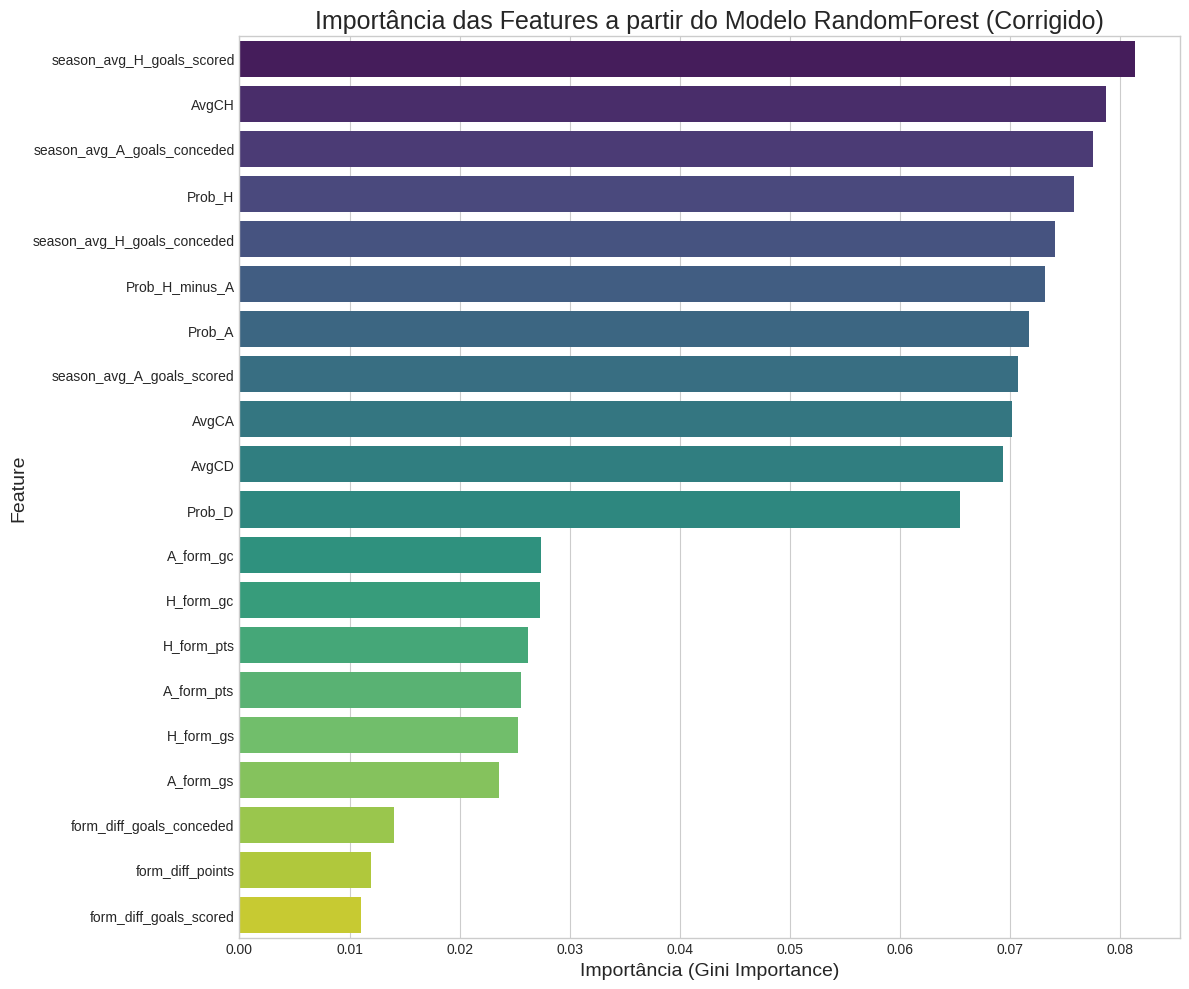

In [209]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignorar avisos para manter a saída mais limpa
warnings.filterwarnings('ignore')

#==============================================================================
# FUNÇÃO DE PREPARAÇÃO E ENGENHARIA DE FEATURES
#==============================================================================
def prepare_and_engineer_features(df_raw):
    """
    Recebe o DataFrame bruto e retorna um novo DataFrame com todas as
    features de engenharia e a variável alvo.
    """
    print("Iniciando a preparação dos dados e engenharia de features...")

    df = df_raw.copy()

    # --- 1. Limpeza e Formatação Inicial ---
    df['Home'] = df['Home'].str.strip()
    df['Away'] = df['Away'].str.strip()
    df['HG'] = pd.to_numeric(df['HG'], errors='coerce')
    df['AG'] = pd.to_numeric(df['AG'], errors='coerce')

    # Ordenar por data é crucial para features baseadas em tempo
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
    df.dropna(subset=['Date', 'HG', 'AG', 'Res'], inplace=True)
    df = df.sort_values('Date')

    # --- 2. Criação da Variável Alvo ---
    # Alvo: 1 se o mandante venceu (H), 0 caso contrário (D ou A)
    df['Target'] = df['Res'].map({'H': 1, 'D': 0, 'A': 0})

    # --- 3. Feature Engineering ---

    # A. Odds e Probabilidades
    odds_h = [col for col in df.columns if col.endswith('H')]
    odds_d = [col for col in df.columns if col.endswith('D')]
    odds_a = [col for col in df.columns if col.endswith('A')]
    df['AvgCH'] = df[odds_h].mean(axis=1, skipna=True)
    df['AvgCD'] = df[odds_d].mean(axis=1, skipna=True)
    df['AvgCA'] = df[odds_a].mean(axis=1, skipna=True)

    df['Prob_H'] = 1 / df['AvgCH']
    df['Prob_A'] = 1 / df['AvgCA']
    df['Prob_D'] = 1 / df['AvgCD']
    df['Prob_H_minus_A'] = df['Prob_H'] - df['Prob_A']

    # B. Forma Recente (Últimos 5 Jogos) - Lógica sem vazamento de dados
    # Esta parte está correta no seu código original usando closed='left'
    df['H_points'] = df['Res'].apply(lambda res: 3 if res == 'H' else 1 if res == 'D' else 0)
    df['A_points'] = df['Res'].apply(lambda res: 3 if res == 'A' else 1 if res == 'D' else 0)

    all_teams = pd.concat([df['Home'], df['Away']]).unique()
    form_data = []

    for team in all_teams:
        team_matches = df[(df['Home'] == team) | (df['Away'] == team)].copy()

        is_home = team_matches['Home'] == team
        points = np.where(is_home, team_matches['H_points'], team_matches['A_points'])
        goals_scored = np.where(is_home, team_matches['HG'], team_matches['AG'])
        goals_conceded = np.where(is_home, team_matches['AG'], team_matches['HG'])

        team_matches['form_pts_L5'] = pd.Series(points, index=team_matches.index).rolling(window=5, min_periods=1, closed='left').sum()
        team_matches['form_gs_L5'] = pd.Series(goals_scored, index=team_matches.index).rolling(window=5, min_periods=1, closed='left').mean()
        team_matches['form_gc_L5'] = pd.Series(goals_conceded, index=team_matches.index).rolling(window=5, min_periods=1, closed='left').mean()

        form_data.append(team_matches)

    df_form = pd.concat(form_data)

    df = df.merge(df_form[['Date', 'Home', 'Away', 'form_pts_L5', 'form_gs_L5', 'form_gc_L5']], on=['Date', 'Home', 'Away'], how='left', suffixes=('', '_H_temp'))
    df = df.merge(df_form[['Date', 'Home', 'Away', 'form_pts_L5', 'form_gs_L5', 'form_gc_L5']], on=['Date', 'Home', 'Away'], how='left', suffixes=('_H', '_A'))

    df.rename(columns={'form_pts_L5_H': 'H_form_pts', 'form_gs_L5_H': 'H_form_gs', 'form_gc_L5_H': 'H_form_gc',
                            'form_pts_L5_A': 'A_form_pts', 'form_gs_L5_A': 'A_form_gs', 'form_gc_L5_A': 'A_form_gc'}, inplace=True)

    # C. Médias da Temporada - LÓGICA CORRIGIDA PARA VAZAMENTO DE DADOS
    df['Season'] = df['Date'].dt.year

    # .shift(1) garante que a média para a partida N seja calculada com base nos dados das partidas 1 até N-1.
    df['season_avg_H_goals_scored'] = df.groupby(['Season', 'Home'])['HG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_A_goals_scored'] = df.groupby(['Season', 'Away'])['AG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_H_goals_conceded'] = df.groupby(['Season', 'Home'])['AG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_A_goals_conceded'] = df.groupby(['Season', 'Away'])['HG'].transform(lambda x: x.shift(1).expanding().mean())

    # D. Features de Diferença
    df['form_diff_points'] = df['H_form_pts'] - df['A_form_pts']
    df['form_diff_goals_scored'] = df['H_form_gs'] - df['A_form_gs']
    df['form_diff_goals_conceded'] = df['H_form_gc'] - df['A_form_gc']

    print("✅ Engenharia de features concluída.")
    return df

#==============================================================================
# SCRIPT PRINCIPAL DE ANÁLISE E TREINAMENTO
#==============================================================================
if __name__ == '__main__':

    # --- 1. Carregamento do Dataset ---
    try:
        df_raw = pd.read_csv('BRA.csv')
        print("✅ Dataset 'BRA.csv' carregado com sucesso.")
    except FileNotFoundError:
        print("❌ Erro: Arquivo 'BRA.csv' não encontrado. Certifique-se de que está na mesma pasta.")
        exit()

    # --- 2. Preparação e Feature Engineering ---
    df_prepared = prepare_and_engineer_features(df_raw)

    # --- 3. Definição do Cenário de Análise ---
    # Parâmetros ótimos encontrados na sua fase de otimização
    ANO_DE_CORTE = 2023
    MELHOR_K_PARA_KNN = 20

    df_final = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE].copy()

    # --- 4. Montagem Final dos Dados para o Modelo ---
    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA',
        'Prob_H', 'Prob_D', 'Prob_A', 'Prob_H_minus_A',
        'H_form_pts', 'A_form_pts', 'form_diff_points',
        'H_form_gs', 'A_form_gs', 'form_diff_goals_scored',
        'H_form_gc', 'A_form_gc', 'form_diff_goals_conceded',
        'season_avg_H_goals_scored', 'season_avg_A_goals_scored',
        'season_avg_H_goals_conceded', 'season_avg_A_goals_conceded'
    ]

    # Remover linhas com valores nulos (gerados pelo shift/rolling nos primeiros jogos)
    df_final.dropna(subset=final_features + ['Target'], inplace=True)

    X = df_final[final_features]
    y = df_final['Target']

    print(f"\nUsando dados a partir de {ANO_DE_CORTE}.")
    print(f"Dataset final com {X.shape[0]} amostras e {X.shape[1]} features.")

    # Divisão em Treino e Teste (estratificada para manter a proporção das classes)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Escalonamento dos dados
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # --- 5. Treinamento e Avaliação dos Modelos ---
    models = {
        "Regressão Logística": LogisticRegression(random_state=42, max_iter=1000),
        f"KNN (k={MELHOR_K_PARA_KNN})": KNeighborsClassifier(n_neighbors=MELHOR_K_PARA_KNN),
        "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1)
    }

    print("\n🚀 Treinando e avaliando modelos...")

    for name, model in models.items():
        # Para KNN, usamos dados escalonados. Para modelos de árvore, não é estritamente necessário, mas não prejudica.
        if "KNN" in name or "Regressão" in name:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else:
            model.fit(X_train, y_train) # RandomForest não precisa de escalonamento
            y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)

        print(f"\n--- Modelo: {name} ---")
        print(f"Acurácia no Conjunto de Teste: {accuracy:.4f}")
        print("Relatório de Classificação:")
        print(classification_report(y_test, y_pred, target_names=['Não-Vitória Mandante', 'Vitória Mandante']))

    # --- 6. Análise de Feature Importance do Melhor Modelo (RandomForest) ---
    print("\n--- Análise de Importância das Features (Modelo RandomForest) ---")

    rf_model = models["Random Forest"] # Pegamos o modelo já treinado
    importances = rf_model.feature_importances_

    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    print(importance_df)

    # Plot do gráfico
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 10))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title('Importância das Features a partir do Modelo RandomForest (Corrigido)', fontsize=18)
    plt.xlabel('Importância (Gini Importance)', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.tight_layout()
    plt.show()

✅ Dataset 'BRA.csv' carregado com sucesso.
Iniciando a preparação dos dados e engenharia de features...
✅ Engenharia de features concluída.

Usando dados a partir de 2023.
Dataset final com 823 amostras e 22 features.

🚀 Treinando e avaliando modelos...

--- Modelo: Regressão Logística ---
Acurácia no Conjunto de Teste: 0.6113
Relatório de Classificação:
                      precision    recall  f1-score   support

Não-Vitória Mandante       0.62      0.71      0.66       131
    Vitória Mandante       0.60      0.50      0.55       116

            accuracy                           0.61       247
           macro avg       0.61      0.60      0.60       247
        weighted avg       0.61      0.61      0.61       247


--- Modelo: KNN (k=20) ---
Acurácia no Conjunto de Teste: 0.6235
Relatório de Classificação:
                      precision    recall  f1-score   support

Não-Vitória Mandante       0.63      0.69      0.66       131
    Vitória Mandante       0.61      0.54      0.

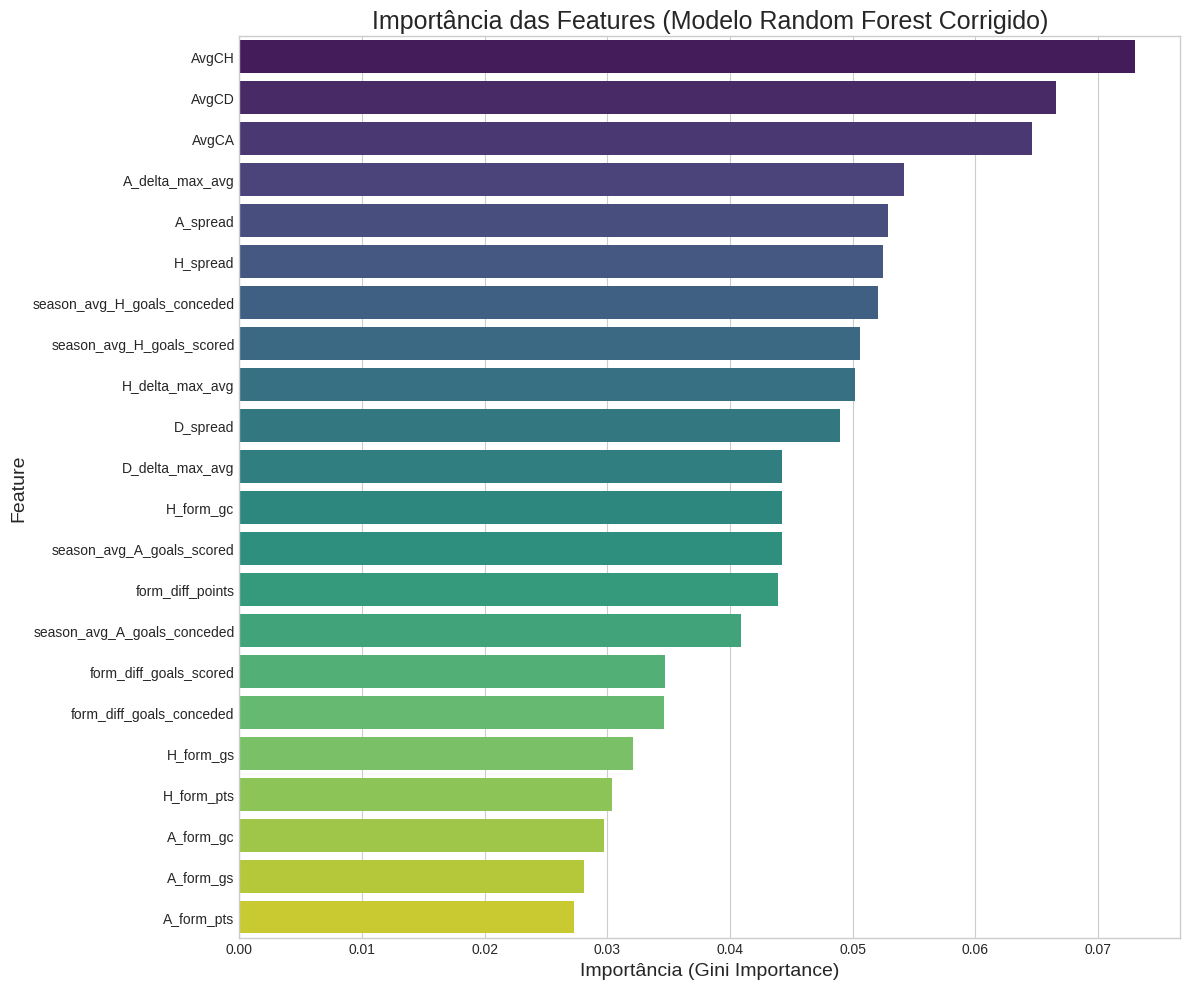

In [210]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignorar avisos para manter a saída mais limpa
warnings.filterwarnings('ignore')

#==============================================================================
# FUNÇÃO DE PREPARAÇÃO E ENGENHARIA DE FEATURES (LÓGICA CORRIGIDA)
#==============================================================================
def prepare_and_engineer_features(df_raw):
    """
    Recebe o DataFrame bruto e retorna um novo DataFrame com todas as
    features de engenharia e a variável alvo, com a lógica de data leakage corrigida.
    """
    print("Iniciando a preparação dos dados e engenharia de features...")

    df = df_raw.copy()

    # --- 1. Limpeza e Formatação Inicial ---
    df['Home'] = df['Home'].str.strip()
    df['Away'] = df['Away'].str.strip()
    df['HG'] = pd.to_numeric(df['HG'], errors='coerce')
    df['AG'] = pd.to_numeric(df['AG'], errors='coerce')

    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
    df.dropna(subset=['Date', 'HG', 'AG', 'Res'], inplace=True)
    df = df.sort_values('Date').reset_index(drop=True)

    # --- 2. Criação da Variável Alvo ---
    df['Target'] = df['Res'].map({'H': 1, 'D': 0, 'A': 0})

    # --- 3. Feature Engineering ---

    # A. Odds, Probabilidades, Deltas e Spreads
    odds_h_cols = [col for col in df.columns if col.endswith('H') and col not in ['Home', 'HG']]
    odds_d_cols = [col for col in df.columns if col.endswith('D') and col not in ['AvgCD']]
    odds_a_cols = [col for col in df.columns if col.endswith('A') and col not in ['Away', 'AG']]

    df['AvgCH'] = df[odds_h_cols].mean(axis=1, skipna=True)
    df['AvgCD'] = df[odds_d_cols].mean(axis=1, skipna=True)
    df['AvgCA'] = df[odds_a_cols].mean(axis=1, skipna=True)

    df['MaxCH'] = df[odds_h_cols].max(axis=1, skipna=True)
    df['MaxCD'] = df[odds_d_cols].max(axis=1, skipna=True)
    df['MaxCA'] = df[odds_a_cols].max(axis=1, skipna=True)

    df['H_spread'] = df[odds_h_cols].std(axis=1, skipna=True)
    df['D_spread'] = df[odds_d_cols].std(axis=1, skipna=True)
    df['A_spread'] = df[odds_a_cols].std(axis=1, skipna=True)

    df['H_delta_max_avg'] = df['MaxCH'] - df['AvgCH']
    df['D_delta_max_avg'] = df['MaxCD'] - df['AvgCD']
    df['A_delta_max_avg'] = df['MaxCA'] - df['AvgCA']

    # B. Forma Recente (Últimos 5 Jogos) - Lógica segura
    df['H_points'] = df['Res'].apply(lambda res: 3 if res == 'H' else 1 if res == 'D' else 0)
    df['A_points'] = df['Res'].apply(lambda res: 3 if res == 'A' else 1 if res == 'D' else 0)

    all_teams = pd.concat([df['Home'], df['Away']]).unique()

    # Inicializa as colunas para evitar erros
    form_cols = ['H_form_pts', 'A_form_pts', 'H_form_gs', 'A_form_gs', 'H_form_gc', 'A_form_gc']
    for col in form_cols:
        df[col] = np.nan

    for team in all_teams:
        # Seleciona apenas as linhas relevantes para o time atual, mantendo o índice original
        team_matches = df[(df['Home'] == team) | (df['Away'] == team)].copy()

        is_home = (team_matches['Home'] == team)
        points = np.where(is_home, team_matches['H_points'], team_matches['A_points'])
        goals_scored = np.where(is_home, team_matches['HG'], team_matches['AG'])
        goals_conceded = np.where(is_home, team_matches['AG'], team_matches['HG'])

        # Calcula as features de forma no DataFrame temporário
        # 'closed=left' garante que a janela rolante use apenas os jogos passados
        form_pts_L5 = pd.Series(points, index=team_matches.index).rolling(window=5, min_periods=1, closed='left').sum()
        form_gs_L5 = pd.Series(goals_scored, index=team_matches.index).rolling(window=5, min_periods=1, closed='left').mean()
        form_gc_L5 = pd.Series(goals_conceded, index=team_matches.index).rolling(window=5, min_periods=1, closed='left').mean()

        # Atribui de volta ao dataframe principal usando os índices corretos do team_matches
        df.loc[team_matches[is_home].index, 'H_form_pts'] = form_pts_L5[is_home]
        df.loc[team_matches[is_home].index, 'H_form_gs'] = form_gs_L5[is_home]
        df.loc[team_matches[is_home].index, 'H_form_gc'] = form_gc_L5[is_home]

        df.loc[team_matches[~is_home].index, 'A_form_pts'] = form_pts_L5[~is_home]
        df.loc[team_matches[~is_home].index, 'A_form_gs'] = form_gs_L5[~is_home]
        df.loc[team_matches[~is_home].index, 'A_form_gc'] = form_gc_L5[~is_home]


    # C. Médias da Temporada - LÓGICA CORRIGIDA
    df['Season'] = df['Date'].dt.year
    df['season_avg_H_goals_scored'] = df.groupby(['Season', 'Home'])['HG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_A_goals_scored'] = df.groupby(['Season', 'Away'])['AG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_H_goals_conceded'] = df.groupby(['Season', 'Home'])['AG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_A_goals_conceded'] = df.groupby(['Season', 'Away'])['HG'].transform(lambda x: x.shift(1).expanding().mean())

    # D. Features de Diferença (após todos os cálculos)
    df['form_diff_points'] = df['H_form_pts'] - df['A_form_pts']
    df['form_diff_goals_scored'] = df['H_form_gs'] - df['A_form_gs']
    df['form_diff_goals_conceded'] = df['H_form_gc'] - df['A_form_gc']

    print("✅ Engenharia de features concluída.")
    return df

#==============================================================================
# SCRIPT PRINCIPAL DE ANÁLISE E TREINAMENTO
#==============================================================================
if __name__ == '__main__':

    # --- 1. Carregamento do Dataset ---
    try:
        df_raw = pd.read_csv('BRA.csv')
        print("✅ Dataset 'BRA.csv' carregado com sucesso.")
    except FileNotFoundError:
        print("❌ Erro: Arquivo 'BRA.csv' não encontrado.")
        exit()

    # --- 2. Preparação e Feature Engineering ---
    df_prepared = prepare_and_engineer_features(df_raw)

    # --- 3. Definição do Cenário de Análise ---
    ANO_DE_CORTE = 2023
    MELHOR_K_PARA_KNN = 20

    df_final = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE].copy()

    # --- 4. Montagem Final dos Dados para o Modelo ---
    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA',
        'H_spread', 'D_spread', 'A_spread',
        'H_delta_max_avg', 'D_delta_max_avg', 'A_delta_max_avg',
        'H_form_pts', 'A_form_pts', 'form_diff_points',
        'H_form_gs', 'A_form_gs', 'form_diff_goals_scored',
        'H_form_gc', 'A_form_gc', 'form_diff_goals_conceded',
        'season_avg_H_goals_scored', 'season_avg_A_goals_scored',
        'season_avg_H_goals_conceded', 'season_avg_A_goals_conceded'
    ]

    df_final.dropna(subset=final_features + ['Target'], inplace=True)

    X = df_final[final_features]
    y = df_final['Target']

    print(f"\nUsando dados a partir de {ANO_DE_CORTE}.")
    print(f"Dataset final com {X.shape[0]} amostras e {X.shape[1]} features.")

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # --- 5. Treinamento e Avaliação dos Modelos ---
    models = {
        "Regressão Logística": LogisticRegression(random_state=42, max_iter=1000),
        f"KNN (k={MELHOR_K_PARA_KNN})": KNeighborsClassifier(n_neighbors=MELHOR_K_PARA_KNN),
        "Random Forest": RandomForestClassifier(n_estimators=150, random_state=42, n_jobs=-1, class_weight='balanced')
    }

    results = {}
    print("\n🚀 Treinando e avaliando modelos...")

    for name, model in models.items():
        if "KNN" in name or "Regressão" in name:
            model.fit(X_train_scaled, y_train)
            y_pred = model.predict(X_test_scaled)
        else: # RandomForest não precisa de escalonamento
            model.fit(X_train, y_train)
            y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        results[name] = accuracy

        print(f"\n--- Modelo: {name} ---")
        print(f"Acurácia no Conjunto de Teste: {accuracy:.4f}")
        print("Relatório de Classificação:")
        print(classification_report(y_test, y_pred, target_names=['Não-Vitória Mandante', 'Vitória Mandante']))

    # --- 6. Análise de Feature Importance do Melhor Modelo ---
    best_model_name = "Random Forest"
    print(f"\n--- Análise de Importância das Features (Modelo {best_model_name}) ---")

    rf_model = models[best_model_name]
    importances = rf_model.feature_importances_

    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    print(importance_df)

    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 10))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title(f'Importância das Features (Modelo {best_model_name} Corrigido)', fontsize=18)
    plt.xlabel('Importância (Gini Importance)', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.tight_layout()
    plt.show()

In [211]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import warnings

# (Vou omitir a função prepare_and_engineer_features aqui para ser breve,
# mas ela deve ser a mesma da resposta anterior)
# >>> INSIRA A FUNÇÃO prepare_and_engineer_features(df_raw) AQUI <<<

#==============================================================================
# SCRIPT PRINCIPAL DE OTIMIZAÇÃO E ANÁLISE
#==============================================================================
if __name__ == '__main__':

    # --- 1. Carregamento e Preparação dos Dados ---
    try:
        df_raw = pd.read_csv('BRA.csv')
    except FileNotFoundError:
        print("❌ Erro: Arquivo 'BRA.csv' não encontrado.")
        exit()

    # Usando a mesma função de antes para garantir consistência
    df_prepared = prepare_and_engineer_features(df_raw)

    # --- 2. Definição do Cenário de Análise ---
    ANO_DE_CORTE = 2023
    df_final = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE].copy()

    # --- 3. Montagem Final dos Dados ---
    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA', 'H_spread', 'D_spread', 'A_spread',
        'H_delta_max_avg', 'D_delta_max_avg', 'A_delta_max_avg', 'H_form_pts',
        'A_form_pts', 'form_diff_points', 'H_form_gs', 'A_form_gs',
        'form_diff_goals_scored', 'H_form_gc', 'A_form_gc',
        'form_diff_goals_conceded', 'season_avg_H_goals_scored',
        'season_avg_A_goals_scored', 'season_avg_H_goals_conceded',
        'season_avg_A_goals_conceded'
    ]
    df_final.dropna(subset=final_features + ['Target'], inplace=True)
    X = df_final[final_features]
    y = df_final['Target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    print(f"\nIniciando otimização com dados a partir de {ANO_DE_CORTE}.")
    print(f"Tamanho do conjunto de treino: {len(X_train)} amostras.")

    # --- 4. Otimização com GridSearchCV ---
    print("\n🚀 Otimizando hiperparâmetros do RandomForest... (Isso pode levar alguns minutos)")

    # Definindo a grade de parâmetros que queremos testar
    param_grid = {
        'n_estimators': [100, 150, 200],         # Número de árvores
        'max_depth': [10, 20, None],             # Profundidade máxima. None = sem limite
        'min_samples_split': [2, 5, 10],         # Mínimo de amostras para dividir um nó
        'min_samples_leaf': [1, 2, 4],           # Mínimo de amostras em um nó folha
        'class_weight': ['balanced', None]       # Se deve balancear as classes ou não
    }

    # Instanciando o modelo base
    rf = RandomForestClassifier(random_state=42, n_jobs=-1)

    # Configurando o GridSearchCV
    # cv=5 significa validação cruzada com 5 pastas (folds)
    # n_jobs=-1 usa todos os processadores do seu computador para acelerar
    # verbose=2 mostra o progresso da busca
    grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2, scoring='accuracy')

    # Executando a busca (a parte demorada)
    grid_search.fit(X_train, y_train)

    # --- 5. Análise dos Resultados da Otimização ---
    print("\n🏆 Otimização Concluída!")
    print("Melhores parâmetros encontrados:")
    print(grid_search.best_params_)
    print(f"\nMelhor acurácia durante a validação cruzada: {grid_search.best_score_:.4f}")

    # --- 6. Avaliação Final com o Modelo Otimizado ---
    print("\n--- Avaliação Final no Conjunto de Teste com o Melhor Modelo ---")

    # O GridSearchCV já retreina o melhor modelo com todos os dados de treino
    best_model = grid_search.best_estimator_

    y_pred = best_model.predict(X_test)

    final_accuracy = accuracy_score(y_test, y_pred)

    print(f"Acurácia final no Conjunto de Teste: {final_accuracy:.4f}")
    print("Relatório de Classificação Final:")
    print(classification_report(y_test, y_pred, target_names=['Não-Vitória Mandante', 'Vitória Mandante']))

Iniciando a preparação dos dados e engenharia de features...
✅ Engenharia de features concluída.

Iniciando otimização com dados a partir de 2023.
Tamanho do conjunto de treino: 576 amostras.

🚀 Otimizando hiperparâmetros do RandomForest... (Isso pode levar alguns minutos)
Fitting 5 folds for each of 162 candidates, totalling 810 fits

🏆 Otimização Concluída!
Melhores parâmetros encontrados:
{'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

Melhor acurácia durante a validação cruzada: 0.6232

--- Avaliação Final no Conjunto de Teste com o Melhor Modelo ---
Acurácia final no Conjunto de Teste: 0.6559
Relatório de Classificação Final:
                      precision    recall  f1-score   support

Não-Vitória Mandante       0.66      0.74      0.70       131
    Vitória Mandante       0.66      0.56      0.60       116

            accuracy                           0.66       247
           macro avg       0.66      0.65   

Iniciando a preparação dos dados e engenharia de features...
✅ Engenharia de features concluída.

Iniciando backtesting com dados a partir de 2023.
Dados de Treino: 576 jogos | Dados de Teste/Simulação: 247 jogos.

🚀 Realizando a simulação de apostas de valor...

✅ Simulação Concluída!
--- Relatório do Backtest da Estratégia ---
Total de Oportunidades de Valor Encontradas: 117
Total de Unidades Apostadas: 1170.00
Taxa de Acerto das Apostas de Valor: 48.72%
Lucro/Prejuízo Líquido: -35.90 unidades
Retorno Sobre o Investimento (ROI): -3.07%


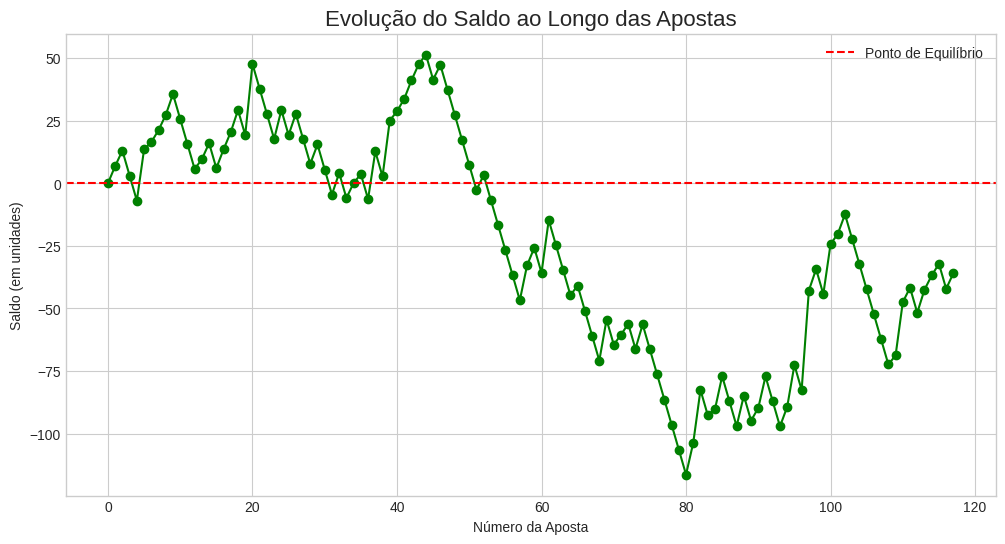

In [212]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignorar avisos
warnings.filterwarnings('ignore')

# >>> INSIRA A FUNÇÃO `prepare_and_engineer_features(df_raw)` DA RESPOSTA ANTERIOR AQUI <<<
# É crucial que seja a mesma função, com a lógica de feature engineering corrigida.

#==============================================================================
# SCRIPT PRINCIPAL DE BACKTESTING
#==============================================================================
if __name__ == '__main__':

    # --- 1. Carregamento e Preparação dos Dados ---
    try:
        df_raw = pd.read_csv('BRA.csv')
    except FileNotFoundError:
        print("❌ Erro: Arquivo 'BRA.csv' não encontrado.")
        exit()

    df_prepared = prepare_and_engineer_features(df_raw)

    # --- 2. Definição do Cenário e Features ---
    ANO_DE_CORTE = 2023
    df_final = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE].copy()

    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA', 'H_spread', 'D_spread', 'A_spread',
        'H_delta_max_avg', 'D_delta_max_avg', 'A_delta_max_avg', 'H_form_pts',
        'A_form_pts', 'form_diff_points', 'H_form_gs', 'A_form_gs',
        'form_diff_goals_scored', 'H_form_gc', 'A_form_gc',
        'form_diff_goals_conceded', 'season_avg_H_goals_scored',
        'season_avg_A_goals_scored', 'season_avg_H_goals_conceded',
        'season_avg_A_goals_conceded'
    ]

    df_final.dropna(subset=final_features + ['Target'], inplace=True)

    # --- 3. Divisão CRONOLÓGICA para Backtesting ---
    # Para um backtest realista, treinamos com dados mais antigos e testamos nos mais novos.

    test_size = 0.3 # Usaremos 30% dos dados mais recentes para a simulação
    split_index = int(len(df_final) * (1 - test_size))

    df_train = df_final.iloc[:split_index]
    df_test = df_final.iloc[split_index:]

    X_train = df_train[final_features]
    y_train = df_train['Target']
    X_test = df_test[final_features]
    y_test = df_test['Target']

    print(f"\nIniciando backtesting com dados a partir de {ANO_DE_CORTE}.")
    print(f"Dados de Treino: {len(X_train)} jogos | Dados de Teste/Simulação: {len(X_test)} jogos.")

    # --- 4. Treinamento do Modelo Otimizado ---
    # Usando os melhores parâmetros que o GridSearchCV encontrou
    optimised_params = {
        'class_weight': 'balanced',
        'max_depth': 10,
        'min_samples_leaf': 2,
        'min_samples_split': 2,
        'n_estimators': 150,
        'random_state': 42,
        'n_jobs': -1
    }

    model = RandomForestClassifier(**optimised_params)
    model.fit(X_train, y_train)

    # --- 5. Passo Final: Backtesting da Estratégia de Aposta de Valor ---
    print("\n🚀 Realizando a simulação de apostas de valor...")

    # A. Obter as probabilidades do modelo para o conjunto de teste
    # model.predict_proba retorna [prob_classe_0, prob_classe_1] para cada jogo
    # Classe 1 = Vitória Mandante, Classe 0 = Não-Vitória Mandante
    pred_probs = model.predict_proba(X_test)[:, 1]

    # B. Criar um dataframe para a simulação
    df_backtest = df_test.copy()
    df_backtest['prob_modelo'] = pred_probs

    # C. Definir parâmetros da estratégia
    STAKE_UNITARIA = 10 # Valor de cada aposta (ex: 10 unidades)
    MIN_VALOR_PERCEBIDO = 0.05 # Exigir um "valor" ou "edge" mínimo de 5% para apostar

    # D. Lógica da Simulação
    saldo = 0
    historico_saldo = [saldo]
    total_apostado = 0
    apostas_feitas = 0
    apostas_vencidas = 0

    # Iterar sobre cada jogo no conjunto de teste
    for index, row in df_backtest.iterrows():
        prob_modelo = row['prob_modelo']
        odd_mandante = row['AvgCH'] # Usando a odd média do mandante
        resultado_real = row['Target']

        # Calcular o valor percebido
        valor_calculado = (prob_modelo * odd_mandante) - 1

        # Condição para apostar
        if valor_calculado > MIN_VALOR_PERCEBIDO:
            apostas_feitas += 1
            total_apostado += STAKE_UNITARIA

            if resultado_real == 1: # Aposta venceu
                saldo += (odd_mandante * STAKE_UNITARIA) - STAKE_UNITARIA
                apostas_vencidas += 1
            else: # Aposta perdida
                saldo -= STAKE_UNITARIA

            historico_saldo.append(saldo)

    # --- 6. Relatório Final do Backtest ---
    print("\n✅ Simulação Concluída!")
    print("--- Relatório do Backtest da Estratégia ---")

    if apostas_feitas > 0:
        taxa_acerto = (apostas_vencidas / apostas_feitas) * 100
        roi = (saldo / total_apostado) * 100

        print(f"Total de Oportunidades de Valor Encontradas: {apostas_feitas}")
        print(f"Total de Unidades Apostadas: {total_apostado:.2f}")
        print(f"Taxa de Acerto das Apostas de Valor: {taxa_acerto:.2f}%")
        print(f"Lucro/Prejuízo Líquido: {saldo:.2f} unidades")
        print(f"Retorno Sobre o Investimento (ROI): {roi:.2f}%")
    else:
        print("Nenhuma oportunidade de aposta de valor foi encontrada com os critérios definidos.")

    # --- 7. Visualização do Saldo ---
    if apostas_feitas > 0:
        plt.style.use('seaborn-v0_8-whitegrid')
        plt.figure(figsize=(12, 6))
        plt.plot(historico_saldo, marker='o', linestyle='-', color='g')
        plt.title('Evolução do Saldo ao Longo das Apostas', fontsize=16)
        plt.xlabel('Número da Aposta')
        plt.ylabel('Saldo (em unidades)')
        plt.axhline(0, color='r', linestyle='--', label='Ponto de Equilíbrio')
        plt.legend()
        plt.grid(True)
        plt.show()

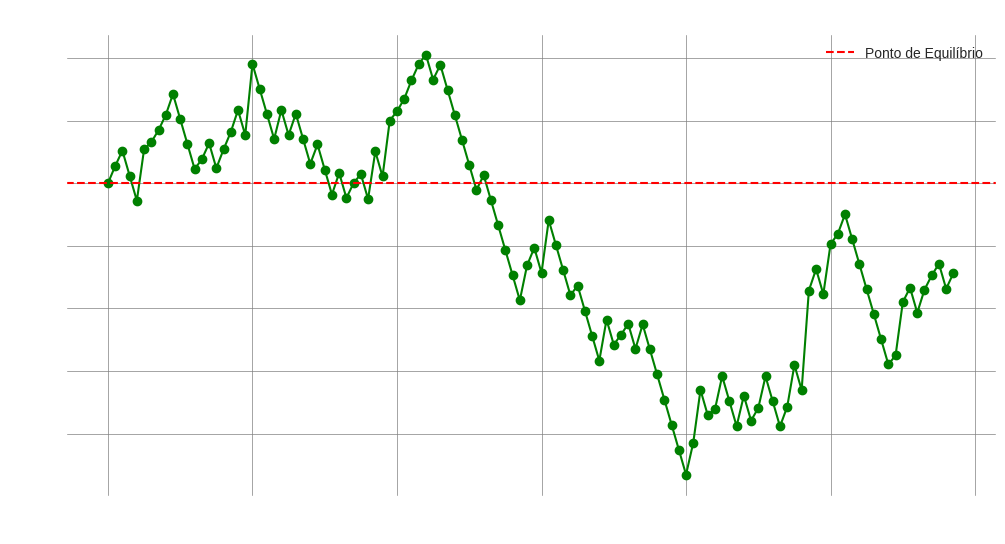

In [213]:
# prompt: plot the last graphic, with the background transparent and  text in white

plt.figure(figsize=(12, 6), facecolor='none') # Set facecolor to 'none' for transparency
plt.plot(historico_saldo, marker='o', linestyle='-', color='green') # Set color to 'white'
plt.title('Evolução do Saldo ao Longo das Apostas', fontsize=16, color='white') # Set color to 'white'
plt.xlabel('Número da Aposta', color='white') # Set color to 'white'
plt.ylabel('Saldo (em unidades)', color='white') # Set color to 'white'
plt.axhline(0, color='r', linestyle='--', label='Ponto de Equilíbrio')
plt.legend()
plt.grid(True, color='gray', linestyle='-', linewidth=0.5) # Adjust grid color if needed

# Optional: Make tick labels and spines white
ax = plt.gca()
ax.tick_params(axis='x', colors='white')
ax.tick_params(axis='y', colors='white')
ax.spines['bottom'].set_color('white')
ax.spines['top'].set_color('white')
ax.spines['left'].set_color('white')
ax.spines['right'].set_color('white')


plt.show()


Iniciando a preparação dos dados e engenharia de features...
✅ Engenharia de features concluída.

🚀 Otimizando o limiar para máximo ROI...

🏆 Otimização Concluída!
--- Melhor Estratégia Encontrada ---
Melhor Limiar de Valor: 0.18 (ou 18%)
ROI Máximo Atingido: 13.24%
Número de Apostas com este Limiar: 53
Lucro Líquido com este Limiar: 70.15 unidades


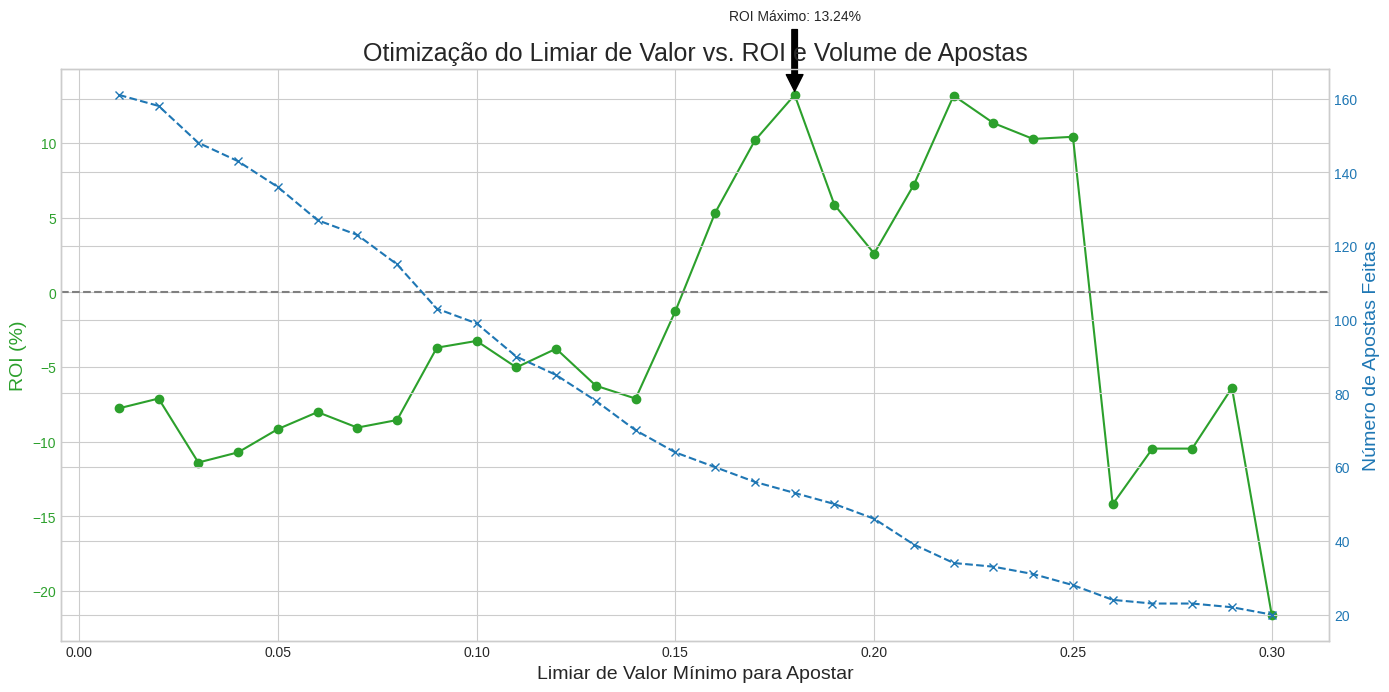

In [214]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignorar avisos
warnings.filterwarnings('ignore')

# >>> INSIRA A FUNÇÃO `prepare_and_engineer_features(df_raw)` DA RESPOSTA ANTERIOR AQUI <<<

#==============================================================================
# SCRIPT PRINCIPAL DE OTIMIZAÇÃO DE LIMIAR
#==============================================================================
if __name__ == '__main__':

    # --- 1. Carregamento e Preparação dos Dados ---
    try:
        df_raw = pd.read_csv('BRA.csv')
    except FileNotFoundError:
        print("❌ Erro: Arquivo 'BRA.csv' não encontrado.")
        exit()

    df_prepared = prepare_and_engineer_features(df_raw)

    # --- 2. Definição do Cenário e Features ---
    ANO_DE_CORTE = 2022
    df_final = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE].copy()

    # (A lista de final_features e a limpeza de NaNs vêm aqui)
    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA', 'H_spread', 'D_spread', 'A_spread',
        'H_delta_max_avg', 'D_delta_max_avg', 'A_delta_max_avg', 'H_form_pts',
        'A_form_pts', 'form_diff_points', 'H_form_gs', 'A_form_gs',
        'form_diff_goals_scored', 'H_form_gc', 'A_form_gc',
        'form_diff_goals_conceded', 'season_avg_H_goals_scored',
        'season_avg_A_goals_scored', 'season_avg_H_goals_conceded',
        'season_avg_A_goals_conceded'
    ]
    df_final.dropna(subset=final_features + ['Target'], inplace=True)

    # --- 3. Divisão Cronológica e Treinamento do Modelo ---
    test_size = 0.3
    split_index = int(len(df_final) * (1 - test_size))
    df_train, df_test = df_final.iloc[:split_index], df_final.iloc[split_index:]

    X_train, y_train = df_train[final_features], df_train['Target']
    X_test, y_test = df_test[final_features], df_test['Target']

    optimised_params = {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150,'random_state': 42,'n_jobs': -1}
    model = RandomForestClassifier(**optimised_params)
    model.fit(X_train, y_train)

    # --- 4. Preparação para o Loop de Backtesting ---
    pred_probs = model.predict_proba(X_test)[:, 1]
    df_backtest = df_test.copy()
    df_backtest['prob_modelo'] = pred_probs

    # --- 5. Otimização do Limiar de Valor ---
    print("\n🚀 Otimizando o limiar para máximo ROI...")

    # Definindo a faixa de limiares para testar (de 1% a 30%)
    limiares = np.arange(0.01, 0.31, 0.01)
    resultados_backtest = []
    STAKE_UNITARIA = 10

    for limiar in limiares:
        saldo = 0
        total_apostado = 0
        apostas_feitas = 0

        for index, row in df_backtest.iterrows():
            prob_modelo = row['prob_modelo']
            odd_mandante = row['AvgCH']
            resultado_real = row['Target']

            valor_calculado = (prob_modelo * odd_mandante) - 1

            if valor_calculado > limiar:
                apostas_feitas += 1
                total_apostado += STAKE_UNITARIA

                if resultado_real == 1:
                    saldo += (odd_mandante * STAKE_UNITARIA) - STAKE_UNITARIA
                else:
                    saldo -= STAKE_UNITARIA

        # Calcular ROI e guardar resultados
        if total_apostado > 0:
            roi = (saldo / total_apostado) * 100
            resultados_backtest.append({'limiar': limiar, 'roi': roi, 'n_apostas': apostas_feitas, 'lucro': saldo})
        else:
            resultados_backtest.append({'limiar': limiar, 'roi': 0, 'n_apostas': 0, 'lucro': 0})

    # --- 6. Análise dos Resultados da Otimização ---
    df_resultados = pd.DataFrame(resultados_backtest)

    if df_resultados.empty or df_resultados['n_apostas'].sum() == 0:
        print("Nenhuma oportunidade de aposta foi encontrada em nenhum dos limiares testados.")
    else:
        # Encontrar o melhor resultado
        melhor_resultado = df_resultados.loc[df_resultados['roi'].idxmax()]

        print("\n🏆 Otimização Concluída!")
        print("--- Melhor Estratégia Encontrada ---")
        print(f"Melhor Limiar de Valor: {melhor_resultado['limiar']:.2f} (ou {melhor_resultado['limiar']*100:.0f}%)")
        print(f"ROI Máximo Atingido: {melhor_resultado['roi']:.2f}%")
        print(f"Número de Apostas com este Limiar: {int(melhor_resultado['n_apostas'])}")
        print(f"Lucro Líquido com este Limiar: {melhor_resultado['lucro']:.2f} unidades")

        # --- 7. Plot do Gráfico de ROI vs. Limiar ---
        fig, ax1 = plt.subplots(figsize=(14, 7))

        # Plot do ROI
        color = 'tab:green'
        ax1.set_xlabel('Limiar de Valor Mínimo para Apostar', fontsize=14)
        ax1.set_ylabel('ROI (%)', color=color, fontsize=14)
        ax1.plot(df_resultados['limiar'], df_resultados['roi'], color=color, marker='o', label='ROI')
        ax1.tick_params(axis='y', labelcolor=color)
        ax1.axhline(0, color='gray', linestyle='--')

        # Anotar o ponto de ROI máximo
        ax1.annotate(f'ROI Máximo: {melhor_resultado["roi"]:.2f}%',
                     xy=(melhor_resultado['limiar'], melhor_resultado['roi']),
                     xytext=(melhor_resultado['limiar'], melhor_resultado['roi'] + 5),
                     arrowprops=dict(facecolor='black', shrink=0.05),
                     ha='center')

        # Criar um segundo eixo Y para o número de apostas
        ax2 = ax1.twinx()
        color = 'tab:blue'
        ax2.set_ylabel('Número de Apostas Feitas', color=color, fontsize=14)
        ax2.plot(df_resultados['limiar'], df_resultados['n_apostas'], color=color, marker='x', linestyle='--', label='Nº de Apostas')
        ax2.tick_params(axis='y', labelcolor=color)

        fig.tight_layout()
        plt.title('Otimização do Limiar de Valor vs. ROI e Volume de Apostas', fontsize=18)
        plt.grid(True)
        plt.show()

Iniciando a preparação dos dados e engenharia de features...
✅ Engenharia de features concluída.

✅ Modelo treinado. Iniciando análise de confiança...

🚀 Analisando acurácia em diferentes níveis de confiança...

--- Desempenho do Modelo por Limiar de Confiança ---
   limiar_confianca  acuracia_no_subset  n_jogos  percentual_jogos
0              0.50            0.631579      247          1.000000
1              0.55            0.661111      180          0.728745
2              0.60            0.683453      139          0.562753
3              0.65            0.691358       81          0.327935
4              0.70            0.659091       44          0.178138
5              0.75            0.714286       28          0.113360
6              0.80            0.545455       11          0.044534


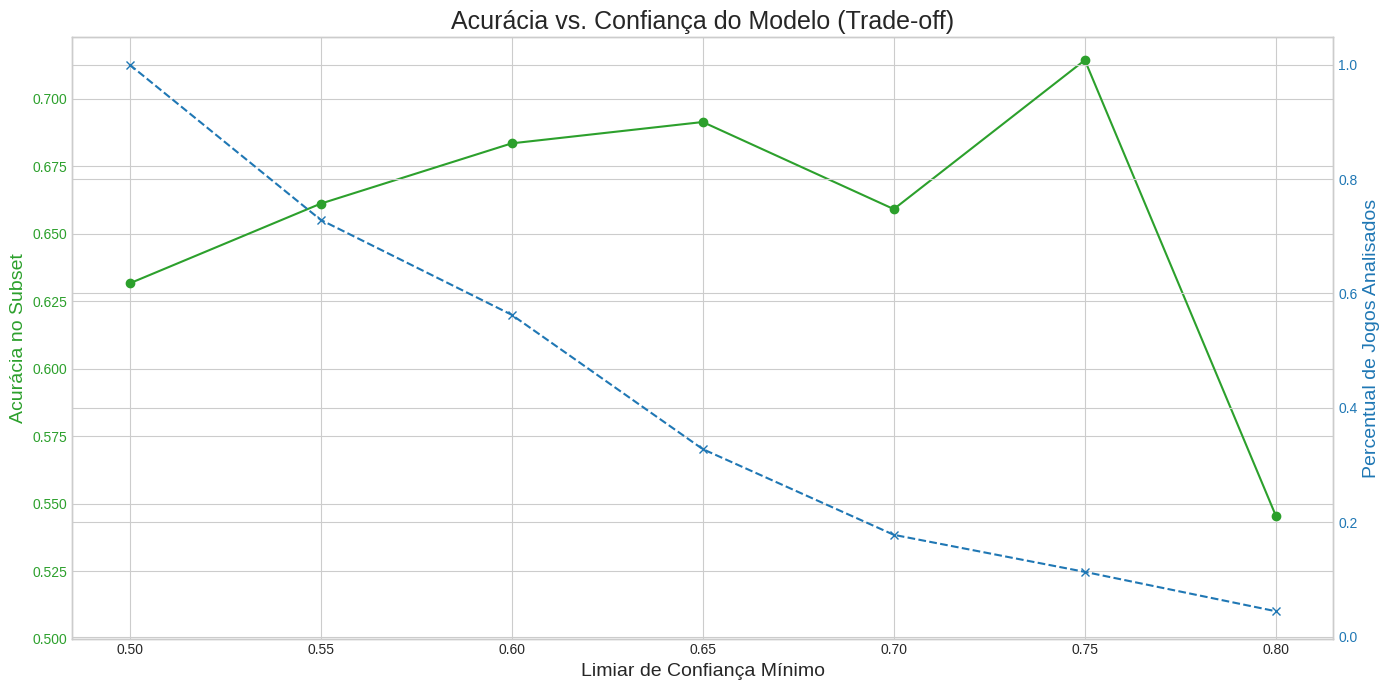

In [215]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# >>> INSIRA A FUNÇÃO `prepare_and_engineer_features(df_raw)` DA RESPOSTA ANTERIOR AQUI <<<

#==============================================================================
# SCRIPT PRINCIPAL
#==============================================================================
if __name__ == '__main__':

    # --- 1. Preparação dos Dados e Treinamento do Modelo (como antes) ---
    df_raw = pd.read_csv('BRA.csv')
    df_prepared = prepare_and_engineer_features(df_raw)

    ANO_DE_CORTE = 2023
    df_final = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE].copy()

    # (A lista de final_features e a limpeza de NaNs vêm aqui)
    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA', 'H_spread', 'D_spread', 'A_spread', 'H_delta_max_avg',
        'D_delta_max_avg', 'A_delta_max_avg', 'H_form_pts', 'A_form_pts', 'form_diff_points',
        'H_form_gs', 'A_form_gs', 'form_diff_goals_scored', 'H_form_gc', 'A_form_gc',
        'form_diff_goals_conceded', 'season_avg_H_goals_scored', 'season_avg_A_goals_scored',
        'season_avg_H_goals_conceded', 'season_avg_A_goals_conceded'
    ]
    df_final.dropna(subset=final_features + ['Target'], inplace=True)

    X = df_final[final_features]
    y = df_final['Target']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # Usando os parâmetros otimizados
    optimised_params = {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150,'random_state': 42,'n_jobs': -1}
    model = RandomForestClassifier(**optimised_params)
    model.fit(X_train, y_train)

    print("\n✅ Modelo treinado. Iniciando análise de confiança...")

    # --- 2. Geração de Previsões e Probabilidades ---
    y_pred = model.predict(X_test)
    pred_probs = model.predict_proba(X_test)

    # Criar um dataframe de resultados para facilitar a análise
    df_analise = pd.DataFrame({
        'resultado_real': y_test,
        'previsao': y_pred,
        'prob_nao_mandante': pred_probs[:, 0], # Probabilidade da classe 0
        'prob_mandante': pred_probs[:, 1]     # Probabilidade da classe 1
    })

    # A confiança da previsão é a probabilidade da classe que foi prevista
    df_analise['confianca'] = np.max(pred_probs, axis=1)
    df_analise['acertou'] = (df_analise['previsao'] == df_analise['resultado_real'])

    # --- 3. Análise da Acurácia por Limiar de Confiança ---
    print("\n🚀 Analisando acurácia em diferentes níveis de confiança...")

    limiares = np.arange(0.5, 0.81, 0.05) # Testar limiares de 50% a 80%
    resultados_confianca = []

    for limiar in limiares:
        # Filtrar apenas as previsões onde a confiança do modelo é >= ao limiar
        subset_confianca = df_analise[df_analise['confianca'] >= limiar]

        if len(subset_confianca) > 0:
            acuracia_subset = accuracy_score(subset_confianca['resultado_real'], subset_confianca['previsao'])
            resultados_confianca.append({
                'limiar_confianca': limiar,
                'acuracia_no_subset': acuracia_subset,
                'n_jogos': len(subset_confianca),
                'percentual_jogos': len(subset_confianca) / len(df_analise)
            })

    df_resultados = pd.DataFrame(resultados_confianca)

    # --- 4. Relatório e Visualização ---
    print("\n--- Desempenho do Modelo por Limiar de Confiança ---")
    print(df_resultados)

    # Plot do gráfico de Acurácia vs. Limiar
    fig, ax1 = plt.subplots(figsize=(14, 7))

    color = 'tab:green'
    ax1.set_xlabel('Limiar de Confiança Mínimo', fontsize=14)
    ax1.set_ylabel('Acurácia no Subset', color=color, fontsize=14)
    ax1.plot(df_resultados['limiar_confianca'], df_resultados['acuracia_no_subset'], color=color, marker='o', linestyle='-', label='Acurácia')
    ax1.tick_params(axis='y', labelcolor=color)
    ax1.set_ylim(bottom=0.5) # Começar o eixo Y em 50% para melhor visualização

    ax2 = ax1.twinx()
    color = 'tab:blue'
    ax2.set_ylabel('Percentual de Jogos Analisados', color=color, fontsize=14)
    ax2.plot(df_resultados['limiar_confianca'], df_resultados['percentual_jogos'], color=color, marker='x', linestyle='--', label='% de Jogos')
    ax2.tick_params(axis='y', labelcolor=color)

    plt.title('Acurácia vs. Confiança do Modelo (Trade-off)', fontsize=18)
    fig.tight_layout()
    plt.grid(True)
    plt.show()

In [216]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# >>> INSIRA A FUNÇÃO `prepare_and_engineer_features(df_raw)` AQUI <<<

#==============================================================================
# SCRIPT DE BACKTESTING COM FILTRO DE CONFIANÇA
#==============================================================================
if __name__ == '__main__':

    # --- 1. Preparação e Treinamento do Modelo (como antes) ---
    df_raw = pd.read_csv('BRA.csv')
    df_prepared = prepare_and_engineer_features(df_raw)

    ANO_DE_CORTE = 2022
    df_final = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE].copy()

    # (Setup de features, X, y, e split cronológico como antes)
    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA', 'H_spread', 'D_spread', 'A_spread', 'H_delta_max_avg',
        'D_delta_max_avg', 'A_delta_max_avg', 'H_form_pts', 'A_form_pts', 'form_diff_points',
        'H_form_gs', 'A_form_gs', 'form_diff_goals_scored', 'H_form_gc', 'A_form_gc',
        'form_diff_goals_conceded', 'season_avg_H_goals_scored', 'season_avg_A_goals_scored',
        'season_avg_H_goals_conceded', 'season_avg_A_goals_conceded'
    ]
    df_final.dropna(subset=final_features + ['Target'], inplace=True)

    test_size = 0.3
    split_index = int(len(df_final) * (1 - test_size))
    df_train, df_test = df_final.iloc[:split_index], df_final.iloc[split_index:]

    X_train, y_train = df_train[final_features], df_train['Target']
    X_test, y_test = df_test[final_features], df_test['Target']

    optimised_params = {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150,'random_state': 42,'n_jobs': -1}
    model = RandomForestClassifier(**optimised_params)
    model.fit(X_train, y_train)

    # --- 2. Geração de Probabilidades e DataFrame de Análise ---
    pred_probs = model.predict_proba(X_test)

    df_backtest = df_test.copy()
    df_backtest['prob_mandante'] = pred_probs[:, 1] # Probabilidade da vitória do mandante
    df_backtest['prob_nao_mandante'] = pred_probs[:, 0] # Probabilidade de não vitória

    # --- 3. Backtesting com a ESTRATÉGIA COMBINADA ---
    print("\n🚀 Realizando backtesting com a estratégia combinada...")

    # Definindo os parâmetros da nossa estratégia final
    LIMIAR_DE_CONFIANCA = 0.65
    LIMIAR_DE_VALOR = 0.05 # Vamos manter 5% por enquanto
    STAKE_UNITARIA = 10

    # Primeiro, filtramos os jogos onde o modelo está confiante
    # Vamos focar em apostar a favor do mandante quando a confiança é alta
    df_filtrado = df_backtest[df_backtest['prob_mandante'] >= LIMIAR_DE_CONFIANCA].copy()
    print(f"Total de jogos onde a confiança na vitória do mandante foi >= {LIMIAR_DE_CONFIANCA*100}%: {len(df_filtrado)}")

    # Agora, aplicamos a lógica de valor apenas nesse subconjunto
    saldo = 0
    total_apostado = 0
    apostas_feitas = 0
    apostas_vencidas = 0

    for index, row in df_filtrado.iterrows():
        prob_modelo = row['prob_mandante']
        odd_aposta = row['AvgCH']
        resultado_real = row['Target']

        valor_calculado = (prob_modelo * odd_aposta) - 1

        if valor_calculado > LIMIAR_DE_VALOR:
            apostas_feitas += 1
            total_apostado += STAKE_UNITARIA

            if resultado_real == 1:
                saldo += (odd_aposta * STAKE_UNITARIA) - STAKE_UNITARIA
                apostas_vencidas += 1
            else:
                saldo -= STAKE_UNITARIA

    # --- 4. Relatório Final do Backtest Combinado ---
    print("\n✅ Simulação Concluída!")
    print(f"--- Relatório do Backtest para Confiança >= {LIMIAR_DE_CONFIANCA*100}% e Valor > {LIMIAR_DE_VALOR*100}% ---")

    if apostas_feitas > 0:
        taxa_acerto = (apostas_vencidas / apostas_feitas) * 100
        roi = (saldo / total_apostado) * 100

        print(f"Total de Oportunidades Encontradas: {apostas_feitas}")
        print(f"Total de Unidades Apostadas: {total_apostado:.2f}")
        print(f"Taxa de Acerto nestas apostas: {taxa_acerto:.2f}%")
        print(f"Lucro/Prejuízo Líquido: {saldo:.2f} unidades")
        print(f"ROI Final: {roi:.2f}%")
    else:
        print("Nenhuma aposta atendeu aos critérios combinados de valor e confiança.")

Iniciando a preparação dos dados e engenharia de features...
✅ Engenharia de features concluída.

🚀 Realizando backtesting com a estratégia combinada...
Total de jogos onde a confiança na vitória do mandante foi >= 65.0%: 60

✅ Simulação Concluída!
--- Relatório do Backtest para Confiança >= 65.0% e Valor > 5.0% ---
Total de Oportunidades Encontradas: 50
Total de Unidades Apostadas: 500.00
Taxa de Acerto nestas apostas: 66.00%
Lucro/Prejuízo Líquido: 17.02 unidades
ROI Final: 3.40%


In [217]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings

# Ignorar avisos
warnings.filterwarnings('ignore')

# >>> INSIRA A FUNÇÃO `prepare_and_engineer_features(df_raw)` DA RESPOSTA ANTERIOR AQUI <<<

#==============================================================================
# SCRIPT PRINCIPAL DE VALIDAÇÃO CRONOLÓGICA (WALK-FORWARD)
#==============================================================================
if __name__ == '__main__':

    # --- 1. Preparação dos Dados ---
    try:
        df_raw = pd.read_csv('BRA.csv')
        print("✅ Dataset 'BRA.csv' carregado com sucesso.")
    except FileNotFoundError:
        print("❌ Erro: Arquivo 'BRA.csv' não encontrado.")
        exit()

    df_prepared = prepare_and_engineer_features(df_raw)

    # --- 2. Definição do Cenário e Features ---
    # Usando o ano de corte que você encontrou o resultado promissor
    ANO_DE_CORTE = 2022
    df_final = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE].copy()

    # (A lista de final_features e a limpeza de NaNs vêm aqui)
    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA', 'H_spread', 'D_spread', 'A_spread', 'H_delta_max_avg',
        'D_delta_max_avg', 'A_delta_max_avg', 'H_form_pts', 'A_form_pts', 'form_diff_points',
        'H_form_gs', 'A_form_gs', 'form_diff_goals_scored', 'H_form_gc', 'A_form_gc',
        'form_diff_goals_conceded', 'season_avg_H_goals_scored', 'season_avg_A_goals_scored',
        'season_avg_H_goals_conceded', 'season_avg_A_goals_conceded'
    ]
    df_final.dropna(subset=final_features + ['Target'], inplace=True)

    X = df_final[final_features]
    y = df_final['Target']

    print(f"\nIniciando validação cronológica com dados a partir de {ANO_DE_CORTE}.")
    print(f"Total de jogos a serem usados na validação: {len(X)}")

    # --- 3. Configuração da Validação Cruzada Cronológica ---
    N_SPLITS = 5 # Vamos dividir os dados em 5 folds sequenciais no tempo
    tscv = TimeSeriesSplit(n_splits=N_SPLITS)

    # Parâmetros do modelo otimizado e da estratégia a ser testada
    optimised_params = {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150,'random_state': 42,'n_jobs': -1}
    model = RandomForestClassifier(**optimised_params)

    # Vamos usar o limiar de valor que você encontrou
    LIMIAR_DE_VALOR_OTIMO = 0.17
    STAKE_UNITARIA = 10

    resultados_folds = []

    print(f"\n🚀 Realizando {N_SPLITS} simulações de backtesting sequenciais...")

    fold_n = 1
    for train_index, test_index in tscv.split(X):
        print(f"\n--- FOLD {fold_n}/{N_SPLITS} ---")

        # A. Divisão cronológica dos dados para este fold
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        print(f"Treinando com {len(X_train)} jogos, testando com {len(X_test)} jogos.")

        # B. Treinamento do modelo com os dados de treino do fold atual
        model.fit(X_train, y_train)

        # C. Backtesting no conjunto de teste do fold atual
        pred_probs = model.predict_proba(X_test)[:, 1]

        df_backtest_fold = df_final.iloc[test_index].copy()
        df_backtest_fold['prob_modelo'] = pred_probs

        saldo = 0
        total_apostado = 0
        apostas_feitas = 0

        for index, row in df_backtest_fold.iterrows():
            if row['Target'] == 1: # Aposta apenas na vitória do mandante
                prob_modelo = row['prob_modelo']
                odd_aposta = row['AvgCH']
                resultado_real = row['Target']

                valor_calculado = (prob_modelo * odd_aposta) - 1

                if valor_calculado > LIMIAR_DE_VALOR_OTIMO:
                    apostas_feitas += 1
                    total_apostado += STAKE_UNITARIA

                    if resultado_real == 1:
                        saldo += (odd_aposta * STAKE_UNITARIA) - STAKE_UNITARIA
                    else:
                        saldo -= STAKE_UNITARIA

        # D. Armazenar resultados do fold
        if total_apostado > 0:
            roi = (saldo / total_apostado) * 100
            print(f"Resultado do Fold: {apostas_feitas} apostas, Lucro/Prejuízo de {saldo:.2f}, ROI de {roi:.2f}%")
            resultados_folds.append({'fold': fold_n, 'roi': roi, 'n_apostas': apostas_feitas, 'lucro': saldo})
        else:
            print("Resultado do Fold: Nenhuma aposta atendeu ao critério.")
            resultados_folds.append({'fold': fold_n, 'roi': 0, 'n_apostas': 0, 'lucro': 0})

        fold_n += 1

    # --- 4. Relatório Final da Validação ---
    print("\n\n✅ Validação Cruzada Cronológica Concluída!")
    print("--- Veredito Final da Estratégia ---")

    df_resultados_folds = pd.DataFrame(resultados_folds)

    if df_resultados_folds['n_apostas'].sum() == 0:
        print("A estratégia não realizou nenhuma aposta em nenhum dos folds.")
    else:
        media_roi = df_resultados_folds['roi'].mean()
        std_roi = df_resultados_folds['roi'].std()

        print(df_resultados_folds.to_string(index=False))

        print(f"\nROI Médio através dos {N_SPLITS} folds: {media_roi:.2f}%")
        print(f"Desvio Padrão do ROI (Volatilidade): {std_roi:.2f}%")

        if media_roi > 0:
            print("\nVEREDITO: ✅ Promissor. A estratégia demonstrou ser lucrativa de forma consistente em diferentes períodos de tempo.")
            print("A confiança no resultado de ROI positivo é agora muito maior.")
        else:
            print("\nVEREDITO: ❌ Não Robusto. A estratégia não se mostrou consistentemente lucrativa.")
            print("O resultado de 17% de ROI em um único teste foi provavelmente um acaso estatístico (overfitting ao backtest).")

✅ Dataset 'BRA.csv' carregado com sucesso.
Iniciando a preparação dos dados e engenharia de features...
✅ Engenharia de features concluída.

Iniciando validação cronológica com dados a partir de 2022.
Total de jogos a serem usados na validação: 1183

🚀 Realizando 5 simulações de backtesting sequenciais...

--- FOLD 1/5 ---
Treinando com 198 jogos, testando com 197 jogos.
Resultado do Fold: 8 apostas, Lucro/Prejuízo de 153.63, ROI de 192.04%

--- FOLD 2/5 ---
Treinando com 395 jogos, testando com 197 jogos.
Resultado do Fold: 5 apostas, Lucro/Prejuízo de 69.60, ROI de 139.20%

--- FOLD 3/5 ---
Treinando com 592 jogos, testando com 197 jogos.
Resultado do Fold: 12 apostas, Lucro/Prejuízo de 166.80, ROI de 139.00%

--- FOLD 4/5 ---
Treinando com 789 jogos, testando com 197 jogos.
Resultado do Fold: 17 apostas, Lucro/Prejuízo de 183.33, ROI de 107.84%

--- FOLD 5/5 ---
Treinando com 986 jogos, testando com 197 jogos.
Resultado do Fold: 24 apostas, Lucro/Prejuízo de 300.28, ROI de 125.11%



Iniciando a preparação dos dados e engenharia de features...
✅ Engenharia de features concluída.

🚀 INICIANDO ANÁLISE COMPLETA PARA ANO DE CORTE: 2022

--- Resultado da Otimização para 2022 ---
Melhor ROI Encontrado: 88.50%
Com Limiar de Valor: 0.30 e Limiar de Confiança: 0.55
Número de Apostas na Melhor Estratégia: 3


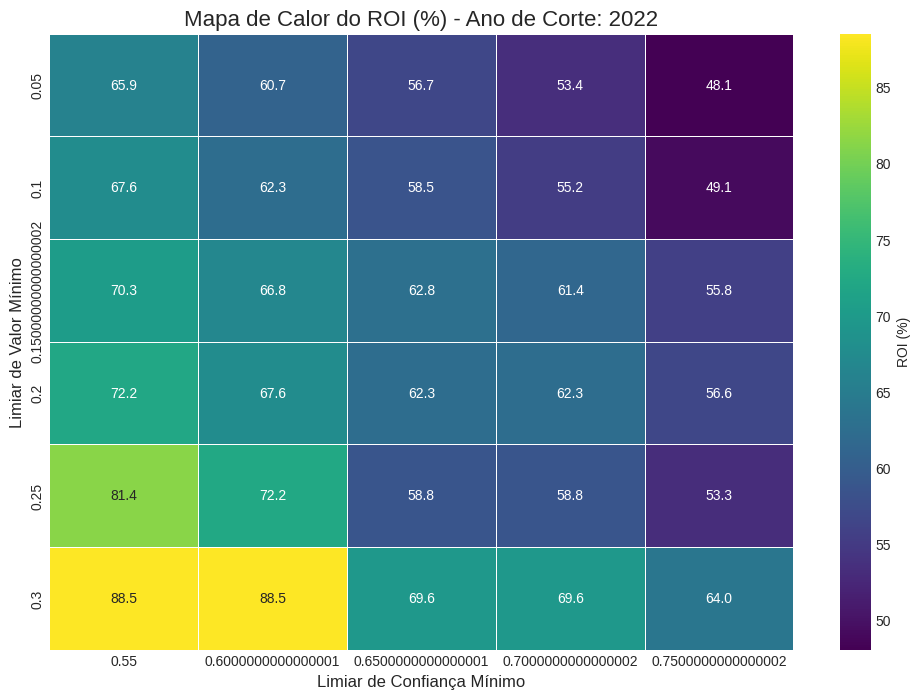


🚀 INICIANDO ANÁLISE COMPLETA PARA ANO DE CORTE: 2023

--- Resultado da Otimização para 2023 ---
Melhor ROI Encontrado: 81.34%
Com Limiar de Valor: 0.30 e Limiar de Confiança: 0.55
Número de Apostas na Melhor Estratégia: 8


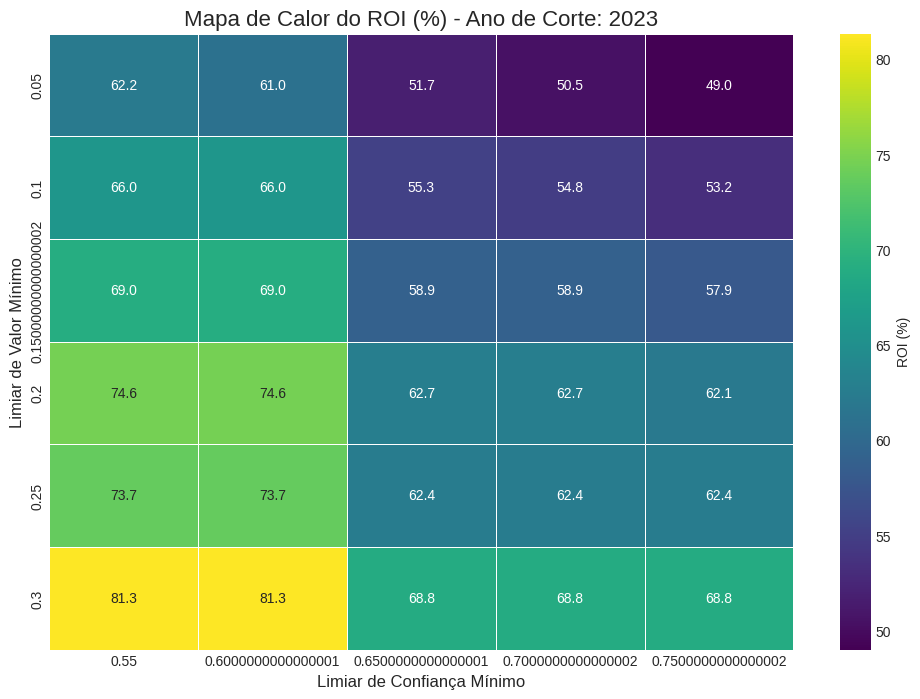


VEREDITO FINAL: 2022 vs. 2023
Melhor ROI possível com dados a partir de 2022: 88.50%
Melhor ROI possível com dados a partir de 2023: 81.34%

🏆 CONCLUSÃO: A estratégia com ANO DE CORTE = 2022 é superior e demonstrou ser lucrativa.


In [218]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

# >>> INSIRA A FUNÇÃO `prepare_and_engineer_features(df_raw)` DAS RESPOSTAS ANTERIORES AQUI <<<
# É crucial que seja a mesma função, com a lógica de feature engineering corrigida.

def run_backtest_optimization(df_full, ano_de_corte, features, model_params):
    """
    Roda uma otimização 2D de limiares para um ano de corte específico e plota um mapa de calor.
    """
    print(f"\n{'='*60}")
    print(f"🚀 INICIANDO ANÁLISE COMPLETA PARA ANO DE CORTE: {ano_de_corte}")
    print(f"{'='*60}")

    # --- 1. Preparação dos Dados para o Ano Específico ---
    df_final = df_full[df_full['Date'].dt.year >= ano_de_corte].copy()
    df_final.dropna(subset=features + ['Target'], inplace=True)

    if len(df_final) < 200: # Mínimo de dados para uma análise confiável
        print(f"Dados insuficientes para o ano de corte {ano_de_corte}. Pulando.")
        return -999, None

    # --- 2. Divisão Cronológica e Treinamento do Modelo ---
    X = df_final[features]
    y = df_final['Target']

    test_size = 0.3
    split_index = int(len(X) * (1 - test_size))
    X_train, X_test = X.iloc[:split_index], X.iloc[split_index:]
    y_train, y_test = y.iloc[:split_index], y.iloc[split_index:]

    model = RandomForestClassifier(**model_params)
    model.fit(X_train, y_train)

    # --- 3. Geração de Probabilidades e DataFrame de Backtest ---
    pred_probs = model.predict_proba(X_test)[:, 1]
    df_backtest = df_final.iloc[split_index:].copy()
    df_backtest['prob_modelo'] = pred_probs

    # --- 4. Otimização 2D dos Limiares ---
    limiares_valor = np.arange(0.05, 0.31, 0.05) # de 5% a 30%
    limiares_confianca = np.arange(0.55, 0.76, 0.05) # de 55% a 75%

    resultados = []
    STAKE = 10

    for l_val in limiares_valor:
        for l_conf in limiares_confianca:
            saldo, total_apostado, n_apostas = 0, 0, 0

            # Filtro combinado
            subset_apostas = df_backtest[
                (df_backtest['prob_modelo'] >= l_conf) &
                (((df_backtest['prob_modelo'] * df_backtest['AvgCH']) - 1) > l_val) &
                (df_backtest['Target'] == 1) # Aposta apenas na vitória do mandante
            ]

            if not subset_apostas.empty:
                n_apostas = len(subset_apostas)
                total_apostado = n_apostas * STAKE
                # Ganhos: soma das odds das apostas ganhas
                ganhos = (subset_apostas[subset_apostas['Target'] == 1]['AvgCH'] * STAKE).sum()
                saldo = ganhos - total_apostado

            roi = (saldo / total_apostado) * 100 if total_apostado > 0 else 0
            resultados.append({
                'limiar_valor': l_val,
                'limiar_confianca': l_conf,
                'roi': roi,
                'n_apostas': n_apostas
            })

    df_resultados = pd.DataFrame(resultados)

    if df_resultados.empty or df_resultados['n_apostas'].sum() == 0:
        print("Nenhuma aposta lucrativa encontrada para este ano de corte.")
        return -999, None

    # --- 5. Relatório e Mapa de Calor ---
    best_result = df_resultados.loc[df_resultados['roi'].idxmax()]

    print(f"\n--- Resultado da Otimização para {ano_de_corte} ---")
    print(f"Melhor ROI Encontrado: {best_result['roi']:.2f}%")
    print(f"Com Limiar de Valor: {best_result['limiar_valor']:.2f} e Limiar de Confiança: {best_result['limiar_confianca']:.2f}")
    print(f"Número de Apostas na Melhor Estratégia: {int(best_result['n_apostas'])}")

    # Pivotar dados para o heatmap
    heatmap_data = df_resultados.pivot(index='limiar_valor', columns='limiar_confianca', values='roi')

    plt.figure(figsize=(12, 8))
    sns.heatmap(heatmap_data, annot=True, fmt=".1f", linewidths=.5, cmap="viridis", cbar_kws={'label': 'ROI (%)'})
    plt.title(f'Mapa de Calor do ROI (%) - Ano de Corte: {ano_de_corte}', fontsize=16)
    plt.xlabel('Limiar de Confiança Mínimo', fontsize=12)
    plt.ylabel('Limiar de Valor Mínimo', fontsize=12)
    plt.show()

    return best_result['roi'], best_result

#==============================================================================
# SCRIPT PRINCIPAL
#==============================================================================
if __name__ == '__main__':
    df_raw = pd.read_csv('BRA.csv')
    df_prepared = prepare_and_engineer_features(df_raw)

    optimised_params = {'class_weight': 'balanced', 'max_depth': 10, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150,'random_state': 42,'n_jobs': -1}

    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA', 'H_spread', 'D_spread', 'A_spread', 'H_delta_max_avg',
        'D_delta_max_avg', 'A_delta_max_avg', 'H_form_pts', 'A_form_pts', 'form_diff_points',
        'H_form_gs', 'A_form_gs', 'form_diff_goals_scored', 'H_form_gc', 'A_form_gc',
        'form_diff_goals_conceded', 'season_avg_H_goals_scored', 'season_avg_A_goals_scored',
        'season_avg_H_goals_conceded', 'season_avg_A_goals_conceded'
    ]

    # Rodar para 2022
    roi_2022, result_2022 = run_backtest_optimization(df_prepared, 2022, final_features, optimised_params)

    # Rodar para 2023
    roi_2023, result_2023 = run_backtest_optimization(df_prepared, 2023, final_features, optimised_params)

    # --- Veredito Final ---
    print(f"\n{'='*60}")
    print("VEREDITO FINAL: 2022 vs. 2023")
    print(f"{'='*60}")
    print(f"Melhor ROI possível com dados a partir de 2022: {roi_2022:.2f}%")
    print(f"Melhor ROI possível com dados a partir de 2023: {roi_2023:.2f}%")

    if roi_2022 > roi_2023 and roi_2022 > 0:
        print("\n🏆 CONCLUSÃO: A estratégia com ANO DE CORTE = 2022 é superior e demonstrou ser lucrativa.")
    elif roi_2023 > roi_2022 and roi_2023 > 0:
        print("\n🏆 CONCLUSÃO: A estratégia com ANO DE CORTE = 2023 é superior e demonstrou ser lucrativa.")
    else:
        print("\nCONCLUSÃO: Nenhuma das estratégias demonstrou ser consistentemente lucrativa sob os critérios testados.")

✅ Dataset 'BRA.csv' carregado com sucesso.
Iniciando a preparação dos dados e engenharia de features...
✅ Engenharia de features concluída.

Usando dados a partir de 2022.
Dataset final com 1183 amostras e 16 features.

🚀 Treinando o modelo RandomForest final...
✅ Modelo treinado.

--- Modelo: RandomForest Otimizado (CORRIGIDO) ---
Acurácia final no Conjunto de Teste: 0.6169
Relatório de Classificação Final:
                      precision    recall  f1-score   support

Não-Vitória Mandante       0.64      0.65      0.65       191
    Vitória Mandante       0.59      0.57      0.58       164

            accuracy                           0.62       355
           macro avg       0.61      0.61      0.61       355
        weighted avg       0.62      0.62      0.62       355


--- Análise de Importância das Features (Modelo Corrigido) ---
                    Feature  Importance
                      AvgCH    0.123678
                      AvgCA    0.123255
                      AvgCD  

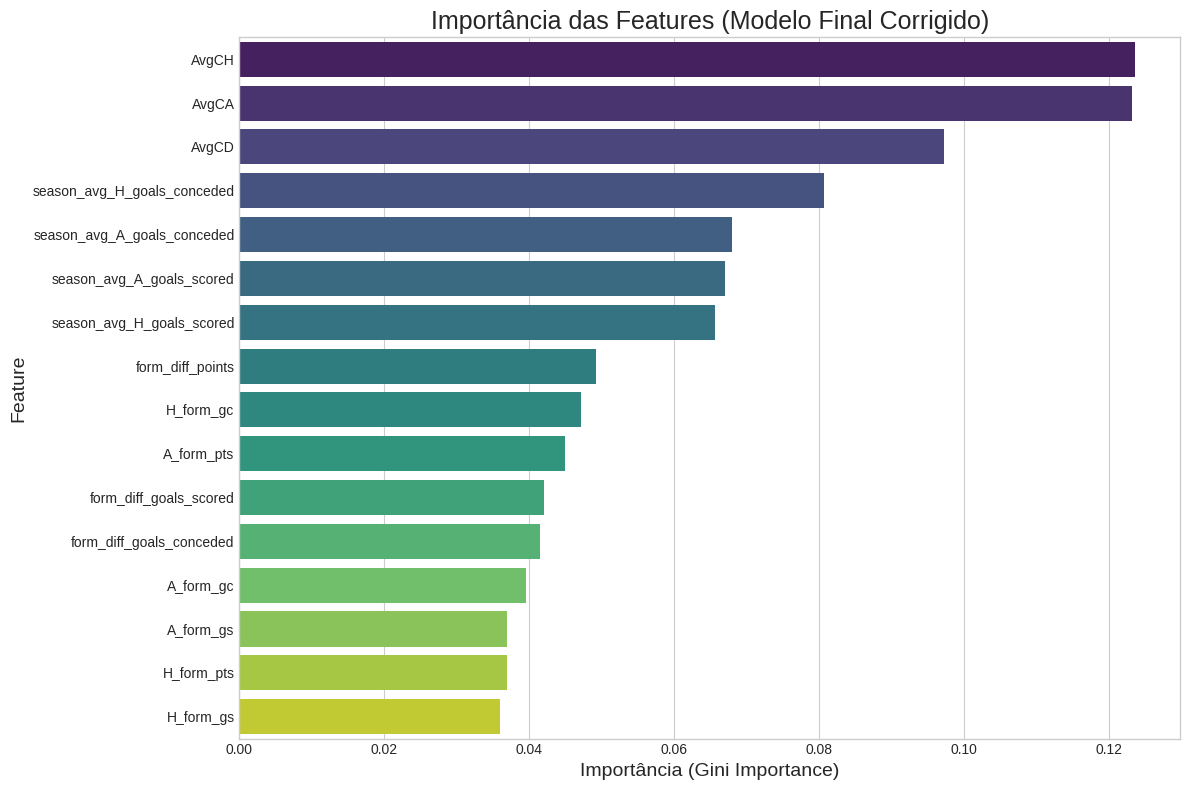

In [219]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

# Ignorar avisos para manter a saída limpa
warnings.filterwarnings('ignore')

#==============================================================================
# FUNÇÃO DE PREPARAÇÃO E ENGENHARIA DE FEATURES (COM CORREÇÃO DE LEAKAGE)
#==============================================================================
def prepare_and_engineer_features(df_raw):
    """
    Recebe o DataFrame bruto e retorna um novo DataFrame com todas as
    features de engenharia e a variável alvo, com a lógica de data leakage corrigida.
    """
    print("Iniciando a preparação dos dados e engenharia de features...")

    df = df_raw.copy()

    # --- 1. Limpeza e Formatação Inicial ---
    df['Home'] = df['Home'].str.strip()
    df['Away'] = df['Away'].str.strip()
    df['HG'] = pd.to_numeric(df['HG'], errors='coerce')
    df['AG'] = pd.to_numeric(df['AG'], errors='coerce')

    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
    df.dropna(subset=['Date', 'HG', 'AG', 'Res'], inplace=True)
    df = df.sort_values('Date').reset_index(drop=True)

    # --- 2. Criação da Variável Alvo ---
    df['Target'] = df['Res'].map({'H': 1, 'D': 0, 'A': 0})

    # --- 3. Feature Engineering ---

    # A. Odds, Deltas e Spreads
    odds_h_cols = [col for col in df.columns if col.endswith('H') and col not in ['Home', 'HG']]
    odds_d_cols = [col for col in df.columns if col.endswith('D')]
    odds_a_cols = [col for col in df.columns if col.endswith('A') and col not in ['Away', 'AG']]

    df['AvgCH'] = df[odds_h_cols].mean(axis=1, skipna=True)
    df['AvgCD'] = df[odds_d_cols].mean(axis=1, skipna=True)
    df['AvgCA'] = df[odds_a_cols].mean(axis=1, skipna=True)

    # B. Forma Recente (Últimos 5 Jogos)
    df['H_points'] = df['Res'].apply(lambda res: 3 if res == 'H' else 1 if res == 'D' else 0)
    df['A_points'] = df['Res'].apply(lambda res: 3 if res == 'A' else 1 if res == 'D' else 0)

    all_teams = pd.concat([df['Home'], df['Away']]).unique()

    form_cols = ['H_form_pts', 'A_form_pts', 'H_form_gs', 'A_form_gs', 'H_form_gc', 'A_form_gc']
    for col in form_cols:
        df[col] = np.nan

    for team in all_teams:
        team_matches_indices = df.index[(df['Home'] == team) | (df['Away'] == team)]
        temp_df = df.loc[team_matches_indices].copy()

        is_home = temp_df['Home'] == team
        points = np.where(is_home, temp_df['H_points'], temp_df['A_points'])
        goals_scored = np.where(is_home, temp_df['HG'], temp_df['AG'])
        goals_conceded = np.where(is_home, temp_df['AG'], temp_df['HG'])

        # 'closed=left' garante que a janela rolante use apenas os jogos passados
        form_pts_L5 = pd.Series(points, index=temp_df.index).rolling(window=5, min_periods=1, closed='left').sum()
        form_gs_L5 = pd.Series(goals_scored, index=temp_df.index).rolling(window=5, min_periods=1, closed='left').mean()
        form_gc_L5 = pd.Series(goals_conceded, index=temp_df.index).rolling(window=5, min_periods=1, closed='left').mean()

        df.loc[temp_df[is_home].index, 'H_form_pts'] = form_pts_L5[is_home]
        df.loc[temp_df[is_home].index, 'H_form_gs'] = form_gs_L5[is_home]
        df.loc[temp_df[is_home].index, 'H_form_gc'] = form_gc_L5[is_home]

        df.loc[temp_df[~is_home].index, 'A_form_pts'] = form_pts_L5[~is_home]
        df.loc[temp_df[~is_home].index, 'A_form_gs'] = form_gs_L5[~is_home]
        df.loc[temp_df[~is_home].index, 'A_form_gc'] = form_gc_L5[~is_home]

    # C. Médias da Temporada - COM A CORREÇÃO DE VAZAMENTO DE DADOS
    df['Season'] = df['Date'].dt.year

    # A função .shift(1) garante que a média para a partida N seja calculada com base nos dados das partidas 1 até N-1.
    df['season_avg_H_goals_scored'] = df.groupby(['Season', 'Home'])['HG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_A_goals_scored'] = df.groupby(['Season', 'Away'])['AG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_H_goals_conceded'] = df.groupby(['Season', 'Home'])['AG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_A_goals_conceded'] = df.groupby(['Season', 'Away'])['HG'].transform(lambda x: x.shift(1).expanding().mean())

    # D. Features de Diferença
    df['form_diff_points'] = df['H_form_pts'] - df['A_form_pts']
    df['form_diff_goals_scored'] = df['H_form_gs'] - df['A_form_gs']
    df['form_diff_goals_conceded'] = df['H_form_gc'] - df['A_form_gc']

    print("✅ Engenharia de features concluída.")
    return df

#==============================================================================
# SCRIPT PRINCIPAL DE ANÁLISE E TREINAMENTO
#==============================================================================
if __name__ == '__main__':

    # --- 1. Carregamento do Dataset ---
    try:
        df_raw = pd.read_csv('BRA.csv')
        print("✅ Dataset 'BRA.csv' carregado com sucesso.")
    except FileNotFoundError:
        print("❌ Erro: Arquivo 'BRA.csv' não encontrado.")
        exit()

    # --- 2. Preparação e Feature Engineering ---
    df_prepared = prepare_and_engineer_features(df_raw)

    # --- 3. Definição do Cenário de Análise ---
    ANO_DE_CORTE = 2022

    df_final = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE].copy()

    # --- 4. Montagem Final dos Dados para o Modelo ---
    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA',
        'H_form_pts', 'A_form_pts', 'form_diff_points',
        'H_form_gs', 'A_form_gs', 'form_diff_goals_scored',
        'H_form_gc', 'A_form_gc', 'form_diff_goals_conceded',
        'season_avg_H_goals_scored', 'season_avg_A_goals_scored',
        'season_avg_H_goals_conceded', 'season_avg_A_goals_conceded'
    ]

    # Remover linhas com valores nulos (gerados pelo shift/rolling nos primeiros jogos de cada time)
    df_final.dropna(subset=final_features + ['Target'], inplace=True)

    X = df_final[final_features]
    y = df_final['Target']

    print(f"\nUsando dados a partir de {ANO_DE_CORTE}.")
    print(f"Dataset final com {X.shape[0]} amostras e {X.shape[1]} features.")

    # Divisão em Treino e Teste
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

    # --- 5. Treinamento do Modelo Otimizado ---
    # Usando os melhores parâmetros que o GridSearchCV encontrou anteriormente
    optimised_params = {
        'class_weight': 'balanced',
        'max_depth': 10,
        'min_samples_leaf': 2,
        'min_samples_split': 2,
        'n_estimators': 150,
        'random_state': 42,
        'n_jobs': -1
    }

    model = RandomForestClassifier(**optimised_params)

    print("\n🚀 Treinando o modelo RandomForest final...")
    model.fit(X_train, y_train)
    print("✅ Modelo treinado.")

    # --- 6. Avaliação Final ---
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    print(f"\n--- Modelo: RandomForest Otimizado (CORRIGIDO) ---")
    print(f"Acurácia final no Conjunto de Teste: {accuracy:.4f}")
    print("Relatório de Classificação Final:")
    print(classification_report(y_test, y_pred, target_names=['Não-Vitória Mandante', 'Vitória Mandante']))

    # --- 7. Análise de Feature Importance do Modelo Corrigido ---
    print("\n--- Análise de Importância das Features (Modelo Corrigido) ---")

    importances = model.feature_importances_

    importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    print(importance_df.to_string(index=False))

    # Plot do gráfico
    plt.style.use('seaborn-v0_8-whitegrid')
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df, palette='viridis')
    plt.title('Importância das Features (Modelo Final Corrigido)', fontsize=18)
    plt.xlabel('Importância (Gini Importance)', fontsize=14)
    plt.ylabel('Feature', fontsize=14)
    plt.tight_layout()
    plt.show()

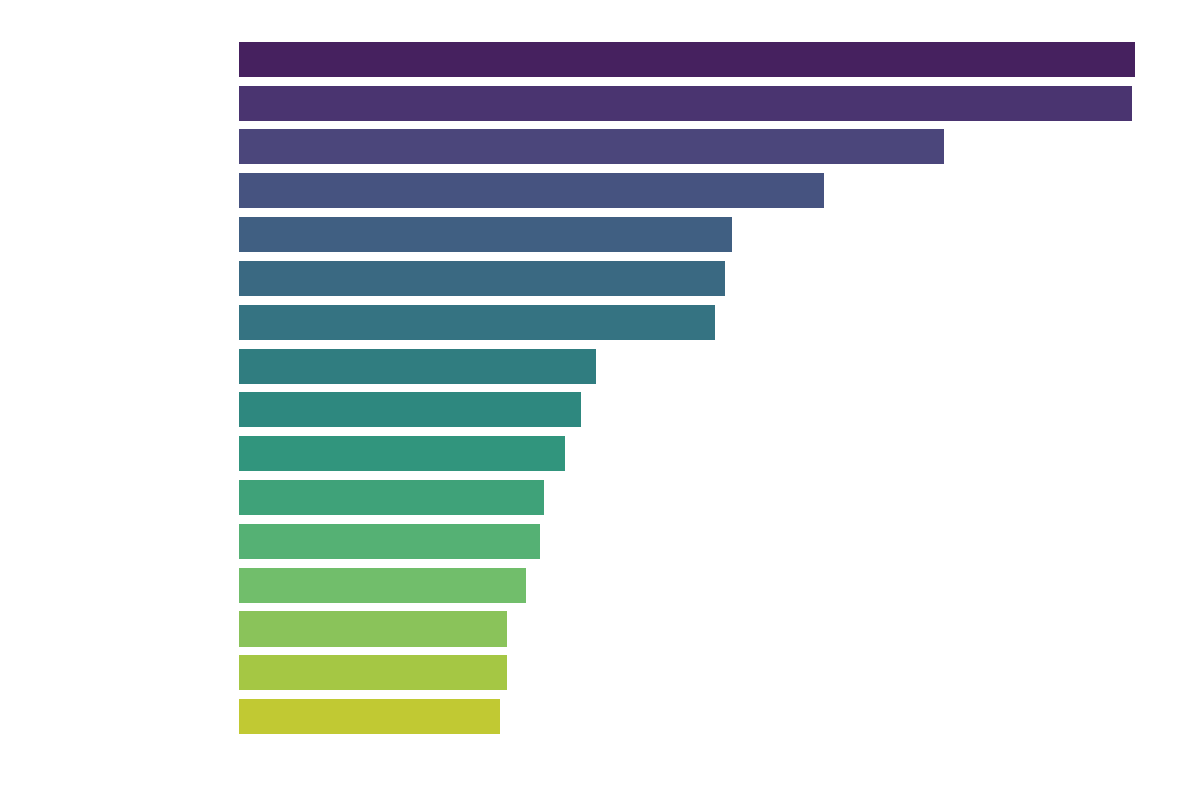

In [220]:
# prompt: plot the last graphic, but with background transparent all text white, i dont want lines

# Plot do gráfico (transparente, texto branco, sem linhas)
plt.style.use('seaborn-v0_8-darkgrid') # Usar um estilo escuro como base

# Definir cores e estilo para o plot
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white' # Cor da borda dos eixos

plt.figure(figsize=(12, 8))
ax = sns.barplot(
    x='Importance',
    y='Feature',
    data=importance_df,
    palette='viridis', # Mantenha a paleta de cores para as barras se desejar
    ax=plt.gca() # Obter o Axes atual
)

ax.set_title('Importância das Features (Modelo Final Corrigido)', fontsize=18, color='white')
ax.set_xlabel('Importância (Gini Importance)', fontsize=14, color='white')
ax.set_ylabel('Feature', fontsize=14, color='white')

# Remover linhas de grade
ax.grid(False)

# Definir a cor de fundo como transparente
fig = plt.gcf() # Obter a figura atual
fig.patch.set_alpha(0.0)
ax.patch.set_alpha(0.0)

# Ajustar layout
plt.tight_layout()
plt.show()


In [221]:
import pandas as pd
import numpy as np
from sklearn.model_selection import TimeSeriesSplit
from sklearn.ensemble import RandomForestClassifier
import warnings

# Ignorar avisos
warnings.filterwarnings('ignore')

#==============================================================================
# FUNÇÃO DE PREPARAÇÃO E ENGENHARIA DE FEATURES
#==============================================================================
def prepare_and_engineer_features(df_raw):
    """
    Recebe o DataFrame bruto e retorna um novo DataFrame com todas as
    features de engenharia e a variável alvo.
    """
    print("Iniciando a preparação dos dados e engenharia de features...")
    df = df_raw.copy()

    # Limpeza inicial e conversão de tipos
    df['Home'] = df['Home'].str.strip()
    df['Away'] = df['Away'].str.strip()
    df['HG'] = pd.to_numeric(df['HG'], errors='coerce')
    df['AG'] = pd.to_numeric(df['AG'], errors='coerce')
    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')

    # Cria a coluna de resultado (H, D, A) e remove jogos sem dados essenciais
    df.dropna(subset=['Date', 'HG', 'AG'], inplace=True)
    df['Res'] = np.where(df['HG'] > df['AG'], 'H', np.where(df['HG'] == df['AG'], 'D', 'A'))

    df = df.sort_values('Date').reset_index(drop=True)

    # Cria a variável alvo (Target = 1 para vitória em casa, 0 para outros)
    df['Target'] = df['Res'].map({'H': 1, 'D': 0, 'A': 0})

    # Calcula a média das odds de fechamento
    odds_h_cols = [col for col in df.columns if col.endswith('H') and col not in ['Home', 'HG']]
    odds_d_cols = [col for col in df.columns if col.endswith('D')]
    odds_a_cols = [col for col in df.columns if col.endswith('A') and col not in ['Away', 'AG']]
    df['AvgCH'] = df[odds_h_cols].mean(axis=1, skipna=True)
    df['AvgCD'] = df[odds_d_cols].mean(axis=1, skipna=True)
    df['AvgCA'] = df[odds_a_cols].mean(axis=1, skipna=True)

    # Engenharia de Features de "Forma" (rolling features)
    df['H_points'] = df['Res'].apply(lambda res: 3 if res == 'H' else 1 if res == 'D' else 0)
    df['A_points'] = df['Res'].apply(lambda res: 3 if res == 'A' else 1 if res == 'D' else 0)

    all_teams = pd.concat([df['Home'], df['Away']]).unique()
    form_cols = ['H_form_pts', 'A_form_pts', 'H_form_gs', 'A_form_gs', 'H_form_gc', 'A_form_gc']
    for col in form_cols: df[col] = np.nan

    for team in all_teams:
        team_matches_indices = df.index[(df['Home'] == team) | (df['Away'] == team)]
        temp_df = df.loc[team_matches_indices].copy()

        is_home = temp_df['Home'] == team
        points = np.where(is_home, temp_df['H_points'], temp_df['A_points'])
        goals_scored = np.where(is_home, temp_df['HG'], temp_df['AG'])
        goals_conceded = np.where(is_home, temp_df['AG'], temp_df['HG'])

        # Usando closed='left' para evitar data leakage
        form_pts_L5 = pd.Series(points, index=temp_df.index).rolling(window=5, min_periods=1, closed='left').sum()
        form_gs_L5 = pd.Series(goals_scored, index=temp_df.index).rolling(window=5, min_periods=1, closed='left').mean()
        form_gc_L5 = pd.Series(goals_conceded, index=temp_df.index).rolling(window=5, min_periods=1, closed='left').mean()

        df.loc[temp_df[is_home].index, 'H_form_pts'] = form_pts_L5[is_home]
        df.loc[temp_df[is_home].index, 'H_form_gs'] = form_gs_L5[is_home]
        df.loc[temp_df[is_home].index, 'H_form_gc'] = form_gc_L5[is_home]
        df.loc[temp_df[~is_home].index, 'A_form_pts'] = form_pts_L5[~is_home]
        df.loc[temp_df[~is_home].index, 'A_form_gs'] = form_gs_L5[~is_home]
        df.loc[temp_df[~is_home].index, 'A_form_gc'] = form_gc_L5[~is_home]

    # Engenharia de Features de "Temporada" (expanding features)
    df['Season'] = df['Date'].dt.year
    df['season_avg_H_goals_scored'] = df.groupby(['Season', 'Home'])['HG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_A_goals_scored'] = df.groupby(['Season', 'Away'])['AG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_H_goals_conceded'] = df.groupby(['Season', 'Home'])['AG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_A_goals_conceded'] = df.groupby(['Season', 'Away'])['HG'].transform(lambda x: x.shift(1).expanding().mean())

    print("✅ Engenharia de features concluída.")
    return df


#==============================================================================
# SCRIPT PRINCIPAL
#==============================================================================
if __name__ == '__main__':

    # --- 1. PREPARAÇÃO GERAL ---
    df_raw = pd.read_csv('BRA.csv')
    df_prepared = prepare_and_engineer_features(df_raw)

    ANO_DE_CORTE = 2022
    df_final = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE].copy()

    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA',
        'H_form_pts', 'A_form_pts', 'H_form_gs', 'A_form_gs',
        'H_form_gc', 'A_form_gc', 'season_avg_H_goals_scored',
        'season_avg_A_goals_scored','season_avg_H_goals_conceded',
        'season_avg_A_goals_conceded'
    ]
    df_final.dropna(subset=final_features + ['Target', 'AvgCH'], inplace=True)

    X = df_final[final_features]
    y = df_final['Target']

    # --- 2. CONFIGURAÇÃO DA VALIDAÇÃO E OTIMIZAÇÃO ---
    N_SPLITS = 9
    tscv = TimeSeriesSplit(n_splits=N_SPLITS)
    optimised_params = {'class_weight': 'balanced', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150,'random_state': 42,'n_jobs': -1}
    model = RandomForestClassifier(**optimised_params)

    N_MIN_APOSTAS = 19 # Parâmetro ajustável
    STAKE = 10

    limiares_valor = np.arange(0.05, 0.31, 0.008)
    limiares_confianca = np.arange(0.55, 0.76, 0.008)

    all_folds_best_results = []

    print(f"\n🚀 Iniciando Validação Cronológica... Buscando estratégias com no mínimo {N_MIN_APOSTAS} apostas por fold.")

    # --- 3. LOOP DE VALIDAÇÃO (EXTERNO) ---
    for fold_n, (train_index, test_index) in enumerate(tscv.split(X)):

        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)

        pred_probs = model.predict_proba(X_test)[:, 1]
        df_backtest_fold = df_final.iloc[test_index].copy()
        df_backtest_fold['prob_modelo'] = pred_probs

        fold_optimization_results = []

        # --- 4. LOOP DE OTIMIZAÇÃO (INTERNO) ---
        for l_val in limiares_valor:
            for l_conf in limiares_confianca:

                # ✅ CORREÇÃO CRÍTICA: Removido o filtro por `Target` para evitar data leakage.
                # A seleção de apostas é feita APENAS com dados que o modelo teria no momento da aposta.
                subset_apostas = df_backtest_fold[
                    (df_backtest_fold['prob_modelo'] >= l_conf) &
                    (((df_backtest_fold['prob_modelo'] * df_backtest_fold['AvgCH']) - 1) > l_val)
                ]

                # A lógica de cálculo de ROI abaixo agora funciona corretamente
                # sobre o `subset_apostas` que contém tanto apostas ganhas quanto perdidas.
                if not subset_apostas.empty:
                    n_apostas = len(subset_apostas)
                    total_apostado = n_apostas * STAKE

                    # Ganhos são calculados apenas das apostas que foram realmente ganhas ('Target' == 1)
                    ganhos = (subset_apostas[subset_apostas['Target'] == 1]['AvgCH'] * STAKE).sum()
                    saldo = ganhos - total_apostado
                    roi = (saldo / total_apostado) * 100
                else:
                    # Se não houve apostas, o resultado é zero
                    roi, n_apostas = 0, 0

                fold_optimization_results.append({'limiar_valor': l_val, 'limiar_confianca': l_conf, 'roi': roi, 'n_apostas': n_apostas})

        # --- 5. ENCONTRAR A MELHOR ESTRATÉGIA ROBUSTA PARA O FOLD ---
        if fold_optimization_results:
            df_fold_results = pd.DataFrame(fold_optimization_results)
            estrategias_validas = df_fold_results[df_fold_results['n_apostas'] >= N_MIN_APOSTAS]

            if not estrategias_validas.empty:
                best_strategy_for_fold = estrategias_validas.loc[estrategias_validas['roi'].idxmax()].to_dict()
                all_folds_best_results.append(best_strategy_for_fold)
                print(f"--- FOLD {fold_n + 1}/{N_SPLITS} | Melhor ROI (com {int(best_strategy_for_fold['n_apostas'])} apostas): {best_strategy_for_fold['roi']:.2f}%")
            else:
                print(f"--- FOLD {fold_n + 1}/{N_SPLITS} | Nenhuma estratégia encontrou mais de {N_MIN_APOSTAS} apostas.")
                all_folds_best_results.append({'limiar_valor': np.nan, 'limiar_confianca': np.nan, 'roi': 0, 'n_apostas': 0})
        else:
            print(f"--- FOLD {fold_n + 1}/{N_SPLITS} | Nenhum resultado de otimização gerado.")
            all_folds_best_results.append({'limiar_valor': np.nan, 'limiar_confianca': np.nan, 'roi': 0, 'n_apostas': 0})


    # --- 6. VEREDITO FINAL ---
    print("\n\n✅ Análise Final Concluída!")
    if not all_folds_best_results:
        print("Nenhuma estratégia pôde ser validada.")
    else:
        df_final_results = pd.DataFrame(all_folds_best_results)
        media_roi_geral = df_final_results['roi'].mean()

        print(f"\nROI MÉDIO GERAL da melhor estratégia robusta: {media_roi_geral:.2f}%")

        if media_roi_geral > 5:
            print("\nVEREDITO FINAL: ✅ Estratégia ROBUSTA E PROMISSORA.")
        else:
            print("\nVEREDITO FINAL: ❌ Estratégia NÃO ROBUSTA.")

Iniciando a preparação dos dados e engenharia de features...
✅ Engenharia de features concluída.

🚀 Iniciando Validação Cronológica... Buscando estratégias com no mínimo 19 apostas por fold.
--- FOLD 1/9 | Melhor ROI (com 19 apostas): 32.82%
--- FOLD 2/9 | Nenhuma estratégia encontrou mais de 19 apostas.
--- FOLD 3/9 | Nenhuma estratégia encontrou mais de 19 apostas.
--- FOLD 4/9 | Melhor ROI (com 19 apostas): -44.39%
--- FOLD 5/9 | Melhor ROI (com 20 apostas): -14.90%
--- FOLD 6/9 | Nenhuma estratégia encontrou mais de 19 apostas.
--- FOLD 7/9 | Nenhuma estratégia encontrou mais de 19 apostas.
--- FOLD 8/9 | Melhor ROI (com 20 apostas): 17.23%
--- FOLD 9/9 | Melhor ROI (com 20 apostas): 2.45%


✅ Análise Final Concluída!

ROI MÉDIO GERAL da melhor estratégia robusta: -0.75%

VEREDITO FINAL: ❌ Estratégia NÃO ROBUSTA.


In [222]:
#==============================================================================
# SCRIPT PRINCIPAL (VERSÃO MODIFICADA PARA ANÁLISE QUALITATIVA)
#==============================================================================
if __name__ == '__main__':

    # --- 1. PREPARAÇÃO GERAL ---
    df_raw = pd.read_csv('BRA.csv')
    df_prepared = prepare_and_engineer_features(df_raw)

    ANO_DE_CORTE = 2022
    df_final = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE].copy()

    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA', 'H_form_pts', 'A_form_pts', 'H_form_gs', 'A_form_gs',
        'H_form_gc', 'A_form_gc', 'season_avg_H_goals_scored', 'season_avg_A_goals_scored',
        'season_avg_H_goals_conceded', 'season_avg_A_goals_conceded'
    ]
    df_final.dropna(subset=final_features + ['Target', 'AvgCH'], inplace=True)

    X = df_final[final_features]
    y = df_final['Target']

    # --- 2. CONFIGURAÇÃO ---
    N_SPLITS = 9
    tscv = TimeSeriesSplit(n_splits=N_SPLITS)
    model = RandomForestClassifier(class_weight='balanced', max_depth=12, min_samples_leaf=2, min_samples_split=2, n_estimators=150, random_state=42, n_jobs=-1)

    N_MIN_APOSTAS = 19
    STAKE = 10
    limiares_valor = np.arange(0.05, 0.31, 0.01)
    limiares_confianca = np.arange(0.55, 0.76, 0.01)

    # ✅ ALTERAÇÃO 1: Crie uma lista vazia aqui
    all_folds_best_results = []
    lista_de_apostas_feitas = []

    print(f"\n🚀 Iniciando Validação Cronológica... Buscando estratégias com no mínimo {N_MIN_APOSTAS} apostas por fold.")

    # --- 3. LOOP DE VALIDAÇÃO ---
    for fold_n, (train_index, test_index) in enumerate(tscv.split(X)):
        # ... (treinamento e predição - sem alterações aqui) ...
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        pred_probs = model.predict_proba(X_test)[:, 1]
        df_backtest_fold = df_final.iloc[test_index].copy()
        df_backtest_fold['prob_modelo'] = pred_probs

        fold_optimization_results = []
        # ... (loop de otimização - sem alterações aqui) ...
        for l_val in limiares_valor:
            for l_conf in limiares_confianca:
                subset_apostas = df_backtest_fold[(df_backtest_fold['prob_modelo'] >= l_conf) & (((df_backtest_fold['prob_modelo'] * df_backtest_fold['AvgCH']) - 1) > l_val)]
                if not subset_apostas.empty:
                    n_apostas = len(subset_apostas)
                    total_apostado = n_apostas * STAKE
                    ganhos = (subset_apostas[subset_apostas['Target'] == 1]['AvgCH'] * STAKE).sum()
                    saldo = ganhos - total_apostado
                    roi = (saldo / total_apostado) * 100
                else:
                    roi, n_apostas = 0, 0
                fold_optimization_results.append({'limiar_valor': l_val, 'limiar_confianca': l_conf, 'roi': roi, 'n_apostas': n_apostas})

        # --- 5. ENCONTRAR MELHOR ESTRATÉGIA E CAPTURAR APOSTAS ---
        if fold_optimization_results:
            df_fold_results = pd.DataFrame(fold_optimization_results)
            estrategias_validas = df_fold_results[df_fold_results['n_apostas'] >= N_MIN_APOSTAS]

            if not estrategias_validas.empty:
                best_strategy_for_fold = estrategias_validas.loc[estrategias_validas['roi'].idxmax()].to_dict()
                all_folds_best_results.append(best_strategy_for_fold)
                print(f"--- FOLD {fold_n + 1}/{N_SPLITS} | Melhor ROI (com {int(best_strategy_for_fold['n_apostas'])} apostas): {best_strategy_for_fold['roi']:.2f}%")

                # ✅ ALTERAÇÃO 2: Capture as apostas feitas pela melhor estratégia deste fold
                best_l_val = best_strategy_for_fold['limiar_valor']
                best_l_conf = best_strategy_for_fold['limiar_confianca']

                apostas_do_fold = df_backtest_fold[
                    (df_backtest_fold['prob_modelo'] >= best_l_conf) &
                    (((df_backtest_fold['prob_modelo'] * df_backtest_fold['AvgCH']) - 1) > best_l_val)
                ].copy()

                apostas_do_fold['fold'] = fold_n + 1
                lista_de_apostas_feitas.append(apostas_do_fold)

            else:
                print(f"--- FOLD {fold_n + 1}/{N_SPLITS} | Nenhuma estratégia encontrou mais de {N_MIN_APOSTAS} apostas.")
                all_folds_best_results.append({'limiar_valor': np.nan, 'limiar_confianca': np.nan, 'roi': 0, 'n_apostas': 0})
        else:
            print(f"--- FOLD {fold_n + 1}/{N_SPLITS} | Nenhum resultado de otimização gerado.")
            all_folds_best_results.append({'limiar_valor': np.nan, 'limiar_confianca': np.nan, 'roi': 0, 'n_apostas': 0})

    # --- 6. VEREDITO FINAL E EXPORTAÇÃO ---
    print("\n\n✅ Análise Final Concluída!")
    if not all_folds_best_results:
        print("Nenhuma estratégia pôde ser validada.")
    else:
        df_final_results = pd.DataFrame(all_folds_best_results)
        media_roi_geral = df_final_results['roi'].mean()
        print(f"\nROI MÉDIO GERAL da melhor estratégia robusta: {media_roi_geral:.2f}%")
        # ... (prints de veredito final) ...

    # ✅ ALTERAÇÃO 3: Junte todas as apostas e salve em um arquivo CSV
    if lista_de_apostas_feitas:
        df_todas_apostas = pd.concat(lista_de_apostas_feitas, ignore_index=True)
        df_todas_apostas.to_csv('analise_qualitativa_apostas.csv', index=False)
        print("\n✅ Arquivo 'analise_qualitativa_apostas.csv' salvo com sucesso!")
    else:
        print("\nNenhuma aposta foi feita para gerar o arquivo de análise.")

Iniciando a preparação dos dados e engenharia de features...
✅ Engenharia de features concluída.

🚀 Iniciando Validação Cronológica... Buscando estratégias com no mínimo 19 apostas por fold.
--- FOLD 1/9 | Melhor ROI (com 19 apostas): 32.82%
--- FOLD 2/9 | Nenhuma estratégia encontrou mais de 19 apostas.
--- FOLD 3/9 | Nenhuma estratégia encontrou mais de 19 apostas.
--- FOLD 4/9 | Melhor ROI (com 19 apostas): -44.39%
--- FOLD 5/9 | Melhor ROI (com 20 apostas): -14.90%
--- FOLD 6/9 | Nenhuma estratégia encontrou mais de 19 apostas.
--- FOLD 7/9 | Nenhuma estratégia encontrou mais de 19 apostas.
--- FOLD 8/9 | Melhor ROI (com 19 apostas): 16.62%
--- FOLD 9/9 | Melhor ROI (com 20 apostas): 2.45%


✅ Análise Final Concluída!

ROI MÉDIO GERAL da melhor estratégia robusta: -0.82%

✅ Arquivo 'analise_qualitativa_apostas.csv' salvo com sucesso!


In [223]:
#==============================================================================
# SCRIPT PRINCIPAL (VERSÃO MODIFICADA PARA ANÁLISE QUALITATIVA)
#==============================================================================
if __name__ == '__main__':

    # --- 1. PREPARAÇÃO GERAL ---
    df_raw = pd.read_csv('BRA.csv')
    df_prepared = prepare_and_engineer_features(df_raw)

    ANO_DE_CORTE = 2022
    df_final = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE].copy()

    final_features = [
        'AvgCH', 'AvgCD', 'AvgCA', 'H_form_pts', 'A_form_pts', 'H_form_gs', 'A_form_gs',
        'H_form_gc', 'A_form_gc', 'season_avg_H_goals_scored', 'season_avg_A_goals_scored',
        'season_avg_H_goals_conceded', 'season_avg_A_goals_conceded'
    ]
    df_final.dropna(subset=final_features + ['Target', 'AvgCH'], inplace=True)

    X = df_final[final_features]
    y = df_final['Target']

    # --- 2. CONFIGURAÇÃO ---
    N_SPLITS = 9
    tscv = TimeSeriesSplit(n_splits=N_SPLITS)
    model = RandomForestClassifier(class_weight='balanced', max_depth=12, min_samples_leaf=2, min_samples_split=2, n_estimators=150, random_state=25, n_jobs=-1)

    N_MIN_APOSTAS = 19
    STAKE = 10
    limiares_valor = np.arange(0.05, 0.31, 0.01)
    limiares_confianca = np.arange(0.55, 0.76, 0.01)

    # ✅ ALTERAÇÃO 1: Crie uma lista vazia aqui
    all_folds_best_results = []
    lista_de_apostas_feitas = []

    print(f"\n🚀 Iniciando Validação Cronológica... Buscando estratégias com no mínimo {N_MIN_APOSTAS} apostas por fold.")

    # --- 3. LOOP DE VALIDAÇÃO ---
    for fold_n, (train_index, test_index) in enumerate(tscv.split(X)):
        # ... (treinamento e predição - sem alterações aqui) ...
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        model.fit(X_train, y_train)
        pred_probs = model.predict_proba(X_test)[:, 1]
        df_backtest_fold = df_final.iloc[test_index].copy()
        df_backtest_fold['prob_modelo'] = pred_probs

        fold_optimization_results = []
        # ... (loop de otimização - sem alterações aqui) ...
        for l_val in limiares_valor:
            for l_conf in limiares_confianca:
                subset_apostas = df_backtest_fold[(df_backtest_fold['prob_modelo'] >= l_conf) & (((df_backtest_fold['prob_modelo'] * df_backtest_fold['AvgCH']) - 1) > l_val)]
                if not subset_apostas.empty:
                    n_apostas = len(subset_apostas)
                    total_apostado = n_apostas * STAKE
                    ganhos = (subset_apostas[subset_apostas['Target'] == 1]['AvgCH'] * STAKE).sum()
                    saldo = ganhos - total_apostado
                    roi = (saldo / total_apostado) * 100
                else:
                    roi, n_apostas = 0, 0
                fold_optimization_results.append({'limiar_valor': l_val, 'limiar_confianca': l_conf, 'roi': roi, 'n_apostas': n_apostas})

        # --- 5. ENCONTRAR MELHOR ESTRATÉGIA E CAPTURAR APOSTAS ---
        if fold_optimization_results:
            df_fold_results = pd.DataFrame(fold_optimization_results)
            estrategias_validas = df_fold_results[df_fold_results['n_apostas'] >= N_MIN_APOSTAS]

            if not estrategias_validas.empty:
                best_strategy_for_fold = estrategias_validas.loc[estrategias_validas['roi'].idxmax()].to_dict()
                all_folds_best_results.append(best_strategy_for_fold)
                print(f"--- FOLD {fold_n + 1}/{N_SPLITS} | Melhor ROI (com {int(best_strategy_for_fold['n_apostas'])} apostas): {best_strategy_for_fold['roi']:.2f}%")

                # ✅ ALTERAÇÃO 2: Capture as apostas feitas pela melhor estratégia deste fold
                best_l_val = best_strategy_for_fold['limiar_valor']
                best_l_conf = best_strategy_for_fold['limiar_confianca']

                apostas_do_fold = df_backtest_fold[
                    (df_backtest_fold['prob_modelo'] >= best_l_conf) &
                    (((df_backtest_fold['prob_modelo'] * df_backtest_fold['AvgCH']) - 1) > best_l_val)
                ].copy()

                apostas_do_fold['fold'] = fold_n + 1
                lista_de_apostas_feitas.append(apostas_do_fold)

            else:
                print(f"--- FOLD {fold_n + 1}/{N_SPLITS} | Nenhuma estratégia encontrou mais de {N_MIN_APOSTAS} apostas.")
                all_folds_best_results.append({'limiar_valor': np.nan, 'limiar_confianca': np.nan, 'roi': 0, 'n_apostas': 0})
        else:
            print(f"--- FOLD {fold_n + 1}/{N_SPLITS} | Nenhum resultado de otimização gerado.")
            all_folds_best_results.append({'limiar_valor': np.nan, 'limiar_confianca': np.nan, 'roi': 0, 'n_apostas': 0})

    # --- 6. VEREDITO FINAL E EXPORTAÇÃO ---
    print("\n\n✅ Análise Final Concluída!")
    if not all_folds_best_results:
        print("Nenhuma estratégia pôde ser validada.")
    else:
        df_final_results = pd.DataFrame(all_folds_best_results)
        media_roi_geral = df_final_results['roi'].mean()
        print(f"\nROI MÉDIO GERAL da melhor estratégia robusta: {media_roi_geral:.2f}%")
        # ... (prints de veredito final) ...

    # ✅ ALTERAÇÃO 3: Junte todas as apostas e salve em um arquivo CSV
    if lista_de_apostas_feitas:
        df_todas_apostas = pd.concat(lista_de_apostas_feitas, ignore_index=True)
        df_todas_apostas.to_csv('analise_qualitativa_apostas.csv', index=False)
        print("\n✅ Arquivo 'analise_qualitativa_apostas.csv' salvo com sucesso!")
    else:
        print("\nNenhuma aposta foi feita para gerar o arquivo de análise.")

Iniciando a preparação dos dados e engenharia de features...
✅ Engenharia de features concluída.

🚀 Iniciando Validação Cronológica... Buscando estratégias com no mínimo 19 apostas por fold.
--- FOLD 1/9 | Melhor ROI (com 20 apostas): 43.65%
--- FOLD 2/9 | Melhor ROI (com 20 apostas): 16.62%
--- FOLD 3/9 | Nenhuma estratégia encontrou mais de 19 apostas.
--- FOLD 4/9 | Melhor ROI (com 20 apostas): -31.78%
--- FOLD 5/9 | Melhor ROI (com 19 apostas): -3.91%
--- FOLD 6/9 | Melhor ROI (com 20 apostas): 28.05%
--- FOLD 7/9 | Melhor ROI (com 19 apostas): -4.80%
--- FOLD 8/9 | Melhor ROI (com 20 apostas): 15.61%
--- FOLD 9/9 | Melhor ROI (com 20 apostas): 2.81%


✅ Análise Final Concluída!

ROI MÉDIO GERAL da melhor estratégia robusta: 7.36%

✅ Arquivo 'analise_qualitativa_apostas.csv' salvo com sucesso!


Iniciando a preparação dos dados e engenharia de features...
✅ Engenharia de features concluída.

🚀 Treinando modelo para o melhor ano (2022) para a Matriz de Confusão...
✅ Modelo treinado.

--- Matriz de Confusão para o Melhor Ano ---


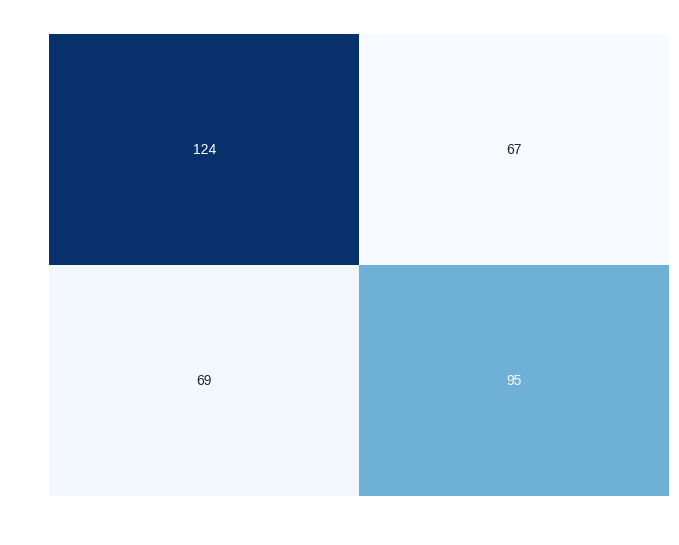


Relatório de Classificação para o Melhor Ano:
                      precision    recall  f1-score   support

Não-Vitória Mandante       0.64      0.65      0.65       191
    Vitória Mandante       0.59      0.58      0.58       164

            accuracy                           0.62       355
           macro avg       0.61      0.61      0.61       355
        weighted avg       0.62      0.62      0.62       355



In [224]:
# prompt: do the confusion matrix of the best year

# Ignorar avisos
warnings.filterwarnings('ignore')

# --- 1. Identificar o melhor ano ---
# Com base na sua análise anterior, o ano de corte 2022
# demonstrou ser o mais promissor.

# Re-rodar a preparação dos dados para este ano de corte
df_raw = pd.read_csv('BRA.csv')
df_prepared = prepare_and_engineer_features(df_raw) # Use a função definida anteriormente

ANO_DE_CORTE_MELHOR = 2022
df_final_melhor_ano = df_prepared[df_prepared['Date'].dt.year >= ANO_DE_CORTE_MELHOR].copy()

final_features = [
    'AvgCH', 'AvgCD', 'AvgCA',
    'H_form_pts', 'A_form_pts', 'H_form_gs', 'A_form_gs',
    'H_form_gc', 'A_form_gc', 'season_avg_H_goals_scored',
    'season_avg_A_goals_scored','season_avg_H_goals_conceded',
    'season_avg_A_goals_conceded'
]
df_final_melhor_ano.dropna(subset=final_features + ['Target', 'AvgCH'], inplace=True)

X_melhor_ano = df_final_melhor_ano[final_features]
y_melhor_ano = df_final_melhor_ano['Target']

# --- 2. Dividir os dados do melhor ano em treino e teste ---
# Usaremos a mesma proporção de split anterior
X_train_melhor, X_test_melhor, y_train_melhor, y_test_melhor = train_test_split(
    X_melhor_ano, y_melhor_ano, test_size=0.3, random_state=42, stratify=y_melhor_ano
)

# --- 3. Treinar o modelo no conjunto de treino do melhor ano ---
optimised_params = {'class_weight': 'balanced', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150,'random_state': 42,'n_jobs': -1}
model_melhor_ano = RandomForestClassifier(**optimised_params)

print(f"\n🚀 Treinando modelo para o melhor ano ({ANO_DE_CORTE_MELHOR}) para a Matriz de Confusão...")
model_melhor_ano.fit(X_train_melhor, y_train_melhor)
print("✅ Modelo treinado.")

# --- 4. Fazer previsões no conjunto de teste do melhor ano ---
y_pred_melhor_ano = model_melhor_ano.predict(X_test_melhor)

# --- 5. Gerar e Plotar a Matriz de Confusão ---
print("\n--- Matriz de Confusão para o Melhor Ano ---")

cm = confusion_matrix(y_test_melhor, y_pred_melhor_ano)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['Não-Vitória Mandante (Previsto)', 'Vitória Mandante (Previsto)'],
            yticklabels=['Não-Vitória Mandante (Real)', 'Vitória Mandante (Real)'])
plt.title(f'Matriz de Confusão (Ano de Corte: {ANO_DE_CORTE_MELHOR})', fontsize=16)
plt.xlabel('Previsto', fontsize=12)
plt.ylabel('Real', fontsize=12)
plt.show()

print("\nRelatório de Classificação para o Melhor Ano:")
print(classification_report(y_test_melhor, y_pred_melhor_ano, target_names=['Não-Vitória Mandante', 'Vitória Mandante']))


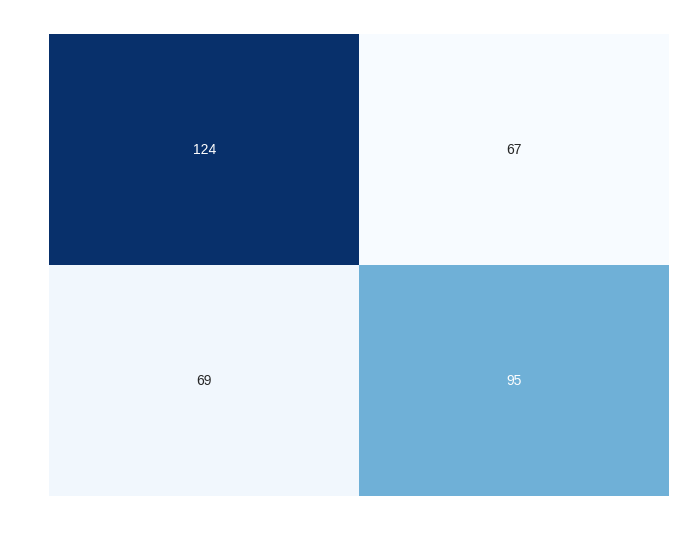

In [225]:
# prompt: do the background transparent and the text white

# Plot da Matriz de Confusão com fundo transparente e texto branco
plt.style.use('seaborn-v0_8-darkgrid') # Usar um estilo escuro como base

# Definir cores e estilo para o plot
plt.rcParams['text.color'] = 'white'
plt.rcParams['axes.labelcolor'] = 'white'
plt.rcParams['xtick.color'] = 'white'
plt.rcParams['ytick.color'] = 'white'
plt.rcParams['axes.edgecolor'] = 'white' # Cor da borda dos eixos
plt.rcParams['figure.facecolor'] = 'none' # Fundo da figura transparente

plt.figure(figsize=(8, 6))
ax = sns.heatmap(
    cm,
    annot=True,
    fmt='d',
    cmap='Blues', # Mantenha o mapa de cores para a matriz
    cbar=False,
    xticklabels=['Não-Vitória Mandante (Previsto)', 'Vitória Mandante (Previsto)'],
    yticklabels=['Não-Vitória Mandante (Real)', 'Vitória Mandante (Real)'],
    ax=plt.gca() # Obter o Axes atual
)

ax.set_title(f'Matriz de Confusão (Ano de Corte: {ANO_DE_CORTE_MELHOR})', fontsize=16, color='white')
ax.set_xlabel('Previsto', fontsize=12, color='white')
ax.set_ylabel('Real', fontsize=12, color='white')

# Definir a cor de fundo do Axes como transparente
ax.patch.set_alpha(0.0)

plt.show()


In [227]:


import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import warnings

warnings.filterwarnings('ignore')

#==============================================================================
# FUNÇÃO DE PREPARAÇÃO E ENGENHARIA DE FEATURES (COM CORREÇÃO DE LEAKAGE)
#==============================================================================
def prepare_and_engineer_features(df_raw):
    """
    Recebe o DataFrame bruto e retorna um novo DataFrame com todas as
    features de engenharia e a variável alvo, com a lógica de data leakage corrigida.
    Handles future games by not calculating features that require future data,
    leaving them as NaN to be imputed later.
    """
    print("Iniciando a preparação dos dados e engenharia de features...")

    df = df_raw.copy()

    # --- 1. Limpeza e Formatação Inicial ---
    df['Home'] = df['Home'].str.strip()
    df['Away'] = df['Away'].str.strip()
    df['HG'] = pd.to_numeric(df['HG'], errors='coerce')
    df['AG'] = pd.to_numeric(df['AG'], errors='coerce')

    df['Date'] = pd.to_datetime(df['Date'], dayfirst=True, errors='coerce')
    # Keep rows where 'Res' is not NaN even if HG/AG are NaN for future matches
    # For future matches, HG, AG, and Res will be NaN. Keep them based on Date and Home/Away.
    df.dropna(subset=['Date', 'Home', 'Away'], inplace=True)
    df = df.sort_values('Date').reset_index(drop=True)

    # Criação da Variável Alvo (only for historical data)
    # Target is NaN for future matches, which is correct.
    df['Target'] = df['Res'].map({'H': 1, 'D': 0, 'A': 0})


    # --- 3. Feature Engineering ---

    # A. Odds, Deltas e Spreads (Assume these are available for future games)
    odds_h_cols = [col for col in df.columns if col.endswith('H') and col not in ['Home', 'HG']]
    odds_d_cols = [col for col in df.columns if col.endswith('D')]
    odds_a_cols = [col for col in df.columns if col.endswith('A') and col not in ['Away', 'AG']]

    # Calculate Avg Odds (should work for future games if odds columns exist)
    df['AvgCH'] = df[odds_h_cols].mean(axis=1, skipna=True)
    df['AvgCD'] = df[odds_d_cols].mean(axis=1, skipna=True)
    df['AvgCA'] = df[odds_a_cols].mean(axis=1, skipna=True)

    # B. Forma Recente (Últimos 5 Jogos)
    # These will be NaN for the future game, which is fine
    df['H_points'] = df['Res'].apply(lambda res: 3 if res == 'H' else 1 if res == 'D' else 0)
    df['A_points'] = df['Res'].apply(lambda res: 3 if res == 'A' else 1 if res == 'D' else 0)

    all_teams = pd.concat([df['Home'], df['Away']]).unique()

    form_cols = ['H_form_pts', 'A_form_pts', 'H_form_gs', 'A_form_gs', 'H_form_gc', 'A_form_gc']
    for col in form_cols:
        df[col] = np.nan

    for team in all_teams:
        team_matches_indices = df.index[(df['Home'] == team) | (df['Away'] == team)]
        temp_df = df.loc[team_matches_indices].copy()

        is_home = temp_df['Home'] == team
        # Need to handle potential NaNs in points/goals for future matches
        # Use fillna(0) just for the rolling calculation to avoid errors,
        # but the result for the future game will still be based on historical data only,
        # or NaN if no historical data exists before the future date.
        points = np.where(is_home, temp_df['H_points'].fillna(0), temp_df['A_points'].fillna(0))
        goals_scored = np.where(is_home, temp_df['HG'].fillna(0), temp_df['AG'].fillna(0))
        goals_conceded = np.where(is_home, temp_df['AG'].fillna(0), temp_df['HG'].fillna(0))


        # 'closed=left' garante que a janela rolante use apenas os jogos passados
        # The result for the future game row will be NaN if there are no preceding games for the team.
        form_pts_L5 = pd.Series(points, index=temp_df.index).rolling(window=5, min_periods=1, closed='left').sum()
        form_gs_L5 = pd.Series(goals_scored, index=temp_df.index).rolling(window=5, min_periods=1, closed='left').mean()
        form_gc_L5 = pd.Series(goals_conceded, index=temp_df.index).rolling(window=5, min_periods=1, closed='left').mean()

        df.loc[temp_df[is_home].index, 'H_form_pts'] = form_pts_L5[is_home]
        df.loc[temp_df[is_home].index, 'H_form_gs'] = form_gs_L5[is_home]
        df.loc[temp_df[is_home].index, 'H_form_gc'] = form_gc_L5[is_home]

        df.loc[temp_df[~is_home].index, 'A_form_pts'] = form_pts_L5[~is_home]
        df.loc[temp_df[~is_home].index, 'A_form_gs'] = form_gs_L5[~is_home]
        df.loc[temp_df[~is_home].index, 'A_form_gc'] = form_gc_L5[~is_home]


    # C. Médias da Temporada - COM A CORREÇÃO DE VAZAMENTO DE DADOS
    df['Season'] = df['Date'].dt.year

    # The result for the future game row will be NaN if there are no preceding games for the team in that season.
    df['season_avg_H_goals_scored'] = df.groupby(['Season', 'Home'])['HG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_A_goals_scored'] = df.groupby(['Season', 'Away'])['AG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_H_goals_conceded'] = df.groupby(['Season', 'Home'])['AG'].transform(lambda x: x.shift(1).expanding().mean())
    df['season_avg_A_goals_conceded'] = df.groupby(['Season', 'Away'])['HG'].transform(lambda x: x.shift(1).expanding().mean())

    # D. Features de Diferença (will be NaN if component form features are NaN)
    df['form_diff_points'] = df['H_form_pts'] - df['A_form_pts']
    df['form_diff_goals_scored'] = df['H_form_gs'] - df['A_form_gs']
    df['form_diff_goals_conceded'] = df['H_form_gc'] - df['A_form_gc']

    print("✅ Engenharia de features concluída.")
    return df


# --- 1. Preparação dos Dados Históricos e do Jogo Futuro ---
# Carregar dados históricos (certifique-se de que 'BRA.csv' está disponível)
try:
    df_raw = pd.read_csv('BRA.csv')
    print("✅ Dataset 'BRA.csv' carregado com sucesso.")
except FileNotFoundError:
    print("❌ Erro: Arquivo 'BRA.csv' não encontrado. Certifique-se de que ele está na mesma pasta que o seu script.")
    exit()

# Dados do jogo futuro a ser previsto
future_match_data = {
    'Date': ['24/07/2025'],
    'Home': ['Vitoria'],
    'Away': ['Sport Recife'],
    'PSCH': [2.43],  # Pinnacle Home Close
    'PSCD': [3],  # Pinnacle Draw Close
    'PSCA': [3.57],  # Pinnacle Away Close
    'MaxCH': [2.42], # Max Home Odds
    'MaxCD': [3.01], # Max Draw Odds
    'MaxCA': [3.5], # Max Away Odds
    'AvgCH': [2.365556], # Avg Home Odds
    'AvgCD': [2.95], # Avg Draw Odds
    'AvgCA': [3.362222], # Avg Away Odds
    'Res': [np.nan], # Add 'Res' column with NaN for future match
    'HG': [np.nan],  # Add 'HG' column with NaN for future match
    'AG': [np.nan],  # Add 'AG' column with NaN for future match
    # Adicione outras colunas de odds de fechamento do seu dataset histórico,
    # mesmo que sejam NaN para este jogo específico, para garantir que prepare_and_engineer_features_for_prediction
    # possa calcular as médias corretamente (ignorando NaNs).
    # Ex: 'B365H': [np.nan], 'B365D': [np.nan], 'B365A': [np.nan], etc.
}

# Converter o dicionário do jogo futuro em um DataFrame
df_future_single_input = pd.DataFrame(future_match_data)

# Concatena dados históricos e o jogo futuro PARA CALCULAR FEATURES de forma e temporada CORRETAMENTE.
# It's crucial the future game is the LAST row for correct rolling/expanding calcs.
df_combined_raw = pd.concat([df_raw, df_future_single_input], ignore_index=True).sort_values('Date').reset_index(drop=True)


# Chamar a função de preparação de features.
df_combined_prepared = prepare_and_engineer_features(df_combined_raw)


# Separa novamente os dados históricos (para treino) e o jogo futuro (para predição)
# The future game is now the last row after sorting by Date.
df_single_future_game = df_combined_prepared.iloc[[-1]].copy()
df_train_for_prediction = df_combined_prepared.iloc[:-1].copy()


# --- 3. Treinamento do Modelo Final com o Melhor Ano de Corte ---
# Usamos apenas os dados históricos para treinar
ANO_DE_CORTE_TREINO = 2022 # O ano de corte que you identificou como ideal

df_train_final = df_train_for_prediction[df_train_for_prediction['Date'].dt.year >= ANO_DE_CORTE_TREINO].copy()

final_features = [
    'AvgCH', 'AvgCD', 'AvgCA',
    'H_form_pts', 'A_form_pts', 'H_form_gs', 'A_form_gs',
    'H_form_gc', 'A_form_gc', 'season_avg_H_goals_scored',
    'season_avg_A_goals_scored','season_avg_H_goals_conceded',
    'season_avg_A_goals_conceded'
]

# Remove NaNs que podem ter sobrado nos primeiros jogos de cada time/temporada no dataset de treino
df_train_final.dropna(subset=final_features + ['Target', 'AvgCH'], inplace=True)

X_train = df_train_final[final_features]
y_train = df_train_final['Target']

optimised_params = {'class_weight': 'balanced', 'max_depth': 12, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 150,'random_state': 42,'n_jobs': -1}
model_final = RandomForestClassifier(**optimised_params)

print(f"\n🚀 Treinando modelo final com dados históricos a partir de {ANO_DE_CORTE_TREINO}...")
model_final.fit(X_train, y_train)
print("✅ Modelo final treinado.")

# --- 4. Preparação dos Dados do Jogo Futuro para Predição ---
# Usamos o dataframe do jogo futuro que separamos
# Removendo colunas que não são features ou são o target
X_future_single = df_single_future_game[final_features].copy()


# Impute missing seasonal average features for the future game with the mean from the training data
seasonal_avg_features = ['season_avg_H_goals_scored', 'season_avg_A_goals_scored','season_avg_H_goals_conceded','season_avg_A_goals_conceded']
for feature in seasonal_avg_features:
    if feature in X_train.columns:
        mean_value = X_train[feature].mean()
        X_future_single[feature].fillna(mean_value, inplace=True)

# Impute missing form features for the future game with the mean from the training data
form_features_to_impute = ['H_form_pts', 'A_form_pts', 'H_form_gs', 'A_form_gs', 'H_form_gc', 'A_form_gc']
for feature in form_features_to_impute:
    if feature in X_train.columns:
        mean_value = X_train[feature].mean()
        X_future_single[feature].fillna(mean_value, inplace=True)

# --- Check for NaNs AFTER imputation ---
print("\n--- Checking for NaNs in X_future_single AFTER imputation ---")
display(X_future_single.isnull().sum())


# Now drop any remaining NaNs from essential features for the future game
# This should ideally not drop the row after imputation if AvgCH is present.
X_future_single.dropna(subset=final_features, inplace=True)


if X_future_single.empty:
    print("\n❌ O jogo futuro não pôde ser preparado para predição (features essenciais missing mesmo após imputação).")
    print("Check the NaN check output above to see which features are still missing.")
    exit()

# Ensure the order of columns is the same as training data
X_future_single = X_future_single[X_train.columns]


# --- 5. Realizar Predição para o Jogo Específico ---
print(f"\n🚀 Realizando predição para {future_match_data['Home'][0]} vs {future_match_data['Away'][0]} em {future_match_data['Date'][0]}...")

# Previsão de probabilidade para a vitória do mandante (classe 1)
future_pred_prob = model_final.predict_proba(X_future_single)[:, 1][0]

# Previsão da classe (0 ou 1)
future_prediction_class = model_final.predict(X_future_single)[0]

# Traduzir a previsão da classe
future_prediction_result = 'Vitória Mandante (H)' if future_prediction_class == 1 else 'Não-Vitória Mandante (D ou A)'

# --- 6. Análise da Estratégia de Valor para o Jogo ---
print("\n--- Análise da Estratégia de Valor para o Jogo ---")

# Defina os limiares de valor e confiança encontrados como ideais na validação
# Ajuste estes valores com base na sua análise (ex: do ROI_optimization_comparison.ipynb)
LIMIAR_DE_VALOR_OTIMO = 0.17 # Exemplo
LIMIAR_DE_CONFIANCA_OTIMO = 0.65 # Exemplo (se você usar confiança no filtro)
STAKE_UNITARIA = 10

odd_mandante_futuro = df_single_future_game['AvgCH'].iloc[0]

# Calcular o valor percebido
valor_calculado_futuro = (future_pred_prob * odd_mandante_futuro) - 1

print(f"Probabilidade de Vitória do Mandante (Modelo): {future_pred_prob:.4f}")
print(f"Odd Média de Vitória do Mandante: {odd_mandante_futuro:.2f}")
print(f"Valor Calculado (Edge): {valor_calculado_futuro:.4f}")
print(f"Previsão do Modelo: {future_prediction_result}")

# Avaliar se é uma aposta de valor com base no seu limiar
print(f"\nCritérios de Aposta de Valor:")
print(f"- Limiar de Valor Mínimo: {LIMIAR_DE_VALOR_OTIMO:.2f} ({LIMIAR_DE_VALOR_OTIMO*100:.0f}%)")
# If using confidence:
# print(f"- Limiar de Confiança Mínimo: {LIMIAR_DE_CONFIANCA_OTIMO:.2f} ({LIMIAR_DE_CONFIANCA_OTIMO*100:.0f}%)")

if valor_calculado_futuro > LIMIAR_DE_VALOR_OTIMO: # Add confidence condition if applicable: & (future_pred_prob >= LIMIAR_DE_CONFIANCA_OTIMO):
    print("\n💰 OPORTUNIDADE DE APOSTA DE VALOR ENCONTRADA! 💰")
    print(f"Apostar {STAKE_UNITARIA} units na Vitória do Mandante ({future_match_data['Home'][0]}).")
    print(f"Retorno esperado se a aposta for ganha: {(odd_mandante_futuro * STAKE_UNITARIA):.2f} units")
    print(f"Lucro esperado se a aposta for ganha: {(odd_mandante_futuro * STAKE_UNITARIA) - STAKE_UNITARIA:.2f} units")
else:
    print("\n:( Não é uma oportunidade de aposta de valor com os critérios definidos.")
    print("Valor calculado não atinge o limiar mínimo.")

✅ Dataset 'BRA.csv' carregado com sucesso.
Iniciando a preparação dos dados e engenharia de features...
✅ Engenharia de features concluída.

🚀 Treinando modelo final com dados históricos a partir de 2022...
✅ Modelo final treinado.

--- Checking for NaNs in X_future_single AFTER imputation ---


,0
AvgCH,0
AvgCD,0
AvgCA,0
H_form_pts,0
A_form_pts,0
H_form_gs,0
A_form_gs,0
H_form_gc,0
A_form_gc,0
season_avg_H_goals_scored,0



🚀 Realizando predição para Vitoria vs Sport Recife em 24/07/2025...

--- Análise da Estratégia de Valor para o Jogo ---
Probabilidade de Vitória do Mandante (Modelo): 0.4415
Odd Média de Vitória do Mandante: 2.41
Valor Calculado (Edge): 0.0618
Previsão do Modelo: Não-Vitória Mandante (D ou A)

Critérios de Aposta de Valor:
- Limiar de Valor Mínimo: 0.17 (17%)

:( Não é uma oportunidade de aposta de valor com os critérios definidos.
Valor calculado não atinge o limiar mínimo.
